### Object Properties

In [1]:
object_height = {'Car': 160, 'Pedestrian': 175, 'Bike': 105, 'Bus': 299, 'Truck': 410, 'GreenLight': 120, 'GreenTrafficLight': 120, 'RedLight': 120, 'RedTrafficLight': 120, 'Crosswalk': 20}
object_width = {'Car': 180, 'Pedestrian': 55, 'Bike': 42, 'Bus': 255, 'Truck': 260, 'GreenLight': 40, 'GreenTrafficLight': 40, 'RedLight': 40, 'RedTrafficLight': 40, 'Crosswalk': 375}
object_breadth = {'Car': 400, 'Pedestrian': 30, 'Bike': 175, 'Bus': 1195, 'Truck': 1400, 'GreenLight': 50, 'GreenTrafficLight': 50, 'RedLight': 50, 'RedTrafficLight': 50, 'Crosswalk': 937}

object_list = ['Car', 'Pedestrian', 'Bike', 'GreenLight', 'GreenTrafficLight', 'RedLight', 'RedTrafficLight', 'Crosswalk'] 
distance_list = [16, 32, 48, 64, 80, 96]

### Add Paths of the dataset

In [2]:
DISTANCE_IMAGE_PATH = './workspace/distance_estimation_images'

### Convert XML labels into CSV file

In [3]:
from xml_to_csv import * # returns image height and width
image_height, image_width = xml_to_csv(DISTANCE_IMAGE_PATH, file_name = 'featureV_distance.csv')

### Explore data

In [4]:
data = pd.read_csv("./workspace/csv/featureV_distance.csv") 

In [5]:
data.head(n=100)

,filename,image_width,image_height,object_name,xmin,ymin,xmax,ymax,bb_height,bb_width,object_class,1/Bh,1/Bw,1/Bd,Ch,Cw,Cb,distance_ft
0,Bike_16_01_h.jpg,1440,1080,Bike,649,453,1045,665,212,396,3,5.094340,3.636364,4.007329,105.0,42.0,175.0,16.0
1,Bike_16_01_v.jpg,1440,1080,Bike,776,451,901,705,254,125,3,4.251969,11.520000,6.358360,105.0,42.0,175.0,16.0
2,Bike_16_02_h.jpg,1440,1080,Bike,651,447,1039,655,208,388,3,5.192308,3.711340,4.088713,105.0,42.0,175.0,16.0
3,Bike_16_02_v.jpg,1440,1080,Bike,766,434,916,693,259,150,3,4.169884,9.600000,6.014016,105.0,42.0,175.0,16.0
4,Bike_32_01_h.jpg,1440,1080,Bike,708,463,912,584,121,204,3,8.925620,7.058824,7.588994,105.0,42.0,175.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,GreenLight_48_01_h.jpg,1440,1080,GreenLight,827,444,850,473,29,23,6,37.241379,62.608696,48.630890,120.0,40.0,50.0,48.0
96,GreenLight_48_01_v.jpg,1440,1080,GreenLight,826,461,848,489,28,22,6,38.571429,65.454545,50.549036,120.0,40.0,50.0,48.0
97,GreenLight_48_02_h.jpg,1440,1080,GreenLight,660,419,688,501,82,28,6,13.170732,51.428571,20.773533,120.0,40.0,50.0,48.0
98,GreenLight_48_02_v.jpg,1440,1080,GreenLight,657,415,687,494,79,30,6,13.670886,48.000000,21.300656,120.0,40.0,50.0,48.0


In [6]:
data.describe()

,image_width,image_height,xmin,ymin,xmax,ymax,bb_height,bb_width,object_class,1/Bh,1/Bw,1/Bd,Ch,Cw,Cb,distance_ft
count,188.0,188.0,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.00000,188.000000
mean,1440.0,1080.0,720.452128,451.505319,842.941489,544.861702,93.356383,122.489362,5.021277,23.097083,40.529162,26.340905,116.595745,99.829787,213.87234,55.148936
std,0.0,0.0,107.134195,110.146985,132.214506,123.050192,86.131200,196.973043,2.771045,19.251216,33.337624,23.778395,43.127796,113.710641,298.55693,27.049551
min,1440.0,1080.0,89.000000,140.000000,687.000000,261.000000,12.000000,9.000000,1.000000,2.505800,1.086792,1.317519,20.000000,40.000000,30.00000,16.000000
25%,1440.0,1080.0,683.750000,418.750000,767.750000,488.500000,37.750000,22.750000,2.000000,9.391304,10.951042,7.898063,105.000000,40.000000,50.00000,32.000000
50%,1440.0,1080.0,744.000000,463.000000,814.000000,526.000000,69.000000,43.500000,6.000000,15.655462,33.107822,18.546459,120.000000,40.000000,50.00000,48.000000
75%,1440.0,1080.0,778.250000,510.750000,860.250000,609.000000,115.000000,131.500000,8.000000,28.613087,63.320158,36.090046,120.000000,55.000000,175.00000,80.000000
max,1440.0,1080.0,882.000000,699.000000,1414.000000,982.000000,431.000000,1325.000000,9.000000,90.000000,160.000000,120.000000,175.000000,375.000000,937.00000,96.000000


### List containing all the objects image name

In [7]:
horizontal_list = []
vertical_list = []

for object in object_list:
    for distance in distance_list:
        for number in range(2):
            horizontal_list.append(object + '_' + str(distance) + '_' + '0' + str(number+1) + '_h.jpg')
            vertical_list.append(object + '_' + str(distance) + '_' + '0' + str(number+1) + '_v.jpg')

# remove the data which is not present
reduntant_list = ['Car_96_01_h.jpg','Car_96_02_h.jpg', 'Car_96_01_v.jpg', 'Car_96_02_v.jpg']

for i in reduntant_list:
    if i in horizontal_list:
        horizontal_list.remove(i)
    if i in vertical_list:
        vertical_list.remove(i)

In [8]:
print(horizontal_list, vertical_list, sep='\n\n')

['Car_16_01_h.jpg', 'Car_16_02_h.jpg', 'Car_32_01_h.jpg', 'Car_32_02_h.jpg', 'Car_48_01_h.jpg', 'Car_48_02_h.jpg', 'Car_64_01_h.jpg', 'Car_64_02_h.jpg', 'Car_80_01_h.jpg', 'Car_80_02_h.jpg', 'Pedestrian_16_01_h.jpg', 'Pedestrian_16_02_h.jpg', 'Pedestrian_32_01_h.jpg', 'Pedestrian_32_02_h.jpg', 'Pedestrian_48_01_h.jpg', 'Pedestrian_48_02_h.jpg', 'Pedestrian_64_01_h.jpg', 'Pedestrian_64_02_h.jpg', 'Pedestrian_80_01_h.jpg', 'Pedestrian_80_02_h.jpg', 'Pedestrian_96_01_h.jpg', 'Pedestrian_96_02_h.jpg', 'Bike_16_01_h.jpg', 'Bike_16_02_h.jpg', 'Bike_32_01_h.jpg', 'Bike_32_02_h.jpg', 'Bike_48_01_h.jpg', 'Bike_48_02_h.jpg', 'Bike_64_01_h.jpg', 'Bike_64_02_h.jpg', 'Bike_80_01_h.jpg', 'Bike_80_02_h.jpg', 'Bike_96_01_h.jpg', 'Bike_96_02_h.jpg', 'GreenLight_16_01_h.jpg', 'GreenLight_16_02_h.jpg', 'GreenLight_32_01_h.jpg', 'GreenLight_32_02_h.jpg', 'GreenLight_48_01_h.jpg', 'GreenLight_48_02_h.jpg', 'GreenLight_64_01_h.jpg', 'GreenLight_64_02_h.jpg', 'GreenLight_80_01_h.jpg', 'GreenLight_80_02_h.jpg

### Populate the dataframe according to the method discussed in the report

horizontal_list -> max_width

vertical_list -> min_width

Populating data in between this range

In [9]:
import random

calculated_row = {}


for i in range(100):
    for name in range(len(horizontal_list)):
        if data[data['filename'].str.contains(vertical_list[name])].bb_width.values[0] < data[data['filename'].str.contains(horizontal_list[name])].bb_width.values[0]:
            calculated_row['bb_width'] = random.randint(data[data['filename'].str.contains(vertical_list[name])].bb_width.values[0],data[data['filename'].str.contains(horizontal_list[name])].bb_width.values[0])
        elif data[data['filename'].str.contains(vertical_list[name])].bb_width.values[0] > data[data['filename'].str.contains(horizontal_list[name])].bb_width.values[0]:
            calculated_row['bb_width'] = random.randint(data[data['filename'].str.contains(horizontal_list[name])].bb_width.values[0],data[data['filename'].str.contains(vertical_list[name])].bb_width.values[0])
        #print('width:', data[data['filename'].str.contains(vertical_list[name])].bb_width.values[0], data[data['filename'].str.contains(horizontal_list[name])].bb_width.values[0])
        
        #calculated_row['bb_height'] = ( data[data['filename'].str.contains(vertical_list[name])].bb_height.values[0] + data[data['filename'].str.contains(horizontal_list[name])].bb_height.values[0] ) / 2
        if data[data['filename'].str.contains(vertical_list[name])].bb_height.values[0] < data[data['filename'].str.contains(horizontal_list[name])].bb_height.values[0]:
            calculated_row['bb_height'] = random.randint(data[data['filename'].str.contains(vertical_list[name])].bb_height.values[0],data[data['filename'].str.contains(horizontal_list[name])].bb_height.values[0])
        elif data[data['filename'].str.contains(vertical_list[name])].bb_height.values[0] > data[data['filename'].str.contains(horizontal_list[name])].bb_height.values[0]:
            calculated_row['bb_height'] = random.randint(data[data['filename'].str.contains(horizontal_list[name])].bb_height.values[0],data[data['filename'].str.contains(vertical_list[name])].bb_height.values[0])
        #print('height:', data[data['filename'].str.contains(vertical_list[name])].bb_height.values[0], data[data['filename'].str.contains(horizontal_list[name])].bb_height.values[0])
        
        calculated_row['distance_ft'] = data[data['filename'].str.contains(vertical_list[name])].distance_ft.values[0]
        calculated_row['1/Bh'] = 1 / (calculated_row['bb_height']/image_height)
        calculated_row['1/Bw'] = 1 / (calculated_row['bb_width']/image_width)
        
        # 1/Bd - math.sqrt(FRAME_WIDTH ** 2 + FRAME_HEIGHT ** 2 )
        calculated_row['1/Bd'] = 1 / ( math.sqrt(calculated_row['bb_width']**2 + calculated_row['bb_height']**2) / math.sqrt(image_width**2 + image_height**2) ) 
        calculated_row['Ch'] =  data[data['filename'].str.contains(vertical_list[name])].Ch.values[0]
        calculated_row['Cw'] =  data[data['filename'].str.contains(vertical_list[name])].Cw.values[0]
        calculated_row['Cb'] =  data[data['filename'].str.contains(vertical_list[name])].Cb.values[0]
        calculated_row['filename'] = str(vertical_list[name]) + '_modded'
        calculated_row['image_width'] = data[data['filename'].str.contains(vertical_list[name])].image_width.values[0]
        calculated_row['image_height'] = data[data['filename'].str.contains(vertical_list[name])].image_height.values[0]
        calculated_row['object_name'] = data[data['filename'].str.contains(vertical_list[name])].object_name.values[0]
        calculated_row['object_class'] = data[data['filename'].str.contains(vertical_list[name])].object_class.values[0]
        calculated_row['xmin'] = calculated_row['xmax'] = calculated_row['ymin'] = calculated_row['ymax'] = 'xxxxx'
        
        data = data.append(calculated_row, ignore_index=True)
        
        #print(calculated_row)
        
data.head(n=100)

,filename,image_width,image_height,object_name,xmin,ymin,xmax,ymax,bb_height,bb_width,object_class,1/Bh,1/Bw,1/Bd,Ch,Cw,Cb,distance_ft
0,Bike_16_01_h.jpg,1440,1080,Bike,649,453,1045,665,212,396,3,5.094340,3.636364,4.007329,105.0,42.0,175.0,16.0
1,Bike_16_01_v.jpg,1440,1080,Bike,776,451,901,705,254,125,3,4.251969,11.520000,6.358360,105.0,42.0,175.0,16.0
2,Bike_16_02_h.jpg,1440,1080,Bike,651,447,1039,655,208,388,3,5.192308,3.711340,4.088713,105.0,42.0,175.0,16.0
3,Bike_16_02_v.jpg,1440,1080,Bike,766,434,916,693,259,150,3,4.169884,9.600000,6.014016,105.0,42.0,175.0,16.0
4,Bike_32_01_h.jpg,1440,1080,Bike,708,463,912,584,121,204,3,8.925620,7.058824,7.588994,105.0,42.0,175.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,GreenLight_48_01_h.jpg,1440,1080,GreenLight,827,444,850,473,29,23,6,37.241379,62.608696,48.630890,120.0,40.0,50.0,48.0
96,GreenLight_48_01_v.jpg,1440,1080,GreenLight,826,461,848,489,28,22,6,38.571429,65.454545,50.549036,120.0,40.0,50.0,48.0
97,GreenLight_48_02_h.jpg,1440,1080,GreenLight,660,419,688,501,82,28,6,13.170732,51.428571,20.773533,120.0,40.0,50.0,48.0
98,GreenLight_48_02_v.jpg,1440,1080,GreenLight,657,415,687,494,79,30,6,13.670886,48.000000,21.300656,120.0,40.0,50.0,48.0


In [10]:
data.to_csv('./workspace/csv/Populated_featureV_distance.csv', index = False)

In [36]:
data = pd.read_csv("./workspace/csv/Populated_featureV_distance.csv") 

In [37]:
data.head(n=100)

,filename,image_width,image_height,object_name,xmin,ymin,xmax,ymax,bb_height,bb_width,object_class,1/Bh,1/Bw,1/Bd,Ch,Cw,Cb,distance_ft
0,Bike_16_01_h.jpg,1440,1080,Bike,649,453,1045,665,212,396,3,5.094340,3.636364,4.007329,105.0,42.0,175.0,16.0
1,Bike_16_01_v.jpg,1440,1080,Bike,776,451,901,705,254,125,3,4.251969,11.520000,6.358360,105.0,42.0,175.0,16.0
2,Bike_16_02_h.jpg,1440,1080,Bike,651,447,1039,655,208,388,3,5.192308,3.711340,4.088713,105.0,42.0,175.0,16.0
3,Bike_16_02_v.jpg,1440,1080,Bike,766,434,916,693,259,150,3,4.169884,9.600000,6.014016,105.0,42.0,175.0,16.0
4,Bike_32_01_h.jpg,1440,1080,Bike,708,463,912,584,121,204,3,8.925620,7.058824,7.588994,105.0,42.0,175.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,GreenLight_48_01_h.jpg,1440,1080,GreenLight,827,444,850,473,29,23,6,37.241379,62.608696,48.630890,120.0,40.0,50.0,48.0
96,GreenLight_48_01_v.jpg,1440,1080,GreenLight,826,461,848,489,28,22,6,38.571429,65.454545,50.549036,120.0,40.0,50.0,48.0
97,GreenLight_48_02_h.jpg,1440,1080,GreenLight,660,419,688,501,82,28,6,13.170732,51.428571,20.773533,120.0,40.0,50.0,48.0
98,GreenLight_48_02_v.jpg,1440,1080,GreenLight,657,415,687,494,79,30,6,13.670886,48.000000,21.300656,120.0,40.0,50.0,48.0


In [38]:
data = data.iloc[:, 10:]

In [39]:
data.head(n=100)

,object_class,1/Bh,1/Bw,1/Bd,Ch,Cw,Cb,distance_ft
0,3,5.094340,3.636364,4.007329,105.0,42.0,175.0,16.0
1,3,4.251969,11.520000,6.358360,105.0,42.0,175.0,16.0
2,3,5.192308,3.711340,4.088713,105.0,42.0,175.0,16.0
3,3,4.169884,9.600000,6.014016,105.0,42.0,175.0,16.0
4,3,8.925620,7.058824,7.588994,105.0,42.0,175.0,32.0
...,...,...,...,...,...,...,...,...
95,6,37.241379,62.608696,48.630890,120.0,40.0,50.0,48.0
96,6,38.571429,65.454545,50.549036,120.0,40.0,50.0,48.0
97,6,13.170732,51.428571,20.773533,120.0,40.0,50.0,48.0
98,6,13.670886,48.000000,21.300656,120.0,40.0,50.0,48.0


### Shuffle the data before training

In [40]:
from sklearn.utils import shuffle
shuffled_data = shuffle(data)
shuffled_data.head(n=100)

,object_class,1/Bh,1/Bw,1/Bd,Ch,Cw,Cb,distance_ft
9530,6,4.864865,43.636364,8.019986,120.0,40.0,50.0,32.0
8652,4,9.642857,9.536424,9.574333,160.0,180.0,400.0,48.0
4325,4,3.233533,2.779923,2.920447,160.0,180.0,400.0,16.0
3925,9,4.954128,17.142857,7.704700,120.0,40.0,50.0,16.0
7316,9,60.000000,90.000000,74.740932,120.0,40.0,50.0,80.0
...,...,...,...,...,...,...,...,...
7982,2,14.025974,3.902439,4.775191,20.0,375.0,937.0,48.0
5791,7,28.421053,110.769231,44.818294,120.0,40.0,50.0,96.0
9445,6,26.341463,102.857143,41.547067,120.0,40.0,50.0,96.0
2685,7,17.419355,60.000000,27.074558,120.0,40.0,50.0,64.0


### Select features and target

In [41]:
X = shuffled_data.drop('distance_ft', axis = 1).values
print(X.shape)
y = shuffled_data['distance_ft'].values
print(y.shape)

(9588, 7)
(9588,)


### Train-Test-Split

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

### Train different models 

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import svm, preprocessing

svm_clf = svm.SVR(kernel='rbf')
svm_clf.fit(X_train, y_train)
print('Score: ', svm_clf.score(X_test, y_test))

y_pred_svm = svm_clf.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
print('Mean squared error from linear regression: ', mse_svm)
print('Mean absolute error from linear regression: ', mae_svm)

Score:  0.618169496511878
Mean squared error from linear regression:  278.18553925622416
Mean absolute error from linear regression:  13.155130717496734


In [44]:
svm_clf = svm.SVR(kernel='rbf')
svm_clf.fit(X, y)

SVR()

### Linear Regression

In [45]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
print('Score: ', lr_model.score(X_test, y_test))

y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)

Score:  0.7966462583726138
Mean squared error from linear regression:  148.15492674787075
Mean absolute error from linear regression:  9.488925978734915


In [46]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X, y)

LinearRegression()

### Random Forest

In [47]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators = 30, random_state=30)
rf_model.fit(X_train, y_train)
print('Score: ', rf_model.score(X_test, y_test))

y_pred_RF = rf_model.predict(X_test)
mse_RF = mean_squared_error(y_test, y_pred_RF)
mae_RF = mean_absolute_error(y_test, y_pred_RF)
print('Mean squared error using Random Forest: ', mse_RF)
print('Mean absolute error Using Random Forest: ', mae_RF)

Score:  0.9962215235198149
Mean squared error using Random Forest:  2.7528379938350773
Mean absolute error Using Random Forest:  0.28077050017448457


In [48]:
rf_model = RandomForestRegressor(n_estimators = 30, random_state=30)
rf_model.fit(X, y)

RandomForestRegressor(n_estimators=30, random_state=30)

### Decision Tree

In [49]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
print('Score: ', tree_model.score(X_test, y_test))

y_pred_tree = tree_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_tree)
mae_dt = mean_absolute_error(y_test, y_pred_tree)
print('Mean squared error using decision tree: ', mse_dt)
print('Mean absolute error using decision tree: ', mae_dt)

Score:  0.9944980522078751
Mean squared error using decision tree:  4.008486224986639
Mean absolute error using decision tree:  0.27611825088363157


In [50]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X, y)

DecisionTreeRegressor()

### Simple Neural Network

In [51]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

# scaler=StandardScaler()
# scaler.fit(X_train)

# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)
#Experiment with deeper and wider networks
nn_model = Sequential()
nn_model.add(Dense(128, input_dim=7, activation='relu'))
nn_model.add(Dense(64, activation='relu'))
#Output layer
nn_model.add(Dense(1, activation='linear'))

nn_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               1024      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 9,345
Trainable params: 9,345
Non-trainable params: 0
_________________________________________________________________


In [52]:
history = nn_model.fit(X_train, y_train, validation_split=0.2, epochs = 2000)

Epoch 1/2000


2021-08-23 13:23:31.723746: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-08-23 13:23:40.118603: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


192/192 [==============================] - 67s 11ms/step - loss: 1918.9862 - mean_absolute_error: 25.5628 - val_loss: 161.9471 - val_mean_absolute_error: 9.8955
Epoch 2/2000
192/192 [==============================] - 1s 3ms/step - loss: 129.7197 - mean_absolute_error: 8.9595 - val_loss: 74.3444 - val_mean_absolute_error: 6.6400
Epoch 3/2000
192/192 [==============================] - 1s 4ms/step - loss: 69.5048 - mean_absolute_error: 6.4200 - val_loss: 53.0304 - val_mean_absolute_error: 5.6805
Epoch 4/2000
192/192 [==============================] - 1s 4ms/step - loss: 55.4107 - mean_absolute_error: 5.7228 - val_loss: 48.8282 - val_mean_absolute_error: 5.3315
Epoch 5/2000
192/192 [==============================] - 1s 3ms/step - loss: 46.4907 - mean_absolute_error: 5.1612 - val_loss: 49.0287 - val_mean_absolute_error: 5.1705
Epoch 6/2000
192/192 [==============================] - 0s 2ms/step - loss: 44.4340 - mean_absolute_error: 5.0616 - val_loss: 44.9196 - val_mean_absolute_error: 4.926

192/192 [==============================] - 0s 2ms/step - loss: 12.7460 - mean_absolute_error: 2.5554 - val_loss: 11.8051 - val_mean_absolute_error: 2.6200
Epoch 50/2000
192/192 [==============================] - 0s 2ms/step - loss: 13.1635 - mean_absolute_error: 2.5536 - val_loss: 11.8489 - val_mean_absolute_error: 2.3009
Epoch 51/2000
192/192 [==============================] - 1s 3ms/step - loss: 11.9819 - mean_absolute_error: 2.4346 - val_loss: 12.5713 - val_mean_absolute_error: 2.3818
Epoch 52/2000
192/192 [==============================] - 0s 2ms/step - loss: 12.1684 - mean_absolute_error: 2.3789 - val_loss: 14.9275 - val_mean_absolute_error: 2.8983
Epoch 53/2000
192/192 [==============================] - 0s 2ms/step - loss: 12.5212 - mean_absolute_error: 2.4771 - val_loss: 8.9193 - val_mean_absolute_error: 2.0518
Epoch 54/2000
192/192 [==============================] - 0s 2ms/step - loss: 12.5792 - mean_absolute_error: 2.4683 - val_loss: 13.9717 - val_mean_absolute_error: 2.8127
E

Epoch 98/2000
192/192 [==============================] - 0s 2ms/step - loss: 9.5244 - mean_absolute_error: 2.0573 - val_loss: 9.9480 - val_mean_absolute_error: 2.1050
Epoch 99/2000
192/192 [==============================] - 0s 2ms/step - loss: 10.1651 - mean_absolute_error: 2.1020 - val_loss: 7.5782 - val_mean_absolute_error: 1.7953
Epoch 100/2000
192/192 [==============================] - 0s 2ms/step - loss: 9.2948 - mean_absolute_error: 2.0018 - val_loss: 8.1180 - val_mean_absolute_error: 1.8281
Epoch 101/2000
192/192 [==============================] - 0s 2ms/step - loss: 10.3889 - mean_absolute_error: 2.1243 - val_loss: 8.0911 - val_mean_absolute_error: 1.8246
Epoch 102/2000
192/192 [==============================] - 0s 2ms/step - loss: 9.6301 - mean_absolute_error: 2.0800 - val_loss: 10.6434 - val_mean_absolute_error: 2.3323
Epoch 103/2000
192/192 [==============================] - 0s 2ms/step - loss: 9.7609 - mean_absolute_error: 2.0639 - val_loss: 15.8830 - val_mean_absolute_erro

Epoch 147/2000
192/192 [==============================] - 0s 2ms/step - loss: 9.2136 - mean_absolute_error: 1.9855 - val_loss: 7.8215 - val_mean_absolute_error: 1.8323
Epoch 148/2000
192/192 [==============================] - 0s 2ms/step - loss: 9.3545 - mean_absolute_error: 1.9309 - val_loss: 8.4990 - val_mean_absolute_error: 2.0323
Epoch 149/2000
192/192 [==============================] - 0s 2ms/step - loss: 9.2813 - mean_absolute_error: 1.9718 - val_loss: 7.6995 - val_mean_absolute_error: 1.8012
Epoch 150/2000
192/192 [==============================] - 0s 2ms/step - loss: 9.1611 - mean_absolute_error: 1.9517 - val_loss: 8.2635 - val_mean_absolute_error: 1.9740
Epoch 151/2000
192/192 [==============================] - 0s 2ms/step - loss: 7.8502 - mean_absolute_error: 1.8540 - val_loss: 8.2172 - val_mean_absolute_error: 1.8423
Epoch 152/2000
192/192 [==============================] - 0s 2ms/step - loss: 8.2628 - mean_absolute_error: 1.8557 - val_loss: 7.5010 - val_mean_absolute_error:

Epoch 196/2000
192/192 [==============================] - 0s 2ms/step - loss: 8.1376 - mean_absolute_error: 1.7587 - val_loss: 7.0071 - val_mean_absolute_error: 1.6422
Epoch 197/2000
192/192 [==============================] - 0s 2ms/step - loss: 8.2657 - mean_absolute_error: 1.8720 - val_loss: 6.8695 - val_mean_absolute_error: 1.6488
Epoch 198/2000
192/192 [==============================] - 0s 2ms/step - loss: 8.8610 - mean_absolute_error: 1.8625 - val_loss: 6.5937 - val_mean_absolute_error: 1.5215
Epoch 199/2000
192/192 [==============================] - 0s 2ms/step - loss: 8.2005 - mean_absolute_error: 1.7794 - val_loss: 7.0429 - val_mean_absolute_error: 1.6793
Epoch 200/2000
192/192 [==============================] - 0s 2ms/step - loss: 7.9150 - mean_absolute_error: 1.7952 - val_loss: 7.3886 - val_mean_absolute_error: 1.6495
Epoch 201/2000
192/192 [==============================] - 0s 2ms/step - loss: 9.2643 - mean_absolute_error: 1.9269 - val_loss: 7.7322 - val_mean_absolute_error:

Epoch 245/2000
192/192 [==============================] - 0s 2ms/step - loss: 7.3355 - mean_absolute_error: 1.6638 - val_loss: 6.8077 - val_mean_absolute_error: 1.5625
Epoch 246/2000
192/192 [==============================] - 0s 2ms/step - loss: 7.1080 - mean_absolute_error: 1.6093 - val_loss: 9.7815 - val_mean_absolute_error: 2.1062
Epoch 247/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.8630 - mean_absolute_error: 1.6229 - val_loss: 7.7184 - val_mean_absolute_error: 1.7055
Epoch 248/2000
192/192 [==============================] - 0s 2ms/step - loss: 8.5340 - mean_absolute_error: 1.8156 - val_loss: 6.9141 - val_mean_absolute_error: 1.6706
Epoch 249/2000
192/192 [==============================] - 0s 2ms/step - loss: 7.4643 - mean_absolute_error: 1.6791 - val_loss: 7.3710 - val_mean_absolute_error: 1.6824
Epoch 250/2000
192/192 [==============================] - 0s 2ms/step - loss: 7.6598 - mean_absolute_error: 1.6654 - val_loss: 7.5258 - val_mean_absolute_error:

Epoch 294/2000
192/192 [==============================] - 0s 2ms/step - loss: 7.3872 - mean_absolute_error: 1.6436 - val_loss: 6.5592 - val_mean_absolute_error: 1.5608
Epoch 295/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.6346 - mean_absolute_error: 1.5475 - val_loss: 6.7391 - val_mean_absolute_error: 1.5641
Epoch 296/2000
192/192 [==============================] - 0s 2ms/step - loss: 7.1282 - mean_absolute_error: 1.6398 - val_loss: 6.6680 - val_mean_absolute_error: 1.5762
Epoch 297/2000
192/192 [==============================] - 0s 2ms/step - loss: 7.1772 - mean_absolute_error: 1.5973 - val_loss: 11.1597 - val_mean_absolute_error: 2.1636
Epoch 298/2000
192/192 [==============================] - 0s 2ms/step - loss: 7.4433 - mean_absolute_error: 1.7394 - val_loss: 7.1392 - val_mean_absolute_error: 1.7463
Epoch 299/2000
192/192 [==============================] - 0s 2ms/step - loss: 7.1985 - mean_absolute_error: 1.6820 - val_loss: 6.5273 - val_mean_absolute_error

Epoch 343/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.6599 - mean_absolute_error: 1.5323 - val_loss: 6.4497 - val_mean_absolute_error: 1.5200
Epoch 344/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.8064 - mean_absolute_error: 1.5353 - val_loss: 6.2356 - val_mean_absolute_error: 1.4811
Epoch 345/2000
192/192 [==============================] - 0s 2ms/step - loss: 7.3932 - mean_absolute_error: 1.5850 - val_loss: 6.3239 - val_mean_absolute_error: 1.4189
Epoch 346/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.6416 - mean_absolute_error: 1.5504 - val_loss: 7.2724 - val_mean_absolute_error: 1.6951
Epoch 347/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.3996 - mean_absolute_error: 1.5266 - val_loss: 8.0750 - val_mean_absolute_error: 1.8452
Epoch 348/2000
192/192 [==============================] - 0s 2ms/step - loss: 7.6501 - mean_absolute_error: 1.6105 - val_loss: 7.0429 - val_mean_absolute_error:

Epoch 392/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.7695 - mean_absolute_error: 1.5125 - val_loss: 5.6924 - val_mean_absolute_error: 1.3239
Epoch 393/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.3008 - mean_absolute_error: 1.4048 - val_loss: 6.0961 - val_mean_absolute_error: 1.5328
Epoch 394/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.5635 - mean_absolute_error: 1.4802 - val_loss: 6.6050 - val_mean_absolute_error: 1.6270
Epoch 395/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.2337 - mean_absolute_error: 1.4443 - val_loss: 5.6107 - val_mean_absolute_error: 1.3527
Epoch 396/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.3147 - mean_absolute_error: 1.4312 - val_loss: 6.6863 - val_mean_absolute_error: 1.4766
Epoch 397/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.7316 - mean_absolute_error: 1.5140 - val_loss: 6.1949 - val_mean_absolute_error:

Epoch 441/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.3844 - mean_absolute_error: 1.4562 - val_loss: 6.5400 - val_mean_absolute_error: 1.4233
Epoch 442/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.5107 - mean_absolute_error: 1.4486 - val_loss: 5.6879 - val_mean_absolute_error: 1.2480
Epoch 443/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.4270 - mean_absolute_error: 1.4346 - val_loss: 6.0821 - val_mean_absolute_error: 1.4933
Epoch 444/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.6928 - mean_absolute_error: 1.3378 - val_loss: 6.7377 - val_mean_absolute_error: 1.6773
Epoch 445/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.8323 - mean_absolute_error: 1.5031 - val_loss: 5.5792 - val_mean_absolute_error: 1.2972
Epoch 446/2000
192/192 [==============================] - 0s 2ms/step - loss: 7.1426 - mean_absolute_error: 1.5470 - val_loss: 6.1510 - val_mean_absolute_error:

Epoch 490/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.7308 - mean_absolute_error: 1.3430 - val_loss: 5.5674 - val_mean_absolute_error: 1.2014
Epoch 491/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.9654 - mean_absolute_error: 1.3194 - val_loss: 6.0057 - val_mean_absolute_error: 1.3497
Epoch 492/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.7747 - mean_absolute_error: 1.3306 - val_loss: 5.4122 - val_mean_absolute_error: 1.3148
Epoch 493/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.2714 - mean_absolute_error: 1.3931 - val_loss: 5.2731 - val_mean_absolute_error: 1.2548
Epoch 494/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.7181 - mean_absolute_error: 1.3406 - val_loss: 5.7726 - val_mean_absolute_error: 1.3423
Epoch 495/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.9130 - mean_absolute_error: 1.3343 - val_loss: 5.8673 - val_mean_absolute_error:

Epoch 539/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.8500 - mean_absolute_error: 1.3042 - val_loss: 5.1605 - val_mean_absolute_error: 1.2325
Epoch 540/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.5798 - mean_absolute_error: 1.3129 - val_loss: 5.3955 - val_mean_absolute_error: 1.3410
Epoch 541/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.6017 - mean_absolute_error: 1.3119 - val_loss: 5.1039 - val_mean_absolute_error: 1.1759
Epoch 542/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.5340 - mean_absolute_error: 1.2342 - val_loss: 7.6523 - val_mean_absolute_error: 1.7883
Epoch 543/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.0782 - mean_absolute_error: 1.4300 - val_loss: 5.3311 - val_mean_absolute_error: 1.2713
Epoch 544/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.3781 - mean_absolute_error: 1.2277 - val_loss: 5.4392 - val_mean_absolute_error:

Epoch 588/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.6341 - mean_absolute_error: 1.2495 - val_loss: 5.0092 - val_mean_absolute_error: 1.1633
Epoch 589/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.0473 - mean_absolute_error: 1.2952 - val_loss: 5.3081 - val_mean_absolute_error: 1.1833
Epoch 590/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.1835 - mean_absolute_error: 1.1724 - val_loss: 5.0519 - val_mean_absolute_error: 1.1745
Epoch 591/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.4726 - mean_absolute_error: 1.1984 - val_loss: 5.1256 - val_mean_absolute_error: 1.0877
Epoch 592/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.3526 - mean_absolute_error: 1.3573 - val_loss: 7.0133 - val_mean_absolute_error: 1.5122
Epoch 593/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.6328 - mean_absolute_error: 1.2178 - val_loss: 5.0972 - val_mean_absolute_error:

Epoch 637/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.8657 - mean_absolute_error: 1.1422 - val_loss: 5.0443 - val_mean_absolute_error: 1.1668
Epoch 638/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.8358 - mean_absolute_error: 1.2410 - val_loss: 4.9937 - val_mean_absolute_error: 1.1257
Epoch 639/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.0529 - mean_absolute_error: 1.1628 - val_loss: 5.5011 - val_mean_absolute_error: 1.2559
Epoch 640/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.1274 - mean_absolute_error: 1.3367 - val_loss: 5.0482 - val_mean_absolute_error: 1.1276
Epoch 641/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.9372 - mean_absolute_error: 1.1705 - val_loss: 5.6352 - val_mean_absolute_error: 1.2984
Epoch 642/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.5465 - mean_absolute_error: 1.2036 - val_loss: 5.9159 - val_mean_absolute_error:

Epoch 686/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.9192 - mean_absolute_error: 1.1256 - val_loss: 4.9062 - val_mean_absolute_error: 1.0797
Epoch 687/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.6667 - mean_absolute_error: 1.2239 - val_loss: 5.7748 - val_mean_absolute_error: 1.1928
Epoch 688/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.7823 - mean_absolute_error: 1.2204 - val_loss: 5.0256 - val_mean_absolute_error: 1.2287
Epoch 689/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.3577 - mean_absolute_error: 1.2162 - val_loss: 4.8745 - val_mean_absolute_error: 1.1367
Epoch 690/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.3367 - mean_absolute_error: 1.1750 - val_loss: 5.4610 - val_mean_absolute_error: 1.2628
Epoch 691/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.3120 - mean_absolute_error: 1.2061 - val_loss: 4.7275 - val_mean_absolute_error:

Epoch 735/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.8221 - mean_absolute_error: 1.1144 - val_loss: 5.0249 - val_mean_absolute_error: 1.1951
Epoch 736/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.0749 - mean_absolute_error: 1.1044 - val_loss: 5.1508 - val_mean_absolute_error: 1.1574
Epoch 737/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.4516 - mean_absolute_error: 1.2157 - val_loss: 5.1134 - val_mean_absolute_error: 1.2195
Epoch 738/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.6311 - mean_absolute_error: 1.2334 - val_loss: 5.1249 - val_mean_absolute_error: 1.1895
Epoch 739/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.8687 - mean_absolute_error: 1.1626 - val_loss: 5.4414 - val_mean_absolute_error: 1.2646
Epoch 740/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.0195 - mean_absolute_error: 1.1031 - val_loss: 4.8613 - val_mean_absolute_error:

Epoch 784/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.7731 - mean_absolute_error: 1.2803 - val_loss: 5.8088 - val_mean_absolute_error: 1.4200
Epoch 785/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.4593 - mean_absolute_error: 1.2633 - val_loss: 5.9788 - val_mean_absolute_error: 1.1790
Epoch 786/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.3189 - mean_absolute_error: 1.1939 - val_loss: 5.6453 - val_mean_absolute_error: 1.1945
Epoch 787/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.3283 - mean_absolute_error: 1.1825 - val_loss: 4.7792 - val_mean_absolute_error: 1.1265
Epoch 788/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.1007 - mean_absolute_error: 1.1499 - val_loss: 5.9565 - val_mean_absolute_error: 1.3553
Epoch 789/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.3468 - mean_absolute_error: 1.1979 - val_loss: 5.4768 - val_mean_absolute_error:

Epoch 833/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.3317 - mean_absolute_error: 1.1989 - val_loss: 5.2733 - val_mean_absolute_error: 1.1842
Epoch 834/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.5828 - mean_absolute_error: 1.2381 - val_loss: 5.7431 - val_mean_absolute_error: 1.4967
Epoch 835/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.8210 - mean_absolute_error: 1.2983 - val_loss: 6.5273 - val_mean_absolute_error: 1.4354
Epoch 836/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.9473 - mean_absolute_error: 1.3018 - val_loss: 5.1199 - val_mean_absolute_error: 1.1420
Epoch 837/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.7174 - mean_absolute_error: 1.2101 - val_loss: 5.4123 - val_mean_absolute_error: 1.2419
Epoch 838/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.3008 - mean_absolute_error: 1.1969 - val_loss: 5.0605 - val_mean_absolute_error:

Epoch 882/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.8463 - mean_absolute_error: 1.1948 - val_loss: 5.0288 - val_mean_absolute_error: 1.1676
Epoch 883/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.3786 - mean_absolute_error: 1.2616 - val_loss: 5.3355 - val_mean_absolute_error: 1.2880
Epoch 884/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.0620 - mean_absolute_error: 1.3521 - val_loss: 4.9202 - val_mean_absolute_error: 1.0959
Epoch 885/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.3173 - mean_absolute_error: 1.1772 - val_loss: 5.9587 - val_mean_absolute_error: 1.3852
Epoch 886/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.7052 - mean_absolute_error: 1.2874 - val_loss: 4.9113 - val_mean_absolute_error: 1.0748
Epoch 887/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.4380 - mean_absolute_error: 1.1544 - val_loss: 6.6142 - val_mean_absolute_error:

Epoch 931/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.0693 - mean_absolute_error: 1.3690 - val_loss: 4.9193 - val_mean_absolute_error: 1.1114
Epoch 932/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.3465 - mean_absolute_error: 1.1662 - val_loss: 5.0272 - val_mean_absolute_error: 1.1956
Epoch 933/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.4457 - mean_absolute_error: 1.1937 - val_loss: 5.2458 - val_mean_absolute_error: 1.2013
Epoch 934/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.2828 - mean_absolute_error: 1.2256 - val_loss: 5.3969 - val_mean_absolute_error: 1.3340
Epoch 935/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.1759 - mean_absolute_error: 1.1636 - val_loss: 5.2521 - val_mean_absolute_error: 1.2768
Epoch 936/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.5761 - mean_absolute_error: 1.2176 - val_loss: 4.8887 - val_mean_absolute_error:

Epoch 980/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.8320 - mean_absolute_error: 1.2049 - val_loss: 5.1447 - val_mean_absolute_error: 1.1733
Epoch 981/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.6835 - mean_absolute_error: 1.2007 - val_loss: 4.9063 - val_mean_absolute_error: 1.1154
Epoch 982/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.3479 - mean_absolute_error: 1.1124 - val_loss: 5.0709 - val_mean_absolute_error: 1.2000
Epoch 983/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.6503 - mean_absolute_error: 1.1916 - val_loss: 5.9584 - val_mean_absolute_error: 1.2288
Epoch 984/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.5829 - mean_absolute_error: 1.1904 - val_loss: 4.7708 - val_mean_absolute_error: 1.0611
Epoch 985/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.6007 - mean_absolute_error: 1.1941 - val_loss: 4.6673 - val_mean_absolute_error:

192/192 [==============================] - 0s 2ms/step - loss: 5.6753 - mean_absolute_error: 1.1891 - val_loss: 5.5784 - val_mean_absolute_error: 1.2019
Epoch 1029/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.8476 - mean_absolute_error: 1.1068 - val_loss: 4.9192 - val_mean_absolute_error: 1.1598
Epoch 1030/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.1015 - mean_absolute_error: 1.1483 - val_loss: 4.7364 - val_mean_absolute_error: 0.9833
Epoch 1031/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.2822 - mean_absolute_error: 0.9643 - val_loss: 5.8373 - val_mean_absolute_error: 1.2718
Epoch 1032/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.3629 - mean_absolute_error: 1.1267 - val_loss: 5.2867 - val_mean_absolute_error: 1.1311
Epoch 1033/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.9134 - mean_absolute_error: 1.0601 - val_loss: 6.0309 - val_mean_absolute_error: 1.3998
Ep

192/192 [==============================] - 0s 2ms/step - loss: 4.8789 - mean_absolute_error: 1.0751 - val_loss: 5.0708 - val_mean_absolute_error: 1.0775
Epoch 1077/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.2010 - mean_absolute_error: 1.1121 - val_loss: 5.5163 - val_mean_absolute_error: 1.3024
Epoch 1078/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.1970 - mean_absolute_error: 1.0873 - val_loss: 5.2576 - val_mean_absolute_error: 1.1333
Epoch 1079/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.1037 - mean_absolute_error: 1.0825 - val_loss: 5.7107 - val_mean_absolute_error: 1.4016
Epoch 1080/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.4032 - mean_absolute_error: 1.1509 - val_loss: 5.5368 - val_mean_absolute_error: 1.4216
Epoch 1081/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.9844 - mean_absolute_error: 1.1266 - val_loss: 5.1482 - val_mean_absolute_error: 1.1671
Ep

192/192 [==============================] - 0s 2ms/step - loss: 4.7669 - mean_absolute_error: 1.0680 - val_loss: 6.0552 - val_mean_absolute_error: 1.3250
Epoch 1125/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.9751 - mean_absolute_error: 1.2447 - val_loss: 5.2551 - val_mean_absolute_error: 1.0611
Epoch 1126/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.9022 - mean_absolute_error: 1.1204 - val_loss: 5.1996 - val_mean_absolute_error: 1.2104
Epoch 1127/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.0439 - mean_absolute_error: 1.1227 - val_loss: 4.7654 - val_mean_absolute_error: 0.9874
Epoch 1128/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.7635 - mean_absolute_error: 1.0027 - val_loss: 5.1236 - val_mean_absolute_error: 1.0917
Epoch 1129/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.7835 - mean_absolute_error: 1.0624 - val_loss: 4.6696 - val_mean_absolute_error: 0.9876
Ep

192/192 [==============================] - 0s 2ms/step - loss: 4.9691 - mean_absolute_error: 1.0776 - val_loss: 4.5151 - val_mean_absolute_error: 1.0626
Epoch 1173/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.9901 - mean_absolute_error: 1.0484 - val_loss: 4.3898 - val_mean_absolute_error: 0.9344
Epoch 1174/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.6106 - mean_absolute_error: 1.0120 - val_loss: 5.9205 - val_mean_absolute_error: 1.2671
Epoch 1175/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.9645 - mean_absolute_error: 1.1491 - val_loss: 5.0332 - val_mean_absolute_error: 1.1539
Epoch 1176/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.0966 - mean_absolute_error: 1.1302 - val_loss: 4.5959 - val_mean_absolute_error: 0.9838
Epoch 1177/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.2852 - mean_absolute_error: 1.0980 - val_loss: 4.7422 - val_mean_absolute_error: 1.0409
Ep

192/192 [==============================] - 0s 2ms/step - loss: 4.8267 - mean_absolute_error: 1.0477 - val_loss: 4.9246 - val_mean_absolute_error: 1.1235
Epoch 1221/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.0246 - mean_absolute_error: 1.1298 - val_loss: 5.2623 - val_mean_absolute_error: 1.0897
Epoch 1222/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.9947 - mean_absolute_error: 1.0740 - val_loss: 4.5124 - val_mean_absolute_error: 0.9682
Epoch 1223/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.5173 - mean_absolute_error: 1.1996 - val_loss: 4.7892 - val_mean_absolute_error: 1.0276
Epoch 1224/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.1577 - mean_absolute_error: 1.1230 - val_loss: 4.4328 - val_mean_absolute_error: 0.9428
Epoch 1225/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.1614 - mean_absolute_error: 0.9491 - val_loss: 4.4429 - val_mean_absolute_error: 0.9598
Ep

192/192 [==============================] - 0s 2ms/step - loss: 4.5800 - mean_absolute_error: 1.0057 - val_loss: 4.9783 - val_mean_absolute_error: 1.0330
Epoch 1269/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.6534 - mean_absolute_error: 1.0882 - val_loss: 5.5054 - val_mean_absolute_error: 1.1123
Epoch 1270/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.9700 - mean_absolute_error: 1.0733 - val_loss: 4.4788 - val_mean_absolute_error: 0.9732
Epoch 1271/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.3616 - mean_absolute_error: 0.9714 - val_loss: 4.7993 - val_mean_absolute_error: 1.1126
Epoch 1272/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.6685 - mean_absolute_error: 1.0360 - val_loss: 5.0149 - val_mean_absolute_error: 1.0461
Epoch 1273/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.2671 - mean_absolute_error: 0.9921 - val_loss: 6.9930 - val_mean_absolute_error: 1.3546
Ep

192/192 [==============================] - 0s 2ms/step - loss: 4.2946 - mean_absolute_error: 0.9504 - val_loss: 4.6265 - val_mean_absolute_error: 1.0583
Epoch 1317/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.6983 - mean_absolute_error: 1.0486 - val_loss: 4.7199 - val_mean_absolute_error: 0.9433
Epoch 1318/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.8871 - mean_absolute_error: 1.0390 - val_loss: 5.3084 - val_mean_absolute_error: 1.2405
Epoch 1319/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.3542 - mean_absolute_error: 0.9953 - val_loss: 4.4719 - val_mean_absolute_error: 0.9507
Epoch 1320/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.0103 - mean_absolute_error: 1.0458 - val_loss: 4.3501 - val_mean_absolute_error: 0.9213
Epoch 1321/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.5251 - mean_absolute_error: 0.9849 - val_loss: 4.7593 - val_mean_absolute_error: 1.1855
Ep

192/192 [==============================] - 0s 2ms/step - loss: 4.3118 - mean_absolute_error: 0.9854 - val_loss: 5.1915 - val_mean_absolute_error: 1.1108
Epoch 1365/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.6075 - mean_absolute_error: 1.0009 - val_loss: 4.8686 - val_mean_absolute_error: 1.0654
Epoch 1366/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.8403 - mean_absolute_error: 1.0396 - val_loss: 5.6868 - val_mean_absolute_error: 1.0981
Epoch 1367/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.2828 - mean_absolute_error: 0.9530 - val_loss: 4.7692 - val_mean_absolute_error: 1.0828
Epoch 1368/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.7040 - mean_absolute_error: 1.0580 - val_loss: 5.8537 - val_mean_absolute_error: 1.0704
Epoch 1369/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.8457 - mean_absolute_error: 0.9943 - val_loss: 4.8119 - val_mean_absolute_error: 0.9274
Ep

192/192 [==============================] - 0s 2ms/step - loss: 4.6509 - mean_absolute_error: 1.0422 - val_loss: 4.4623 - val_mean_absolute_error: 0.9281
Epoch 1413/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.4908 - mean_absolute_error: 0.8427 - val_loss: 5.0259 - val_mean_absolute_error: 1.1121
Epoch 1414/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.5157 - mean_absolute_error: 1.0215 - val_loss: 4.7492 - val_mean_absolute_error: 1.1611
Epoch 1415/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.0092 - mean_absolute_error: 1.1020 - val_loss: 4.5165 - val_mean_absolute_error: 0.9514
Epoch 1416/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.4895 - mean_absolute_error: 0.9880 - val_loss: 4.4779 - val_mean_absolute_error: 0.9144
Epoch 1417/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.2154 - mean_absolute_error: 0.9295 - val_loss: 4.8358 - val_mean_absolute_error: 1.0728
Ep

192/192 [==============================] - 0s 2ms/step - loss: 4.5221 - mean_absolute_error: 0.9680 - val_loss: 4.8785 - val_mean_absolute_error: 0.9645
Epoch 1461/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.4823 - mean_absolute_error: 0.9949 - val_loss: 5.5339 - val_mean_absolute_error: 1.0275
Epoch 1462/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.7194 - mean_absolute_error: 1.0125 - val_loss: 4.3896 - val_mean_absolute_error: 0.8776
Epoch 1463/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.7132 - mean_absolute_error: 1.0177 - val_loss: 4.1862 - val_mean_absolute_error: 0.9195
Epoch 1464/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.8315 - mean_absolute_error: 0.9953 - val_loss: 4.5311 - val_mean_absolute_error: 1.0246
Epoch 1465/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.1553 - mean_absolute_error: 0.9214 - val_loss: 4.2460 - val_mean_absolute_error: 0.8368
Ep

192/192 [==============================] - 0s 2ms/step - loss: 5.7434 - mean_absolute_error: 1.2200 - val_loss: 4.4304 - val_mean_absolute_error: 0.8340
Epoch 1509/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.2165 - mean_absolute_error: 0.9394 - val_loss: 4.8160 - val_mean_absolute_error: 1.0572
Epoch 1510/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.8318 - mean_absolute_error: 1.0225 - val_loss: 4.2448 - val_mean_absolute_error: 0.9513
Epoch 1511/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.3759 - mean_absolute_error: 0.9647 - val_loss: 4.6910 - val_mean_absolute_error: 1.0137
Epoch 1512/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.6574 - mean_absolute_error: 0.9928 - val_loss: 4.5432 - val_mean_absolute_error: 0.9605
Epoch 1513/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.5605 - mean_absolute_error: 0.9503 - val_loss: 4.5227 - val_mean_absolute_error: 0.9586
Ep

192/192 [==============================] - 0s 2ms/step - loss: 4.7640 - mean_absolute_error: 1.0409 - val_loss: 4.4137 - val_mean_absolute_error: 1.0077
Epoch 1557/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.2540 - mean_absolute_error: 0.9807 - val_loss: 5.0349 - val_mean_absolute_error: 1.0774
Epoch 1558/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.1556 - mean_absolute_error: 1.1141 - val_loss: 4.2813 - val_mean_absolute_error: 0.8997
Epoch 1559/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.7068 - mean_absolute_error: 0.9953 - val_loss: 4.8235 - val_mean_absolute_error: 1.0988
Epoch 1560/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.8083 - mean_absolute_error: 1.0982 - val_loss: 4.1638 - val_mean_absolute_error: 0.8351
Epoch 1561/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.9581 - mean_absolute_error: 0.8930 - val_loss: 4.3076 - val_mean_absolute_error: 0.9330
Ep

192/192 [==============================] - 0s 2ms/step - loss: 4.6010 - mean_absolute_error: 1.0111 - val_loss: 4.5846 - val_mean_absolute_error: 0.9037
Epoch 1605/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.8436 - mean_absolute_error: 1.0207 - val_loss: 4.0713 - val_mean_absolute_error: 0.8627
Epoch 1606/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.1199 - mean_absolute_error: 0.8902 - val_loss: 4.8564 - val_mean_absolute_error: 1.0367
Epoch 1607/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.5187 - mean_absolute_error: 0.9906 - val_loss: 4.2821 - val_mean_absolute_error: 0.8723
Epoch 1608/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.4309 - mean_absolute_error: 0.9157 - val_loss: 4.4479 - val_mean_absolute_error: 0.9670
Epoch 1609/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.1625 - mean_absolute_error: 0.9168 - val_loss: 4.0491 - val_mean_absolute_error: 0.8802
Ep

192/192 [==============================] - 0s 2ms/step - loss: 4.2230 - mean_absolute_error: 0.9457 - val_loss: 4.7468 - val_mean_absolute_error: 1.1560
Epoch 1653/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.4801 - mean_absolute_error: 0.9402 - val_loss: 4.5619 - val_mean_absolute_error: 0.9581
Epoch 1654/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.5989 - mean_absolute_error: 0.9864 - val_loss: 4.2070 - val_mean_absolute_error: 0.8722
Epoch 1655/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.9546 - mean_absolute_error: 0.8949 - val_loss: 4.4393 - val_mean_absolute_error: 1.0125
Epoch 1656/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.4285 - mean_absolute_error: 0.9296 - val_loss: 4.3498 - val_mean_absolute_error: 0.9492
Epoch 1657/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.4944 - mean_absolute_error: 0.9902 - val_loss: 4.4192 - val_mean_absolute_error: 0.9132
Ep

192/192 [==============================] - 0s 2ms/step - loss: 4.0679 - mean_absolute_error: 0.9584 - val_loss: 4.1810 - val_mean_absolute_error: 0.8826
Epoch 1701/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.2883 - mean_absolute_error: 1.0753 - val_loss: 4.0972 - val_mean_absolute_error: 0.8866
Epoch 1702/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.9570 - mean_absolute_error: 0.9157 - val_loss: 4.5228 - val_mean_absolute_error: 0.9779
Epoch 1703/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.2149 - mean_absolute_error: 0.8839 - val_loss: 3.9921 - val_mean_absolute_error: 0.8540
Epoch 1704/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.9553 - mean_absolute_error: 0.8454 - val_loss: 4.5989 - val_mean_absolute_error: 0.9548
Epoch 1705/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.1688 - mean_absolute_error: 0.9200 - val_loss: 4.1611 - val_mean_absolute_error: 1.0226
Ep

192/192 [==============================] - 0s 2ms/step - loss: 3.9091 - mean_absolute_error: 0.8474 - val_loss: 5.1806 - val_mean_absolute_error: 1.0909
Epoch 1749/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.6576 - mean_absolute_error: 1.0087 - val_loss: 4.0239 - val_mean_absolute_error: 0.9054
Epoch 1750/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.2849 - mean_absolute_error: 0.9520 - val_loss: 4.6131 - val_mean_absolute_error: 1.1257
Epoch 1751/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.4231 - mean_absolute_error: 1.0089 - val_loss: 4.7403 - val_mean_absolute_error: 1.0536
Epoch 1752/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.0045 - mean_absolute_error: 0.9493 - val_loss: 4.1825 - val_mean_absolute_error: 0.8198
Epoch 1753/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.7701 - mean_absolute_error: 0.7856 - val_loss: 4.2259 - val_mean_absolute_error: 0.9632
Ep

192/192 [==============================] - 0s 2ms/step - loss: 4.2447 - mean_absolute_error: 0.9739 - val_loss: 3.9219 - val_mean_absolute_error: 0.7879
Epoch 1797/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.9532 - mean_absolute_error: 0.9077 - val_loss: 4.2157 - val_mean_absolute_error: 0.8940
Epoch 1798/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.1278 - mean_absolute_error: 0.8991 - val_loss: 3.8931 - val_mean_absolute_error: 0.8883
Epoch 1799/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.0916 - mean_absolute_error: 0.9282 - val_loss: 4.1112 - val_mean_absolute_error: 0.9112
Epoch 1800/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.1601 - mean_absolute_error: 0.8934 - val_loss: 4.0039 - val_mean_absolute_error: 0.7631
Epoch 1801/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.8742 - mean_absolute_error: 0.8122 - val_loss: 4.6946 - val_mean_absolute_error: 1.1127
Ep

192/192 [==============================] - 0s 2ms/step - loss: 3.7653 - mean_absolute_error: 0.8371 - val_loss: 4.2418 - val_mean_absolute_error: 0.9074
Epoch 1845/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.2866 - mean_absolute_error: 0.8956 - val_loss: 3.9340 - val_mean_absolute_error: 0.8934
Epoch 1846/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.7229 - mean_absolute_error: 0.8503 - val_loss: 4.3339 - val_mean_absolute_error: 1.0825
Epoch 1847/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.4329 - mean_absolute_error: 1.0618 - val_loss: 4.3108 - val_mean_absolute_error: 0.9373
Epoch 1848/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.9017 - mean_absolute_error: 0.8499 - val_loss: 3.8035 - val_mean_absolute_error: 0.7402
Epoch 1849/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.9972 - mean_absolute_error: 0.8696 - val_loss: 4.8397 - val_mean_absolute_error: 1.0044
Ep

192/192 [==============================] - 0s 2ms/step - loss: 4.6739 - mean_absolute_error: 0.9817 - val_loss: 4.7190 - val_mean_absolute_error: 0.8454
Epoch 1893/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.3794 - mean_absolute_error: 0.9066 - val_loss: 5.1054 - val_mean_absolute_error: 1.2147
Epoch 1894/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.9046 - mean_absolute_error: 0.9664 - val_loss: 5.5808 - val_mean_absolute_error: 1.0278
Epoch 1895/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.9772 - mean_absolute_error: 0.9275 - val_loss: 4.1912 - val_mean_absolute_error: 0.9298
Epoch 1896/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.9902 - mean_absolute_error: 0.9669 - val_loss: 4.3587 - val_mean_absolute_error: 0.8888
Epoch 1897/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.9288 - mean_absolute_error: 0.8561 - val_loss: 5.0125 - val_mean_absolute_error: 0.9516
Ep

192/192 [==============================] - 0s 2ms/step - loss: 4.5233 - mean_absolute_error: 0.9365 - val_loss: 3.9429 - val_mean_absolute_error: 0.8206
Epoch 1941/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.7749 - mean_absolute_error: 0.7988 - val_loss: 3.8990 - val_mean_absolute_error: 0.7895
Epoch 1942/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.1604 - mean_absolute_error: 0.8471 - val_loss: 3.6881 - val_mean_absolute_error: 0.7764
Epoch 1943/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.6390 - mean_absolute_error: 0.9797 - val_loss: 3.9059 - val_mean_absolute_error: 0.8208
Epoch 1944/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.7221 - mean_absolute_error: 0.8542 - val_loss: 4.5531 - val_mean_absolute_error: 1.0591
Epoch 1945/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.2110 - mean_absolute_error: 0.9338 - val_loss: 3.9367 - val_mean_absolute_error: 0.8091
Ep

192/192 [==============================] - 0s 2ms/step - loss: 4.2942 - mean_absolute_error: 0.9425 - val_loss: 4.0217 - val_mean_absolute_error: 0.8417
Epoch 1989/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.5883 - mean_absolute_error: 0.8186 - val_loss: 5.0971 - val_mean_absolute_error: 1.0340
Epoch 1990/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.9033 - mean_absolute_error: 0.9104 - val_loss: 4.0240 - val_mean_absolute_error: 0.8552
Epoch 1991/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.7337 - mean_absolute_error: 0.9391 - val_loss: 3.8927 - val_mean_absolute_error: 0.8440
Epoch 1992/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.9604 - mean_absolute_error: 0.9423 - val_loss: 4.4778 - val_mean_absolute_error: 0.8831
Epoch 1993/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.0890 - mean_absolute_error: 0.8204 - val_loss: 3.8834 - val_mean_absolute_error: 0.9709
Ep

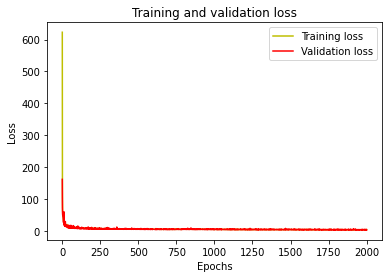

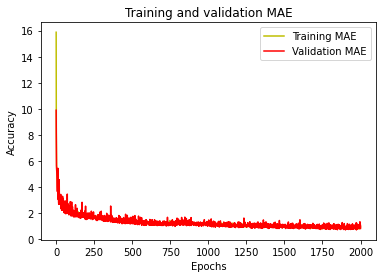

In [53]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['mean_absolute_error']
val_acc = history.history['val_mean_absolute_error']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [54]:
mse_neural, mae_neural = nn_model.evaluate(X_test, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

60/60 [==============================] - 0s 2ms/step - loss: 3.4934 - mean_absolute_error: 0.8419
Mean squared error from neural net:  3.49342942237854
Mean absolute error from neural net:  0.8418792486190796


In [56]:
nn_model = Sequential()
nn_model.add(Dense(128, input_dim=7, activation='relu'))
nn_model.add(Dense(64, activation='relu'))
#Output layer
nn_model.add(Dense(1, activation='linear'))

nn_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
history = nn_model.fit(X, y, validation_split=0.2, epochs =2000)

Epoch 1/2000
240/240 [==============================] - 2s 4ms/step - loss: 559.0775 - mean_absolute_error: 17.6430 - val_loss: 94.4390 - val_mean_absolute_error: 7.8065
Epoch 2/2000
240/240 [==============================] - 1s 3ms/step - loss: 71.6708 - mean_absolute_error: 6.7756 - val_loss: 46.8686 - val_mean_absolute_error: 5.3539
Epoch 3/2000
240/240 [==============================] - 1s 2ms/step - loss: 46.1776 - mean_absolute_error: 5.3558 - val_loss: 43.3577 - val_mean_absolute_error: 5.0510
Epoch 4/2000
240/240 [==============================] - 0s 2ms/step - loss: 39.7631 - mean_absolute_error: 4.8742 - val_loss: 30.2671 - val_mean_absolute_error: 4.1874
Epoch 5/2000
240/240 [==============================] - 1s 2ms/step - loss: 31.7751 - mean_absolute_error: 4.3270 - val_loss: 30.7297 - val_mean_absolute_error: 4.2038
Epoch 6/2000
240/240 [==============================] - 1s 2ms/step - loss: 37.1571 - mean_absolute_error: 4.5344 - val_loss: 27.6259 - val_mean_absolute_erro

240/240 [==============================] - 1s 2ms/step - loss: 10.7218 - mean_absolute_error: 2.2616 - val_loss: 9.5118 - val_mean_absolute_error: 2.0826
Epoch 50/2000
240/240 [==============================] - 0s 2ms/step - loss: 10.0894 - mean_absolute_error: 2.1767 - val_loss: 15.8215 - val_mean_absolute_error: 2.6994
Epoch 51/2000
240/240 [==============================] - 0s 2ms/step - loss: 9.8063 - mean_absolute_error: 2.1250 - val_loss: 10.2929 - val_mean_absolute_error: 2.2019
Epoch 52/2000
240/240 [==============================] - 0s 2ms/step - loss: 10.0256 - mean_absolute_error: 2.1229 - val_loss: 8.4742 - val_mean_absolute_error: 1.9504
Epoch 53/2000
240/240 [==============================] - 0s 2ms/step - loss: 10.2411 - mean_absolute_error: 2.2059 - val_loss: 10.2912 - val_mean_absolute_error: 2.3563
Epoch 54/2000
240/240 [==============================] - 1s 2ms/step - loss: 9.8212 - mean_absolute_error: 2.1436 - val_loss: 9.8623 - val_mean_absolute_error: 2.3385
Epoch

Epoch 98/2000
240/240 [==============================] - 0s 2ms/step - loss: 9.4376 - mean_absolute_error: 2.0489 - val_loss: 8.1302 - val_mean_absolute_error: 1.8056
Epoch 99/2000
240/240 [==============================] - 0s 2ms/step - loss: 9.0352 - mean_absolute_error: 1.9729 - val_loss: 9.9947 - val_mean_absolute_error: 2.3045
Epoch 100/2000
240/240 [==============================] - 0s 2ms/step - loss: 9.2653 - mean_absolute_error: 2.0134 - val_loss: 10.7710 - val_mean_absolute_error: 2.1977
Epoch 101/2000
240/240 [==============================] - 1s 2ms/step - loss: 8.6954 - mean_absolute_error: 1.9811 - val_loss: 7.9456 - val_mean_absolute_error: 1.9181
Epoch 102/2000
240/240 [==============================] - 0s 2ms/step - loss: 7.5160 - mean_absolute_error: 1.8004 - val_loss: 7.2679 - val_mean_absolute_error: 1.7442
Epoch 103/2000
240/240 [==============================] - 1s 2ms/step - loss: 9.4529 - mean_absolute_error: 2.0751 - val_loss: 7.9623 - val_mean_absolute_error: 

Epoch 147/2000
240/240 [==============================] - 0s 2ms/step - loss: 8.7609 - mean_absolute_error: 1.9568 - val_loss: 9.6343 - val_mean_absolute_error: 2.1492
Epoch 148/2000
240/240 [==============================] - 0s 2ms/step - loss: 8.3099 - mean_absolute_error: 1.8737 - val_loss: 7.3452 - val_mean_absolute_error: 1.7340
Epoch 149/2000
240/240 [==============================] - 0s 2ms/step - loss: 8.6587 - mean_absolute_error: 1.9025 - val_loss: 7.9255 - val_mean_absolute_error: 1.8116
Epoch 150/2000
240/240 [==============================] - 0s 2ms/step - loss: 8.2419 - mean_absolute_error: 1.8455 - val_loss: 7.0437 - val_mean_absolute_error: 1.6825
Epoch 151/2000
240/240 [==============================] - 0s 2ms/step - loss: 7.4098 - mean_absolute_error: 1.7383 - val_loss: 7.5114 - val_mean_absolute_error: 1.7208
Epoch 152/2000
240/240 [==============================] - 0s 2ms/step - loss: 7.8739 - mean_absolute_error: 1.8196 - val_loss: 7.9154 - val_mean_absolute_error:

Epoch 196/2000
240/240 [==============================] - 0s 2ms/step - loss: 7.2521 - mean_absolute_error: 1.6428 - val_loss: 6.6790 - val_mean_absolute_error: 1.5800
Epoch 197/2000
240/240 [==============================] - 0s 2ms/step - loss: 7.2047 - mean_absolute_error: 1.6424 - val_loss: 7.6920 - val_mean_absolute_error: 1.7099
Epoch 198/2000
240/240 [==============================] - 0s 2ms/step - loss: 8.1947 - mean_absolute_error: 1.8429 - val_loss: 6.5182 - val_mean_absolute_error: 1.5220
Epoch 199/2000
240/240 [==============================] - 0s 2ms/step - loss: 6.9794 - mean_absolute_error: 1.6398 - val_loss: 7.7714 - val_mean_absolute_error: 1.8288
Epoch 200/2000
240/240 [==============================] - 0s 2ms/step - loss: 8.0324 - mean_absolute_error: 1.7231 - val_loss: 6.7856 - val_mean_absolute_error: 1.6495
Epoch 201/2000
240/240 [==============================] - 0s 2ms/step - loss: 7.4737 - mean_absolute_error: 1.7108 - val_loss: 7.3376 - val_mean_absolute_error:

Epoch 245/2000
240/240 [==============================] - 0s 2ms/step - loss: 7.2461 - mean_absolute_error: 1.6546 - val_loss: 6.6377 - val_mean_absolute_error: 1.5652
Epoch 246/2000
240/240 [==============================] - 0s 2ms/step - loss: 6.7398 - mean_absolute_error: 1.5756 - val_loss: 6.7250 - val_mean_absolute_error: 1.5604
Epoch 247/2000
240/240 [==============================] - 1s 2ms/step - loss: 7.2580 - mean_absolute_error: 1.6364 - val_loss: 6.7088 - val_mean_absolute_error: 1.5036
Epoch 248/2000
240/240 [==============================] - 0s 2ms/step - loss: 7.2823 - mean_absolute_error: 1.6450 - val_loss: 6.0381 - val_mean_absolute_error: 1.4092
Epoch 249/2000
240/240 [==============================] - 0s 2ms/step - loss: 6.8681 - mean_absolute_error: 1.5004 - val_loss: 6.0516 - val_mean_absolute_error: 1.3965
Epoch 250/2000
240/240 [==============================] - 0s 2ms/step - loss: 6.2560 - mean_absolute_error: 1.4760 - val_loss: 6.9008 - val_mean_absolute_error:

Epoch 294/2000
240/240 [==============================] - 0s 2ms/step - loss: 6.3127 - mean_absolute_error: 1.5003 - val_loss: 5.7292 - val_mean_absolute_error: 1.4343
Epoch 295/2000
240/240 [==============================] - 0s 2ms/step - loss: 6.7474 - mean_absolute_error: 1.5167 - val_loss: 6.1500 - val_mean_absolute_error: 1.4743
Epoch 296/2000
240/240 [==============================] - 0s 2ms/step - loss: 7.0971 - mean_absolute_error: 1.5735 - val_loss: 5.9777 - val_mean_absolute_error: 1.3409
Epoch 297/2000
240/240 [==============================] - 0s 2ms/step - loss: 6.7504 - mean_absolute_error: 1.6437 - val_loss: 5.8506 - val_mean_absolute_error: 1.4091
Epoch 298/2000
240/240 [==============================] - 0s 2ms/step - loss: 6.5573 - mean_absolute_error: 1.5576 - val_loss: 6.2395 - val_mean_absolute_error: 1.5212
Epoch 299/2000
240/240 [==============================] - 0s 2ms/step - loss: 6.8986 - mean_absolute_error: 1.5930 - val_loss: 9.4499 - val_mean_absolute_error:

Epoch 343/2000
240/240 [==============================] - 0s 2ms/step - loss: 6.7587 - mean_absolute_error: 1.5226 - val_loss: 5.2258 - val_mean_absolute_error: 1.2598
Epoch 344/2000
240/240 [==============================] - 0s 2ms/step - loss: 6.1726 - mean_absolute_error: 1.4412 - val_loss: 5.7013 - val_mean_absolute_error: 1.3455
Epoch 345/2000
240/240 [==============================] - 0s 2ms/step - loss: 6.4427 - mean_absolute_error: 1.4725 - val_loss: 6.4210 - val_mean_absolute_error: 1.7258
Epoch 346/2000
240/240 [==============================] - 0s 2ms/step - loss: 6.4352 - mean_absolute_error: 1.5320 - val_loss: 7.3236 - val_mean_absolute_error: 1.8433
Epoch 347/2000
240/240 [==============================] - 0s 2ms/step - loss: 6.1481 - mean_absolute_error: 1.4832 - val_loss: 5.8970 - val_mean_absolute_error: 1.3187
Epoch 348/2000
240/240 [==============================] - 0s 2ms/step - loss: 6.2888 - mean_absolute_error: 1.4454 - val_loss: 5.6489 - val_mean_absolute_error:

Epoch 392/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.8446 - mean_absolute_error: 1.4065 - val_loss: 4.9555 - val_mean_absolute_error: 1.1941
Epoch 393/2000
240/240 [==============================] - 0s 2ms/step - loss: 6.7722 - mean_absolute_error: 1.4453 - val_loss: 5.1176 - val_mean_absolute_error: 1.2674
Epoch 394/2000
240/240 [==============================] - 0s 2ms/step - loss: 6.2234 - mean_absolute_error: 1.4558 - val_loss: 5.5608 - val_mean_absolute_error: 1.2411
Epoch 395/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.3803 - mean_absolute_error: 1.2811 - val_loss: 6.1569 - val_mean_absolute_error: 1.5496
Epoch 396/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.8095 - mean_absolute_error: 1.4136 - val_loss: 6.1069 - val_mean_absolute_error: 1.3538
Epoch 397/2000
240/240 [==============================] - 0s 2ms/step - loss: 6.2136 - mean_absolute_error: 1.3872 - val_loss: 7.6799 - val_mean_absolute_error:

Epoch 441/2000
240/240 [==============================] - 0s 2ms/step - loss: 6.1208 - mean_absolute_error: 1.4202 - val_loss: 5.6332 - val_mean_absolute_error: 1.5041
Epoch 442/2000
240/240 [==============================] - 0s 2ms/step - loss: 6.3141 - mean_absolute_error: 1.4175 - val_loss: 5.3260 - val_mean_absolute_error: 1.2494
Epoch 443/2000
240/240 [==============================] - 0s 2ms/step - loss: 6.4791 - mean_absolute_error: 1.3813 - val_loss: 4.9387 - val_mean_absolute_error: 1.2858
Epoch 444/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.2683 - mean_absolute_error: 1.3225 - val_loss: 5.6272 - val_mean_absolute_error: 1.3253
Epoch 445/2000
240/240 [==============================] - 0s 2ms/step - loss: 6.3388 - mean_absolute_error: 1.3926 - val_loss: 5.7519 - val_mean_absolute_error: 1.4364
Epoch 446/2000
240/240 [==============================] - 0s 2ms/step - loss: 6.2929 - mean_absolute_error: 1.4340 - val_loss: 5.0562 - val_mean_absolute_error:

Epoch 490/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.4450 - mean_absolute_error: 1.3226 - val_loss: 5.5469 - val_mean_absolute_error: 1.3938
Epoch 491/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.4616 - mean_absolute_error: 1.3174 - val_loss: 5.6931 - val_mean_absolute_error: 1.5130
Epoch 492/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.9330 - mean_absolute_error: 1.3737 - val_loss: 5.1672 - val_mean_absolute_error: 1.3227
Epoch 493/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.5459 - mean_absolute_error: 1.3486 - val_loss: 5.1550 - val_mean_absolute_error: 1.3396
Epoch 494/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.7754 - mean_absolute_error: 1.3614 - val_loss: 6.9247 - val_mean_absolute_error: 1.5634
Epoch 495/2000
240/240 [==============================] - 0s 2ms/step - loss: 6.3014 - mean_absolute_error: 1.4425 - val_loss: 6.2208 - val_mean_absolute_error:

Epoch 539/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.1085 - mean_absolute_error: 1.2554 - val_loss: 4.8749 - val_mean_absolute_error: 1.1847
Epoch 540/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.1192 - mean_absolute_error: 1.2572 - val_loss: 4.7480 - val_mean_absolute_error: 1.2321
Epoch 541/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.4641 - mean_absolute_error: 1.2427 - val_loss: 5.5302 - val_mean_absolute_error: 1.4401
Epoch 542/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.8467 - mean_absolute_error: 1.3392 - val_loss: 4.9605 - val_mean_absolute_error: 1.2241
Epoch 543/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.4380 - mean_absolute_error: 1.3312 - val_loss: 5.7532 - val_mean_absolute_error: 1.5144
Epoch 544/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.4173 - mean_absolute_error: 1.2868 - val_loss: 5.3830 - val_mean_absolute_error:

Epoch 588/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.3516 - mean_absolute_error: 1.2693 - val_loss: 5.2694 - val_mean_absolute_error: 1.3338
Epoch 589/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.5043 - mean_absolute_error: 1.2655 - val_loss: 4.5898 - val_mean_absolute_error: 1.1517
Epoch 590/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.5690 - mean_absolute_error: 1.2984 - val_loss: 4.7862 - val_mean_absolute_error: 1.1098
Epoch 591/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.3166 - mean_absolute_error: 1.2194 - val_loss: 4.8657 - val_mean_absolute_error: 1.1484
Epoch 592/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.3102 - mean_absolute_error: 1.2258 - val_loss: 5.8257 - val_mean_absolute_error: 1.2663
Epoch 593/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.5256 - mean_absolute_error: 1.2718 - val_loss: 5.0660 - val_mean_absolute_error:

Epoch 637/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.1962 - mean_absolute_error: 1.2457 - val_loss: 4.6935 - val_mean_absolute_error: 1.1394
Epoch 638/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.9535 - mean_absolute_error: 1.1906 - val_loss: 6.4064 - val_mean_absolute_error: 1.5596
Epoch 639/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.9175 - mean_absolute_error: 1.3951 - val_loss: 4.9693 - val_mean_absolute_error: 1.3173
Epoch 640/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.0351 - mean_absolute_error: 1.2649 - val_loss: 4.9112 - val_mean_absolute_error: 1.1251
Epoch 641/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.3436 - mean_absolute_error: 1.1965 - val_loss: 4.3159 - val_mean_absolute_error: 1.0522
Epoch 642/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.9808 - mean_absolute_error: 1.2169 - val_loss: 5.1484 - val_mean_absolute_error:

Epoch 686/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.8619 - mean_absolute_error: 1.3377 - val_loss: 5.3438 - val_mean_absolute_error: 1.3380
Epoch 687/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.5347 - mean_absolute_error: 1.3245 - val_loss: 4.7274 - val_mean_absolute_error: 1.1755
Epoch 688/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.3356 - mean_absolute_error: 1.2744 - val_loss: 5.4766 - val_mean_absolute_error: 1.3958
Epoch 689/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.8184 - mean_absolute_error: 1.3508 - val_loss: 6.9967 - val_mean_absolute_error: 1.7635
Epoch 690/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.8011 - mean_absolute_error: 1.4134 - val_loss: 6.3055 - val_mean_absolute_error: 1.4008
Epoch 691/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.8045 - mean_absolute_error: 1.3709 - val_loss: 5.2716 - val_mean_absolute_error:

Epoch 735/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.7493 - mean_absolute_error: 1.3243 - val_loss: 5.7485 - val_mean_absolute_error: 1.3818
Epoch 736/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.4584 - mean_absolute_error: 1.3124 - val_loss: 5.4455 - val_mean_absolute_error: 1.2804
Epoch 737/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.6433 - mean_absolute_error: 1.3183 - val_loss: 5.6487 - val_mean_absolute_error: 1.4404
Epoch 738/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.3378 - mean_absolute_error: 1.2848 - val_loss: 7.3801 - val_mean_absolute_error: 1.7821
Epoch 739/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.5303 - mean_absolute_error: 1.3792 - val_loss: 4.6603 - val_mean_absolute_error: 1.1011
Epoch 740/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.0847 - mean_absolute_error: 1.2882 - val_loss: 5.5040 - val_mean_absolute_error:

Epoch 784/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.0255 - mean_absolute_error: 1.2351 - val_loss: 5.2603 - val_mean_absolute_error: 1.1905
Epoch 785/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.6955 - mean_absolute_error: 1.3093 - val_loss: 4.8045 - val_mean_absolute_error: 1.1574
Epoch 786/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.3277 - mean_absolute_error: 1.2642 - val_loss: 5.1348 - val_mean_absolute_error: 1.2170
Epoch 787/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.3412 - mean_absolute_error: 1.2276 - val_loss: 4.7906 - val_mean_absolute_error: 1.2256
Epoch 788/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.2606 - mean_absolute_error: 1.2645 - val_loss: 6.6429 - val_mean_absolute_error: 1.3479
Epoch 789/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.7290 - mean_absolute_error: 1.2908 - val_loss: 5.4360 - val_mean_absolute_error:

Epoch 833/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.1895 - mean_absolute_error: 1.2668 - val_loss: 4.3284 - val_mean_absolute_error: 1.0884
Epoch 834/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.0874 - mean_absolute_error: 1.2015 - val_loss: 4.9433 - val_mean_absolute_error: 1.1805
Epoch 835/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.3571 - mean_absolute_error: 1.2783 - val_loss: 4.6060 - val_mean_absolute_error: 1.1541
Epoch 836/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.4052 - mean_absolute_error: 1.2337 - val_loss: 5.1153 - val_mean_absolute_error: 1.1913
Epoch 837/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.4615 - mean_absolute_error: 1.2955 - val_loss: 5.1231 - val_mean_absolute_error: 1.2950
Epoch 838/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.7220 - mean_absolute_error: 1.3069 - val_loss: 4.8520 - val_mean_absolute_error:

Epoch 882/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.5643 - mean_absolute_error: 1.1372 - val_loss: 4.5782 - val_mean_absolute_error: 1.1582
Epoch 883/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.7112 - mean_absolute_error: 1.1290 - val_loss: 4.3337 - val_mean_absolute_error: 1.0971
Epoch 884/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.7429 - mean_absolute_error: 1.1697 - val_loss: 4.9479 - val_mean_absolute_error: 1.1249
Epoch 885/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.1035 - mean_absolute_error: 1.2617 - val_loss: 4.7527 - val_mean_absolute_error: 1.1336
Epoch 886/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.1150 - mean_absolute_error: 1.2451 - val_loss: 3.8859 - val_mean_absolute_error: 1.0484
Epoch 887/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.9469 - mean_absolute_error: 1.1815 - val_loss: 4.3010 - val_mean_absolute_error:

Epoch 931/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.2661 - mean_absolute_error: 1.2220 - val_loss: 4.1050 - val_mean_absolute_error: 1.0333
Epoch 932/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.9015 - mean_absolute_error: 1.1315 - val_loss: 4.4283 - val_mean_absolute_error: 1.0607
Epoch 933/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.7170 - mean_absolute_error: 1.1537 - val_loss: 4.5195 - val_mean_absolute_error: 1.0168
Epoch 934/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.7756 - mean_absolute_error: 1.1226 - val_loss: 4.3414 - val_mean_absolute_error: 1.0355
Epoch 935/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.6476 - mean_absolute_error: 1.1473 - val_loss: 3.9930 - val_mean_absolute_error: 1.0277
Epoch 936/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.1338 - mean_absolute_error: 1.1809 - val_loss: 4.1144 - val_mean_absolute_error:

Epoch 980/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.2988 - mean_absolute_error: 1.0296 - val_loss: 4.3904 - val_mean_absolute_error: 0.9882
Epoch 981/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.6815 - mean_absolute_error: 1.0971 - val_loss: 4.2293 - val_mean_absolute_error: 0.9442
Epoch 982/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.0268 - mean_absolute_error: 1.0808 - val_loss: 4.0930 - val_mean_absolute_error: 1.0944
Epoch 983/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.7871 - mean_absolute_error: 1.1605 - val_loss: 4.6186 - val_mean_absolute_error: 1.0602
Epoch 984/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.4164 - mean_absolute_error: 1.0582 - val_loss: 4.3901 - val_mean_absolute_error: 1.0943
Epoch 985/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.2413 - mean_absolute_error: 1.0621 - val_loss: 5.0933 - val_mean_absolute_error:

240/240 [==============================] - 0s 2ms/step - loss: 5.2393 - mean_absolute_error: 1.2918 - val_loss: 4.8016 - val_mean_absolute_error: 1.1755
Epoch 1029/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.6400 - mean_absolute_error: 1.1562 - val_loss: 4.2986 - val_mean_absolute_error: 1.0168
Epoch 1030/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.8941 - mean_absolute_error: 1.1769 - val_loss: 5.0191 - val_mean_absolute_error: 1.1660
Epoch 1031/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.9833 - mean_absolute_error: 1.1765 - val_loss: 4.6090 - val_mean_absolute_error: 1.2199
Epoch 1032/2000
240/240 [==============================] - 1s 3ms/step - loss: 5.0375 - mean_absolute_error: 1.1519 - val_loss: 4.2231 - val_mean_absolute_error: 1.0200
Epoch 1033/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.7122 - mean_absolute_error: 1.1197 - val_loss: 4.4587 - val_mean_absolute_error: 1.0861
Ep

240/240 [==============================] - 0s 2ms/step - loss: 4.5308 - mean_absolute_error: 1.0546 - val_loss: 4.1083 - val_mean_absolute_error: 0.9509
Epoch 1077/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.2773 - mean_absolute_error: 1.2014 - val_loss: 4.1057 - val_mean_absolute_error: 1.0128
Epoch 1078/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.4213 - mean_absolute_error: 1.0724 - val_loss: 4.8357 - val_mean_absolute_error: 1.1495
Epoch 1079/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.8199 - mean_absolute_error: 1.1240 - val_loss: 4.6449 - val_mean_absolute_error: 1.2848
Epoch 1080/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.6696 - mean_absolute_error: 1.1140 - val_loss: 4.4730 - val_mean_absolute_error: 1.1701
Epoch 1081/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.8187 - mean_absolute_error: 1.1128 - val_loss: 4.1579 - val_mean_absolute_error: 0.9841
Ep

240/240 [==============================] - 1s 2ms/step - loss: 4.7469 - mean_absolute_error: 1.0954 - val_loss: 4.4254 - val_mean_absolute_error: 1.1489
Epoch 1125/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.3887 - mean_absolute_error: 1.0410 - val_loss: 4.1565 - val_mean_absolute_error: 1.0049
Epoch 1126/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.6598 - mean_absolute_error: 1.1132 - val_loss: 3.8603 - val_mean_absolute_error: 0.9445
Epoch 1127/2000
240/240 [==============================] - 1s 3ms/step - loss: 4.1282 - mean_absolute_error: 1.0009 - val_loss: 4.6526 - val_mean_absolute_error: 1.0094
Epoch 1128/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.4082 - mean_absolute_error: 1.0113 - val_loss: 4.3189 - val_mean_absolute_error: 1.2101
Epoch 1129/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.6291 - mean_absolute_error: 1.0699 - val_loss: 4.5925 - val_mean_absolute_error: 1.0614
Ep

240/240 [==============================] - 1s 2ms/step - loss: 4.4319 - mean_absolute_error: 1.0422 - val_loss: 4.7210 - val_mean_absolute_error: 1.1611
Epoch 1173/2000
240/240 [==============================] - 1s 3ms/step - loss: 4.9339 - mean_absolute_error: 1.0920 - val_loss: 4.7885 - val_mean_absolute_error: 1.2101
Epoch 1174/2000
240/240 [==============================] - 1s 3ms/step - loss: 4.3745 - mean_absolute_error: 1.0628 - val_loss: 4.1160 - val_mean_absolute_error: 1.0035
Epoch 1175/2000
240/240 [==============================] - 1s 3ms/step - loss: 3.9295 - mean_absolute_error: 0.9546 - val_loss: 4.6833 - val_mean_absolute_error: 1.2564
Epoch 1176/2000
240/240 [==============================] - 1s 3ms/step - loss: 5.0414 - mean_absolute_error: 1.1103 - val_loss: 4.1384 - val_mean_absolute_error: 0.9060
Epoch 1177/2000
240/240 [==============================] - 1s 3ms/step - loss: 4.1289 - mean_absolute_error: 0.9877 - val_loss: 4.0349 - val_mean_absolute_error: 0.9158
Ep

240/240 [==============================] - 0s 2ms/step - loss: 4.6382 - mean_absolute_error: 1.0456 - val_loss: 3.9136 - val_mean_absolute_error: 0.8577
Epoch 1221/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.3332 - mean_absolute_error: 0.9801 - val_loss: 4.0354 - val_mean_absolute_error: 1.0398
Epoch 1222/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.4232 - mean_absolute_error: 1.0398 - val_loss: 4.5789 - val_mean_absolute_error: 1.0139
Epoch 1223/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.5421 - mean_absolute_error: 1.0325 - val_loss: 4.4673 - val_mean_absolute_error: 1.0431
Epoch 1224/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.3514 - mean_absolute_error: 1.0388 - val_loss: 5.9651 - val_mean_absolute_error: 1.6148
Epoch 1225/2000
240/240 [==============================] - 0s 2ms/step - loss: 5.0370 - mean_absolute_error: 1.2135 - val_loss: 4.1792 - val_mean_absolute_error: 0.9811
Ep

240/240 [==============================] - 0s 2ms/step - loss: 4.0066 - mean_absolute_error: 0.9558 - val_loss: 4.2737 - val_mean_absolute_error: 0.9325
Epoch 1269/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.4961 - mean_absolute_error: 1.0198 - val_loss: 4.2316 - val_mean_absolute_error: 0.9386
Epoch 1270/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.1716 - mean_absolute_error: 0.9680 - val_loss: 4.0618 - val_mean_absolute_error: 0.9945
Epoch 1271/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.0124 - mean_absolute_error: 0.9470 - val_loss: 4.2780 - val_mean_absolute_error: 0.8771
Epoch 1272/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.4154 - mean_absolute_error: 1.0050 - val_loss: 4.0379 - val_mean_absolute_error: 0.9813
Epoch 1273/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.3778 - mean_absolute_error: 1.0313 - val_loss: 3.8854 - val_mean_absolute_error: 0.8778
Ep

240/240 [==============================] - 0s 2ms/step - loss: 4.5259 - mean_absolute_error: 1.0565 - val_loss: 3.7936 - val_mean_absolute_error: 0.8944
Epoch 1317/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.1426 - mean_absolute_error: 0.9429 - val_loss: 4.5894 - val_mean_absolute_error: 0.9624
Epoch 1318/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.3668 - mean_absolute_error: 1.0238 - val_loss: 3.6646 - val_mean_absolute_error: 0.8717
Epoch 1319/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.2202 - mean_absolute_error: 0.9716 - val_loss: 4.2446 - val_mean_absolute_error: 1.0076
Epoch 1320/2000
240/240 [==============================] - 0s 2ms/step - loss: 3.9903 - mean_absolute_error: 0.9499 - val_loss: 4.3540 - val_mean_absolute_error: 0.9658
Epoch 1321/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.4394 - mean_absolute_error: 0.9947 - val_loss: 4.4205 - val_mean_absolute_error: 1.1493
Ep

240/240 [==============================] - 1s 2ms/step - loss: 4.1180 - mean_absolute_error: 0.9305 - val_loss: 3.8352 - val_mean_absolute_error: 0.8901
Epoch 1365/2000
240/240 [==============================] - 1s 2ms/step - loss: 3.9431 - mean_absolute_error: 0.9540 - val_loss: 3.8280 - val_mean_absolute_error: 1.0107
Epoch 1366/2000
240/240 [==============================] - 1s 2ms/step - loss: 3.9418 - mean_absolute_error: 0.9398 - val_loss: 3.7062 - val_mean_absolute_error: 0.8171
Epoch 1367/2000
240/240 [==============================] - 1s 3ms/step - loss: 4.0260 - mean_absolute_error: 0.9106 - val_loss: 3.8705 - val_mean_absolute_error: 0.8495
Epoch 1368/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.3599 - mean_absolute_error: 1.0078 - val_loss: 3.7655 - val_mean_absolute_error: 0.9267
Epoch 1369/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.0290 - mean_absolute_error: 0.9337 - val_loss: 4.0549 - val_mean_absolute_error: 0.9660
Ep

240/240 [==============================] - 0s 2ms/step - loss: 4.1912 - mean_absolute_error: 0.9201 - val_loss: 3.6745 - val_mean_absolute_error: 0.8475
Epoch 1413/2000
240/240 [==============================] - 0s 2ms/step - loss: 3.7480 - mean_absolute_error: 0.8764 - val_loss: 3.6126 - val_mean_absolute_error: 0.8461
Epoch 1414/2000
240/240 [==============================] - 0s 2ms/step - loss: 3.7272 - mean_absolute_error: 0.8877 - val_loss: 4.5649 - val_mean_absolute_error: 0.9480
Epoch 1415/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.2855 - mean_absolute_error: 1.0297 - val_loss: 5.1369 - val_mean_absolute_error: 1.0370
Epoch 1416/2000
240/240 [==============================] - 0s 2ms/step - loss: 3.6580 - mean_absolute_error: 0.8866 - val_loss: 5.0604 - val_mean_absolute_error: 1.2006
Epoch 1417/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.5145 - mean_absolute_error: 1.0182 - val_loss: 4.1398 - val_mean_absolute_error: 0.9608
Ep

240/240 [==============================] - 0s 2ms/step - loss: 4.5279 - mean_absolute_error: 1.0005 - val_loss: 3.3271 - val_mean_absolute_error: 0.7656
Epoch 1461/2000
240/240 [==============================] - 0s 2ms/step - loss: 3.5116 - mean_absolute_error: 0.7845 - val_loss: 4.8239 - val_mean_absolute_error: 0.9695
Epoch 1462/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.3511 - mean_absolute_error: 1.0396 - val_loss: 3.9856 - val_mean_absolute_error: 1.0242
Epoch 1463/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.0041 - mean_absolute_error: 0.9636 - val_loss: 4.0896 - val_mean_absolute_error: 0.8533
Epoch 1464/2000
240/240 [==============================] - 1s 3ms/step - loss: 3.9175 - mean_absolute_error: 0.9389 - val_loss: 4.3309 - val_mean_absolute_error: 0.9074
Epoch 1465/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.4087 - mean_absolute_error: 1.0039 - val_loss: 3.5949 - val_mean_absolute_error: 0.8471
Ep

240/240 [==============================] - 1s 2ms/step - loss: 3.9281 - mean_absolute_error: 0.8929 - val_loss: 4.0261 - val_mean_absolute_error: 0.9528
Epoch 1509/2000
240/240 [==============================] - 0s 2ms/step - loss: 3.7543 - mean_absolute_error: 0.8949 - val_loss: 3.7002 - val_mean_absolute_error: 0.7921
Epoch 1510/2000
240/240 [==============================] - 0s 2ms/step - loss: 3.8589 - mean_absolute_error: 0.8429 - val_loss: 3.9023 - val_mean_absolute_error: 0.8686
Epoch 1511/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.2834 - mean_absolute_error: 0.9379 - val_loss: 4.2293 - val_mean_absolute_error: 1.0105
Epoch 1512/2000
240/240 [==============================] - 0s 2ms/step - loss: 3.6312 - mean_absolute_error: 0.8438 - val_loss: 4.0417 - val_mean_absolute_error: 1.0598
Epoch 1513/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.2549 - mean_absolute_error: 0.9651 - val_loss: 3.7067 - val_mean_absolute_error: 0.8751
Ep

240/240 [==============================] - 1s 2ms/step - loss: 3.4312 - mean_absolute_error: 0.8085 - val_loss: 4.0986 - val_mean_absolute_error: 0.8933
Epoch 1557/2000
240/240 [==============================] - 1s 2ms/step - loss: 3.5932 - mean_absolute_error: 0.8276 - val_loss: 4.4252 - val_mean_absolute_error: 0.9897
Epoch 1558/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.2609 - mean_absolute_error: 0.9584 - val_loss: 4.0887 - val_mean_absolute_error: 0.9869
Epoch 1559/2000
240/240 [==============================] - 1s 3ms/step - loss: 3.9892 - mean_absolute_error: 0.9107 - val_loss: 3.7038 - val_mean_absolute_error: 0.8200
Epoch 1560/2000
240/240 [==============================] - 1s 3ms/step - loss: 3.8754 - mean_absolute_error: 0.8449 - val_loss: 3.7165 - val_mean_absolute_error: 0.8512
Epoch 1561/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.4844 - mean_absolute_error: 1.0097 - val_loss: 3.7759 - val_mean_absolute_error: 0.8356
Ep

240/240 [==============================] - 0s 2ms/step - loss: 4.1668 - mean_absolute_error: 0.9086 - val_loss: 3.7248 - val_mean_absolute_error: 0.8353
Epoch 1605/2000
240/240 [==============================] - 0s 2ms/step - loss: 3.9651 - mean_absolute_error: 0.8861 - val_loss: 3.9120 - val_mean_absolute_error: 1.0370
Epoch 1606/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.1193 - mean_absolute_error: 0.9650 - val_loss: 3.3760 - val_mean_absolute_error: 0.7935
Epoch 1607/2000
240/240 [==============================] - 1s 2ms/step - loss: 3.5860 - mean_absolute_error: 0.8748 - val_loss: 3.5401 - val_mean_absolute_error: 0.7993
Epoch 1608/2000
240/240 [==============================] - 0s 2ms/step - loss: 3.8904 - mean_absolute_error: 0.9014 - val_loss: 4.3434 - val_mean_absolute_error: 0.8576
Epoch 1609/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.3798 - mean_absolute_error: 1.0131 - val_loss: 3.4057 - val_mean_absolute_error: 0.7950
Ep

240/240 [==============================] - 1s 2ms/step - loss: 4.1040 - mean_absolute_error: 0.9542 - val_loss: 3.6327 - val_mean_absolute_error: 0.8169
Epoch 1653/2000
240/240 [==============================] - 0s 2ms/step - loss: 3.9909 - mean_absolute_error: 0.8987 - val_loss: 3.8877 - val_mean_absolute_error: 0.9622
Epoch 1654/2000
240/240 [==============================] - 0s 2ms/step - loss: 3.7398 - mean_absolute_error: 0.8803 - val_loss: 4.0365 - val_mean_absolute_error: 1.1488
Epoch 1655/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.0155 - mean_absolute_error: 0.9259 - val_loss: 3.7497 - val_mean_absolute_error: 0.8393
Epoch 1656/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.0165 - mean_absolute_error: 0.9135 - val_loss: 3.5648 - val_mean_absolute_error: 0.8412
Epoch 1657/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.1269 - mean_absolute_error: 0.9224 - val_loss: 5.3583 - val_mean_absolute_error: 1.5606
Ep

240/240 [==============================] - 0s 2ms/step - loss: 3.7845 - mean_absolute_error: 0.8559 - val_loss: 3.6561 - val_mean_absolute_error: 0.8875
Epoch 1701/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.3815 - mean_absolute_error: 0.9345 - val_loss: 3.4551 - val_mean_absolute_error: 0.7739
Epoch 1702/2000
240/240 [==============================] - 1s 2ms/step - loss: 3.7971 - mean_absolute_error: 0.8803 - val_loss: 3.4845 - val_mean_absolute_error: 0.9043
Epoch 1703/2000
240/240 [==============================] - 0s 2ms/step - loss: 3.9512 - mean_absolute_error: 0.9461 - val_loss: 3.5505 - val_mean_absolute_error: 0.8728
Epoch 1704/2000
240/240 [==============================] - 1s 3ms/step - loss: 3.5333 - mean_absolute_error: 0.8345 - val_loss: 3.5304 - val_mean_absolute_error: 0.8667
Epoch 1705/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.0102 - mean_absolute_error: 0.9033 - val_loss: 3.9062 - val_mean_absolute_error: 0.9094
Ep

240/240 [==============================] - 0s 2ms/step - loss: 4.4609 - mean_absolute_error: 1.0585 - val_loss: 4.1374 - val_mean_absolute_error: 1.1002
Epoch 1749/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.0562 - mean_absolute_error: 1.0174 - val_loss: 3.7441 - val_mean_absolute_error: 0.9930
Epoch 1750/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.2408 - mean_absolute_error: 0.9750 - val_loss: 4.2411 - val_mean_absolute_error: 0.8969
Epoch 1751/2000
240/240 [==============================] - 0s 2ms/step - loss: 3.9631 - mean_absolute_error: 0.9483 - val_loss: 4.1453 - val_mean_absolute_error: 0.9873
Epoch 1752/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.7831 - mean_absolute_error: 1.0379 - val_loss: 4.1752 - val_mean_absolute_error: 0.9835
Epoch 1753/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.1084 - mean_absolute_error: 0.9932 - val_loss: 4.0931 - val_mean_absolute_error: 0.9091
Ep

240/240 [==============================] - 0s 2ms/step - loss: 3.7947 - mean_absolute_error: 0.9051 - val_loss: 3.5936 - val_mean_absolute_error: 0.8068
Epoch 1797/2000
240/240 [==============================] - 0s 2ms/step - loss: 3.8651 - mean_absolute_error: 0.8810 - val_loss: 3.8763 - val_mean_absolute_error: 0.9782
Epoch 1798/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.3358 - mean_absolute_error: 1.0073 - val_loss: 4.5101 - val_mean_absolute_error: 1.1193
Epoch 1799/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.2648 - mean_absolute_error: 1.0229 - val_loss: 4.0392 - val_mean_absolute_error: 0.9434
Epoch 1800/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.0386 - mean_absolute_error: 0.9523 - val_loss: 4.4059 - val_mean_absolute_error: 0.9927
Epoch 1801/2000
240/240 [==============================] - 0s 2ms/step - loss: 3.8248 - mean_absolute_error: 0.9717 - val_loss: 4.5610 - val_mean_absolute_error: 1.0399
Ep

240/240 [==============================] - 1s 3ms/step - loss: 4.0528 - mean_absolute_error: 0.8949 - val_loss: 4.6561 - val_mean_absolute_error: 0.9490
Epoch 1845/2000
240/240 [==============================] - 1s 3ms/step - loss: 3.8873 - mean_absolute_error: 0.9729 - val_loss: 3.8689 - val_mean_absolute_error: 0.9125
Epoch 1846/2000
240/240 [==============================] - 1s 3ms/step - loss: 3.9695 - mean_absolute_error: 0.9370 - val_loss: 4.0662 - val_mean_absolute_error: 0.9199
Epoch 1847/2000
240/240 [==============================] - 1s 3ms/step - loss: 3.8908 - mean_absolute_error: 0.9407 - val_loss: 3.7136 - val_mean_absolute_error: 0.8379
Epoch 1848/2000
240/240 [==============================] - 1s 3ms/step - loss: 4.0712 - mean_absolute_error: 0.9111 - val_loss: 3.7329 - val_mean_absolute_error: 0.8398
Epoch 1849/2000
240/240 [==============================] - 1s 3ms/step - loss: 3.6827 - mean_absolute_error: 0.8978 - val_loss: 4.2381 - val_mean_absolute_error: 0.8915
Ep

240/240 [==============================] - 0s 2ms/step - loss: 4.0754 - mean_absolute_error: 0.9367 - val_loss: 3.8852 - val_mean_absolute_error: 0.8088
Epoch 1893/2000
240/240 [==============================] - 0s 2ms/step - loss: 3.9342 - mean_absolute_error: 0.9115 - val_loss: 3.9044 - val_mean_absolute_error: 1.0299
Epoch 1894/2000
240/240 [==============================] - 0s 2ms/step - loss: 3.7743 - mean_absolute_error: 0.9377 - val_loss: 4.3636 - val_mean_absolute_error: 1.0051
Epoch 1895/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.0856 - mean_absolute_error: 0.9380 - val_loss: 3.6821 - val_mean_absolute_error: 0.8799
Epoch 1896/2000
240/240 [==============================] - 0s 2ms/step - loss: 3.7565 - mean_absolute_error: 0.9239 - val_loss: 4.2080 - val_mean_absolute_error: 0.9847
Epoch 1897/2000
240/240 [==============================] - 0s 2ms/step - loss: 3.9908 - mean_absolute_error: 0.9578 - val_loss: 4.6135 - val_mean_absolute_error: 1.2257
Ep

240/240 [==============================] - 0s 2ms/step - loss: 3.7388 - mean_absolute_error: 0.8622 - val_loss: 3.7096 - val_mean_absolute_error: 0.8274
Epoch 1941/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.3831 - mean_absolute_error: 0.9740 - val_loss: 3.6188 - val_mean_absolute_error: 0.7980
Epoch 1942/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.4675 - mean_absolute_error: 0.9392 - val_loss: 3.7865 - val_mean_absolute_error: 0.8876
Epoch 1943/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.3477 - mean_absolute_error: 0.9588 - val_loss: 4.5501 - val_mean_absolute_error: 1.0450
Epoch 1944/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.9225 - mean_absolute_error: 1.0376 - val_loss: 3.7828 - val_mean_absolute_error: 0.8820
Epoch 1945/2000
240/240 [==============================] - 0s 2ms/step - loss: 3.5462 - mean_absolute_error: 0.8542 - val_loss: 4.3423 - val_mean_absolute_error: 1.0015
Ep

240/240 [==============================] - 0s 2ms/step - loss: 3.8920 - mean_absolute_error: 0.9717 - val_loss: 3.9113 - val_mean_absolute_error: 0.9238
Epoch 1989/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.0438 - mean_absolute_error: 0.8813 - val_loss: 4.1735 - val_mean_absolute_error: 0.9465
Epoch 1990/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.5572 - mean_absolute_error: 1.0387 - val_loss: 3.7490 - val_mean_absolute_error: 0.8918
Epoch 1991/2000
240/240 [==============================] - 0s 2ms/step - loss: 4.2732 - mean_absolute_error: 0.9363 - val_loss: 4.0481 - val_mean_absolute_error: 1.0409
Epoch 1992/2000
240/240 [==============================] - 0s 2ms/step - loss: 3.8126 - mean_absolute_error: 0.9043 - val_loss: 3.8691 - val_mean_absolute_error: 0.9015
Epoch 1993/2000
240/240 [==============================] - 0s 2ms/step - loss: 3.9528 - mean_absolute_error: 0.8924 - val_loss: 3.9141 - val_mean_absolute_error: 1.0163
Ep

In [57]:
# serialize model to JSON
nn_model_json = nn_model.to_json()
with open("nn_model.json", "w") as json_file:
    json_file.write(nn_model_json)
# serialize weights to HDF5
nn_model.save_weights("nn_model.h5")
print("Saved model to disk")

Saved model to disk


In [58]:
# from keras.models import model_from_json
# # load json and create model
# json_file = open('nn_model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# nn_model = model_from_json(loaded_model_json)
# # load weights into new model
# nn_model.load_weights("nn_model.h5")
# print("Loaded model from disk")

### DisNet

In [59]:
from keras.optimizers import adam_v2
from keras.layers import InputLayer, Input

DisNet_model = Sequential()
DisNet_model.add(InputLayer(input_shape=(7,)))
DisNet_model.add(Dense(100, activation="selu"))
DisNet_model.add(Dense(100, activation="selu"))
DisNet_model.add(Dense(100, activation="selu"))
DisNet_model.add(Dense(1, activation="selu"))
optimizer = adam_v2.Adam(1e-4)
DisNet_model.compile(optimizer=optimizer,
              loss="mean_squared_error",
              metrics=['mean_absolute_error'])

DisNet_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               800       
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_14 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 101       
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________


In [60]:
history = DisNet_model.fit(X_train, y_train, validation_split=0.2, epochs = 2000)

Epoch 1/2000
192/192 [==============================] - 2s 5ms/step - loss: 1033.6895 - mean_absolute_error: 25.4456 - val_loss: 256.8336 - val_mean_absolute_error: 13.0994
Epoch 2/2000
192/192 [==============================] - 1s 3ms/step - loss: 228.9085 - mean_absolute_error: 11.9959 - val_loss: 135.0223 - val_mean_absolute_error: 9.0174
Epoch 3/2000
192/192 [==============================] - 1s 3ms/step - loss: 123.7062 - mean_absolute_error: 8.7088 - val_loss: 87.3217 - val_mean_absolute_error: 7.1532
Epoch 4/2000
192/192 [==============================] - 1s 3ms/step - loss: 76.0343 - mean_absolute_error: 6.8623 - val_loss: 60.6912 - val_mean_absolute_error: 6.0723
Epoch 5/2000
192/192 [==============================] - 1s 3ms/step - loss: 57.8870 - mean_absolute_error: 5.9373 - val_loss: 47.1349 - val_mean_absolute_error: 5.3753
Epoch 6/2000
192/192 [==============================] - 1s 3ms/step - loss: 44.9637 - mean_absolute_error: 5.2375 - val_loss: 40.7157 - val_mean_absolu

192/192 [==============================] - 0s 2ms/step - loss: 10.2217 - mean_absolute_error: 2.1721 - val_loss: 8.8012 - val_mean_absolute_error: 2.0204
Epoch 50/2000
192/192 [==============================] - 0s 2ms/step - loss: 9.5874 - mean_absolute_error: 2.1356 - val_loss: 8.6745 - val_mean_absolute_error: 1.9715
Epoch 51/2000
192/192 [==============================] - 0s 2ms/step - loss: 10.0803 - mean_absolute_error: 2.1910 - val_loss: 9.2307 - val_mean_absolute_error: 2.1558
Epoch 52/2000
192/192 [==============================] - 0s 2ms/step - loss: 10.5761 - mean_absolute_error: 2.2410 - val_loss: 9.8534 - val_mean_absolute_error: 2.1110
Epoch 53/2000
192/192 [==============================] - 0s 2ms/step - loss: 9.5758 - mean_absolute_error: 2.1258 - val_loss: 10.5914 - val_mean_absolute_error: 2.5108
Epoch 54/2000
192/192 [==============================] - 0s 2ms/step - loss: 11.2049 - mean_absolute_error: 2.3144 - val_loss: 10.5857 - val_mean_absolute_error: 2.2733
Epoch 

192/192 [==============================] - 0s 2ms/step - loss: 8.4807 - mean_absolute_error: 1.9525 - val_loss: 8.2913 - val_mean_absolute_error: 1.9060
Epoch 99/2000
192/192 [==============================] - 0s 2ms/step - loss: 8.6735 - mean_absolute_error: 1.9294 - val_loss: 7.2134 - val_mean_absolute_error: 1.7204
Epoch 100/2000
192/192 [==============================] - 0s 2ms/step - loss: 8.5118 - mean_absolute_error: 1.9024 - val_loss: 8.4988 - val_mean_absolute_error: 1.8741
Epoch 101/2000
192/192 [==============================] - 0s 2ms/step - loss: 8.9730 - mean_absolute_error: 1.9888 - val_loss: 7.5169 - val_mean_absolute_error: 1.7418
Epoch 102/2000
192/192 [==============================] - 0s 2ms/step - loss: 8.5067 - mean_absolute_error: 1.8986 - val_loss: 7.2364 - val_mean_absolute_error: 1.7191
Epoch 103/2000
192/192 [==============================] - 0s 3ms/step - loss: 8.5287 - mean_absolute_error: 1.9199 - val_loss: 10.4134 - val_mean_absolute_error: 2.3980
Epoch 1

Epoch 147/2000
192/192 [==============================] - 1s 3ms/step - loss: 7.7849 - mean_absolute_error: 1.7779 - val_loss: 7.0484 - val_mean_absolute_error: 1.6929
Epoch 148/2000
192/192 [==============================] - 0s 3ms/step - loss: 8.4131 - mean_absolute_error: 1.8659 - val_loss: 7.2423 - val_mean_absolute_error: 1.6909
Epoch 149/2000
192/192 [==============================] - 0s 3ms/step - loss: 7.6814 - mean_absolute_error: 1.7293 - val_loss: 7.4775 - val_mean_absolute_error: 1.8302
Epoch 150/2000
192/192 [==============================] - 1s 3ms/step - loss: 7.6820 - mean_absolute_error: 1.7567 - val_loss: 9.2319 - val_mean_absolute_error: 1.9581
Epoch 151/2000
192/192 [==============================] - 1s 4ms/step - loss: 9.3592 - mean_absolute_error: 1.9917 - val_loss: 8.2853 - val_mean_absolute_error: 2.0492
Epoch 152/2000
192/192 [==============================] - 1s 3ms/step - loss: 7.9867 - mean_absolute_error: 1.8400 - val_loss: 8.5297 - val_mean_absolute_error:

Epoch 196/2000
192/192 [==============================] - 0s 2ms/step - loss: 7.4462 - mean_absolute_error: 1.7581 - val_loss: 7.2701 - val_mean_absolute_error: 1.7889
Epoch 197/2000
192/192 [==============================] - 0s 3ms/step - loss: 7.8428 - mean_absolute_error: 1.7459 - val_loss: 6.7015 - val_mean_absolute_error: 1.6198
Epoch 198/2000
192/192 [==============================] - 1s 3ms/step - loss: 7.3331 - mean_absolute_error: 1.6677 - val_loss: 7.3450 - val_mean_absolute_error: 1.6465
Epoch 199/2000
192/192 [==============================] - 0s 3ms/step - loss: 7.8128 - mean_absolute_error: 1.7528 - val_loss: 6.6096 - val_mean_absolute_error: 1.5524
Epoch 200/2000
192/192 [==============================] - 0s 3ms/step - loss: 7.2015 - mean_absolute_error: 1.6713 - val_loss: 7.0324 - val_mean_absolute_error: 1.6861
Epoch 201/2000
192/192 [==============================] - 0s 2ms/step - loss: 7.2028 - mean_absolute_error: 1.6939 - val_loss: 7.7006 - val_mean_absolute_error:

Epoch 245/2000
192/192 [==============================] - 0s 2ms/step - loss: 8.0158 - mean_absolute_error: 1.7272 - val_loss: 7.5511 - val_mean_absolute_error: 1.8469
Epoch 246/2000
192/192 [==============================] - 0s 3ms/step - loss: 8.2189 - mean_absolute_error: 1.8511 - val_loss: 6.6252 - val_mean_absolute_error: 1.5482
Epoch 247/2000
192/192 [==============================] - 0s 2ms/step - loss: 7.2283 - mean_absolute_error: 1.6681 - val_loss: 7.4205 - val_mean_absolute_error: 1.8517
Epoch 248/2000
192/192 [==============================] - 0s 2ms/step - loss: 7.5916 - mean_absolute_error: 1.7259 - val_loss: 9.3923 - val_mean_absolute_error: 2.1456
Epoch 249/2000
192/192 [==============================] - 0s 2ms/step - loss: 7.8139 - mean_absolute_error: 1.7849 - val_loss: 6.5801 - val_mean_absolute_error: 1.5764
Epoch 250/2000
192/192 [==============================] - 0s 2ms/step - loss: 7.1674 - mean_absolute_error: 1.6689 - val_loss: 7.6113 - val_mean_absolute_error:

Epoch 294/2000
192/192 [==============================] - 0s 2ms/step - loss: 7.4012 - mean_absolute_error: 1.6716 - val_loss: 8.1570 - val_mean_absolute_error: 1.8638
Epoch 295/2000
192/192 [==============================] - 0s 2ms/step - loss: 7.7564 - mean_absolute_error: 1.7423 - val_loss: 7.2701 - val_mean_absolute_error: 1.6627
Epoch 296/2000
192/192 [==============================] - 0s 2ms/step - loss: 7.0563 - mean_absolute_error: 1.6507 - val_loss: 7.4697 - val_mean_absolute_error: 1.7423
Epoch 297/2000
192/192 [==============================] - 0s 2ms/step - loss: 7.0572 - mean_absolute_error: 1.6324 - val_loss: 8.2801 - val_mean_absolute_error: 2.0461
Epoch 298/2000
192/192 [==============================] - 0s 2ms/step - loss: 8.4645 - mean_absolute_error: 1.9249 - val_loss: 6.5677 - val_mean_absolute_error: 1.6649
Epoch 299/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.8401 - mean_absolute_error: 1.5692 - val_loss: 6.7475 - val_mean_absolute_error:

Epoch 343/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.7211 - mean_absolute_error: 1.5659 - val_loss: 6.5974 - val_mean_absolute_error: 1.5005
Epoch 344/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.8631 - mean_absolute_error: 1.5735 - val_loss: 7.3049 - val_mean_absolute_error: 1.5613
Epoch 345/2000
192/192 [==============================] - 0s 2ms/step - loss: 7.3221 - mean_absolute_error: 1.6435 - val_loss: 5.9951 - val_mean_absolute_error: 1.4330
Epoch 346/2000
192/192 [==============================] - 0s 2ms/step - loss: 7.4352 - mean_absolute_error: 1.6461 - val_loss: 8.4609 - val_mean_absolute_error: 2.0087
Epoch 347/2000
192/192 [==============================] - 0s 2ms/step - loss: 7.4723 - mean_absolute_error: 1.7424 - val_loss: 6.3653 - val_mean_absolute_error: 1.5485
Epoch 348/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.9948 - mean_absolute_error: 1.5176 - val_loss: 6.2862 - val_mean_absolute_error:

Epoch 392/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.3977 - mean_absolute_error: 1.4883 - val_loss: 6.7483 - val_mean_absolute_error: 1.6601
Epoch 393/2000
192/192 [==============================] - 0s 2ms/step - loss: 8.2028 - mean_absolute_error: 1.7478 - val_loss: 8.2796 - val_mean_absolute_error: 2.0206
Epoch 394/2000
192/192 [==============================] - 0s 3ms/step - loss: 6.8013 - mean_absolute_error: 1.6060 - val_loss: 7.7636 - val_mean_absolute_error: 1.5552
Epoch 395/2000
192/192 [==============================] - 0s 2ms/step - loss: 7.1673 - mean_absolute_error: 1.5591 - val_loss: 6.7132 - val_mean_absolute_error: 1.5519
Epoch 396/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.4689 - mean_absolute_error: 1.5344 - val_loss: 6.0347 - val_mean_absolute_error: 1.3830
Epoch 397/2000
192/192 [==============================] - 0s 2ms/step - loss: 7.1457 - mean_absolute_error: 1.5951 - val_loss: 6.6402 - val_mean_absolute_error:

Epoch 441/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.1393 - mean_absolute_error: 1.4195 - val_loss: 6.7510 - val_mean_absolute_error: 1.4702
Epoch 442/2000
192/192 [==============================] - 0s 2ms/step - loss: 7.2277 - mean_absolute_error: 1.5999 - val_loss: 6.2808 - val_mean_absolute_error: 1.4466
Epoch 443/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.0560 - mean_absolute_error: 1.4544 - val_loss: 6.0131 - val_mean_absolute_error: 1.4236
Epoch 444/2000
192/192 [==============================] - 0s 2ms/step - loss: 7.3665 - mean_absolute_error: 1.6070 - val_loss: 6.0203 - val_mean_absolute_error: 1.4652
Epoch 445/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.2258 - mean_absolute_error: 1.4271 - val_loss: 6.1260 - val_mean_absolute_error: 1.4248
Epoch 446/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.4990 - mean_absolute_error: 1.4303 - val_loss: 5.9964 - val_mean_absolute_error:

Epoch 490/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.0606 - mean_absolute_error: 1.3723 - val_loss: 6.1951 - val_mean_absolute_error: 1.4787
Epoch 491/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.8482 - mean_absolute_error: 1.5023 - val_loss: 5.7442 - val_mean_absolute_error: 1.3513
Epoch 492/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.3822 - mean_absolute_error: 1.4086 - val_loss: 6.6177 - val_mean_absolute_error: 1.5514
Epoch 493/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.5529 - mean_absolute_error: 1.4657 - val_loss: 6.0001 - val_mean_absolute_error: 1.3959
Epoch 494/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.9498 - mean_absolute_error: 1.4872 - val_loss: 6.3161 - val_mean_absolute_error: 1.5206
Epoch 495/2000
192/192 [==============================] - 1s 3ms/step - loss: 5.8292 - mean_absolute_error: 1.3563 - val_loss: 5.8579 - val_mean_absolute_error:

Epoch 539/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.6784 - mean_absolute_error: 1.3351 - val_loss: 6.8671 - val_mean_absolute_error: 1.7124
Epoch 540/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.2037 - mean_absolute_error: 1.4328 - val_loss: 6.7566 - val_mean_absolute_error: 1.6556
Epoch 541/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.6574 - mean_absolute_error: 1.4469 - val_loss: 5.7084 - val_mean_absolute_error: 1.3010
Epoch 542/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.6022 - mean_absolute_error: 1.4082 - val_loss: 6.1987 - val_mean_absolute_error: 1.3436
Epoch 543/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.4475 - mean_absolute_error: 1.4487 - val_loss: 6.5662 - val_mean_absolute_error: 1.3980
Epoch 544/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.8939 - mean_absolute_error: 1.4013 - val_loss: 5.8237 - val_mean_absolute_error:

192/192 [==============================] - 0s 2ms/step - loss: 6.4007 - mean_absolute_error: 1.4497 - val_loss: 5.7419 - val_mean_absolute_error: 1.3963
Epoch 588/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.6139 - mean_absolute_error: 1.2976 - val_loss: 5.4277 - val_mean_absolute_error: 1.2622
Epoch 589/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.7311 - mean_absolute_error: 1.3502 - val_loss: 5.9496 - val_mean_absolute_error: 1.5360
Epoch 590/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.6116 - mean_absolute_error: 1.3977 - val_loss: 6.8813 - val_mean_absolute_error: 1.5576
Epoch 591/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.2368 - mean_absolute_error: 1.3871 - val_loss: 7.0119 - val_mean_absolute_error: 1.7351
Epoch 592/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.2770 - mean_absolute_error: 1.4593 - val_loss: 5.3511 - val_mean_absolute_error: 1.2151
Epoch 5

Epoch 636/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.5280 - mean_absolute_error: 1.3722 - val_loss: 6.2543 - val_mean_absolute_error: 1.5595
Epoch 637/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.4947 - mean_absolute_error: 1.3484 - val_loss: 6.0369 - val_mean_absolute_error: 1.3764
Epoch 638/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.6150 - mean_absolute_error: 1.3047 - val_loss: 6.2604 - val_mean_absolute_error: 1.4239
Epoch 639/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.5423 - mean_absolute_error: 1.4595 - val_loss: 6.2242 - val_mean_absolute_error: 1.5860
Epoch 640/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.1131 - mean_absolute_error: 1.4149 - val_loss: 5.5232 - val_mean_absolute_error: 1.2947
Epoch 641/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.6115 - mean_absolute_error: 1.2939 - val_loss: 5.4955 - val_mean_absolute_error:

Epoch 685/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.6152 - mean_absolute_error: 1.2556 - val_loss: 6.0802 - val_mean_absolute_error: 1.4567
Epoch 686/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.3493 - mean_absolute_error: 1.2900 - val_loss: 6.3467 - val_mean_absolute_error: 1.2897
Epoch 687/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.6353 - mean_absolute_error: 1.2274 - val_loss: 5.6013 - val_mean_absolute_error: 1.3045
Epoch 688/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.6279 - mean_absolute_error: 1.2829 - val_loss: 6.2204 - val_mean_absolute_error: 1.5657
Epoch 689/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.5756 - mean_absolute_error: 1.2875 - val_loss: 5.4442 - val_mean_absolute_error: 1.2265
Epoch 690/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.5513 - mean_absolute_error: 1.3531 - val_loss: 5.1274 - val_mean_absolute_error:

Epoch 734/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.7216 - mean_absolute_error: 1.2783 - val_loss: 5.3141 - val_mean_absolute_error: 1.1734
Epoch 735/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.6998 - mean_absolute_error: 1.2028 - val_loss: 5.3281 - val_mean_absolute_error: 1.2369
Epoch 736/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.5134 - mean_absolute_error: 1.2383 - val_loss: 5.1665 - val_mean_absolute_error: 1.1789
Epoch 737/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.5255 - mean_absolute_error: 1.2266 - val_loss: 5.2969 - val_mean_absolute_error: 1.2758
Epoch 738/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.4023 - mean_absolute_error: 1.2375 - val_loss: 5.2056 - val_mean_absolute_error: 1.1447
Epoch 739/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.3886 - mean_absolute_error: 1.2096 - val_loss: 5.2327 - val_mean_absolute_error:

Epoch 783/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.2861 - mean_absolute_error: 1.2218 - val_loss: 5.8043 - val_mean_absolute_error: 1.4625
Epoch 784/2000
192/192 [==============================] - 0s 3ms/step - loss: 5.5653 - mean_absolute_error: 1.2561 - val_loss: 5.0626 - val_mean_absolute_error: 1.0931
Epoch 785/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.9135 - mean_absolute_error: 1.2926 - val_loss: 5.3593 - val_mean_absolute_error: 1.1853
Epoch 786/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.0389 - mean_absolute_error: 1.2864 - val_loss: 4.9089 - val_mean_absolute_error: 1.1212
Epoch 787/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.6098 - mean_absolute_error: 1.2712 - val_loss: 5.6086 - val_mean_absolute_error: 1.1927
Epoch 788/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.1398 - mean_absolute_error: 1.2696 - val_loss: 5.1022 - val_mean_absolute_error:

Epoch 832/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.0732 - mean_absolute_error: 1.1369 - val_loss: 5.4519 - val_mean_absolute_error: 1.2082
Epoch 833/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.0338 - mean_absolute_error: 1.1518 - val_loss: 5.2947 - val_mean_absolute_error: 1.0983
Epoch 834/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.0182 - mean_absolute_error: 1.1512 - val_loss: 5.2357 - val_mean_absolute_error: 1.2779
Epoch 835/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.4836 - mean_absolute_error: 1.2347 - val_loss: 6.3055 - val_mean_absolute_error: 1.4291
Epoch 836/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.0236 - mean_absolute_error: 1.1914 - val_loss: 5.1736 - val_mean_absolute_error: 1.1377
Epoch 837/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.8730 - mean_absolute_error: 1.2086 - val_loss: 4.7815 - val_mean_absolute_error:

Epoch 881/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.3497 - mean_absolute_error: 1.1738 - val_loss: 6.1872 - val_mean_absolute_error: 1.2546
Epoch 882/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.0147 - mean_absolute_error: 1.1638 - val_loss: 5.5458 - val_mean_absolute_error: 1.2353
Epoch 883/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.9335 - mean_absolute_error: 1.1487 - val_loss: 6.7118 - val_mean_absolute_error: 1.4970
Epoch 884/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.5690 - mean_absolute_error: 1.2752 - val_loss: 5.1301 - val_mean_absolute_error: 1.1519
Epoch 885/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.7812 - mean_absolute_error: 1.2429 - val_loss: 5.8487 - val_mean_absolute_error: 1.3143
Epoch 886/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.9986 - mean_absolute_error: 1.1377 - val_loss: 5.4337 - val_mean_absolute_error:

Epoch 930/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.6776 - mean_absolute_error: 1.2201 - val_loss: 6.5702 - val_mean_absolute_error: 1.2937
Epoch 931/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.8043 - mean_absolute_error: 1.2241 - val_loss: 5.2176 - val_mean_absolute_error: 1.1964
Epoch 932/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.5825 - mean_absolute_error: 1.2272 - val_loss: 5.2288 - val_mean_absolute_error: 1.1917
Epoch 933/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.9806 - mean_absolute_error: 1.1231 - val_loss: 4.9553 - val_mean_absolute_error: 1.1266
Epoch 934/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.2336 - mean_absolute_error: 1.1609 - val_loss: 4.9171 - val_mean_absolute_error: 1.0889
Epoch 935/2000
192/192 [==============================] - 0s 3ms/step - loss: 4.7597 - mean_absolute_error: 1.0976 - val_loss: 5.3316 - val_mean_absolute_error:

Epoch 979/2000
192/192 [==============================] - 0s 3ms/step - loss: 5.5342 - mean_absolute_error: 1.2405 - val_loss: 5.0150 - val_mean_absolute_error: 1.0977
Epoch 980/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.0757 - mean_absolute_error: 1.1185 - val_loss: 5.1866 - val_mean_absolute_error: 1.1182
Epoch 981/2000
192/192 [==============================] - 0s 2ms/step - loss: 6.1828 - mean_absolute_error: 1.2662 - val_loss: 5.2264 - val_mean_absolute_error: 1.1563
Epoch 982/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.9799 - mean_absolute_error: 1.0940 - val_loss: 4.8427 - val_mean_absolute_error: 1.0891
Epoch 983/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.9828 - mean_absolute_error: 1.1086 - val_loss: 5.1448 - val_mean_absolute_error: 1.2265
Epoch 984/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.8395 - mean_absolute_error: 1.0796 - val_loss: 4.7998 - val_mean_absolute_error:

192/192 [==============================] - 0s 2ms/step - loss: 4.5104 - mean_absolute_error: 1.0372 - val_loss: 5.6092 - val_mean_absolute_error: 1.1734
Epoch 1028/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.5939 - mean_absolute_error: 1.0948 - val_loss: 5.0039 - val_mean_absolute_error: 1.1233
Epoch 1029/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.8475 - mean_absolute_error: 1.0854 - val_loss: 4.8694 - val_mean_absolute_error: 1.1773
Epoch 1030/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.9519 - mean_absolute_error: 1.1487 - val_loss: 5.0894 - val_mean_absolute_error: 1.0146
Epoch 1031/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.1391 - mean_absolute_error: 1.0891 - val_loss: 5.0745 - val_mean_absolute_error: 1.2002
Epoch 1032/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.7115 - mean_absolute_error: 1.0769 - val_loss: 4.9245 - val_mean_absolute_error: 1.1549
Ep

192/192 [==============================] - 0s 2ms/step - loss: 4.6363 - mean_absolute_error: 1.0725 - val_loss: 4.9571 - val_mean_absolute_error: 1.1207
Epoch 1076/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.0218 - mean_absolute_error: 1.1267 - val_loss: 4.9354 - val_mean_absolute_error: 1.1160
Epoch 1077/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.7474 - mean_absolute_error: 1.0864 - val_loss: 4.9140 - val_mean_absolute_error: 1.1965
Epoch 1078/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.9967 - mean_absolute_error: 1.0855 - val_loss: 6.2877 - val_mean_absolute_error: 1.1614
Epoch 1079/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.7284 - mean_absolute_error: 1.0453 - val_loss: 4.9183 - val_mean_absolute_error: 1.1469
Epoch 1080/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.3482 - mean_absolute_error: 1.0193 - val_loss: 4.9637 - val_mean_absolute_error: 0.9993
Ep

192/192 [==============================] - 0s 2ms/step - loss: 5.0144 - mean_absolute_error: 1.0694 - val_loss: 5.1020 - val_mean_absolute_error: 1.1092
Epoch 1124/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.7484 - mean_absolute_error: 1.0780 - val_loss: 4.9231 - val_mean_absolute_error: 1.0086
Epoch 1125/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.9371 - mean_absolute_error: 1.1082 - val_loss: 4.4459 - val_mean_absolute_error: 0.9980
Epoch 1126/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.6389 - mean_absolute_error: 1.0020 - val_loss: 5.1534 - val_mean_absolute_error: 1.0983
Epoch 1127/2000
192/192 [==============================] - 0s 3ms/step - loss: 4.5003 - mean_absolute_error: 1.0337 - val_loss: 5.1682 - val_mean_absolute_error: 1.1669
Epoch 1128/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.5387 - mean_absolute_error: 1.0730 - val_loss: 4.3071 - val_mean_absolute_error: 0.9691
Ep

192/192 [==============================] - 0s 2ms/step - loss: 4.9819 - mean_absolute_error: 1.1243 - val_loss: 4.5095 - val_mean_absolute_error: 0.9203
Epoch 1172/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.6702 - mean_absolute_error: 1.0198 - val_loss: 4.4261 - val_mean_absolute_error: 1.0269
Epoch 1173/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.0284 - mean_absolute_error: 1.0751 - val_loss: 4.4880 - val_mean_absolute_error: 0.9316
Epoch 1174/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.0087 - mean_absolute_error: 1.0667 - val_loss: 4.3111 - val_mean_absolute_error: 0.9259
Epoch 1175/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.9269 - mean_absolute_error: 1.0414 - val_loss: 5.1196 - val_mean_absolute_error: 0.9724
Epoch 1176/2000
192/192 [==============================] - 0s 2ms/step - loss: 5.0747 - mean_absolute_error: 1.0495 - val_loss: 4.3387 - val_mean_absolute_error: 1.0097
Ep

192/192 [==============================] - 0s 2ms/step - loss: 4.2073 - mean_absolute_error: 0.9879 - val_loss: 4.7985 - val_mean_absolute_error: 0.9936
Epoch 1220/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.8820 - mean_absolute_error: 1.0947 - val_loss: 4.2357 - val_mean_absolute_error: 0.9506
Epoch 1221/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.3691 - mean_absolute_error: 1.0244 - val_loss: 4.4932 - val_mean_absolute_error: 1.0353
Epoch 1222/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.6985 - mean_absolute_error: 1.0679 - val_loss: 5.0122 - val_mean_absolute_error: 1.2045
Epoch 1223/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.3337 - mean_absolute_error: 1.0215 - val_loss: 4.6763 - val_mean_absolute_error: 0.9287
Epoch 1224/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.5010 - mean_absolute_error: 0.9549 - val_loss: 4.2961 - val_mean_absolute_error: 0.9208
Ep

192/192 [==============================] - 0s 2ms/step - loss: 4.4325 - mean_absolute_error: 0.9674 - val_loss: 4.6495 - val_mean_absolute_error: 1.1144
Epoch 1268/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.6855 - mean_absolute_error: 1.0366 - val_loss: 4.8035 - val_mean_absolute_error: 1.0971
Epoch 1269/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.5355 - mean_absolute_error: 1.0136 - val_loss: 4.9100 - val_mean_absolute_error: 1.1451
Epoch 1270/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.9750 - mean_absolute_error: 1.0820 - val_loss: 4.3349 - val_mean_absolute_error: 0.9181
Epoch 1271/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.7869 - mean_absolute_error: 1.0165 - val_loss: 4.5342 - val_mean_absolute_error: 0.9582
Epoch 1272/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.7360 - mean_absolute_error: 0.9905 - val_loss: 5.0236 - val_mean_absolute_error: 1.1856
Ep

192/192 [==============================] - 0s 2ms/step - loss: 4.9802 - mean_absolute_error: 1.0177 - val_loss: 4.7449 - val_mean_absolute_error: 1.0310
Epoch 1316/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.1623 - mean_absolute_error: 0.9579 - val_loss: 4.3650 - val_mean_absolute_error: 0.9813
Epoch 1317/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.3952 - mean_absolute_error: 1.0188 - val_loss: 4.6494 - val_mean_absolute_error: 0.9998
Epoch 1318/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.5902 - mean_absolute_error: 0.9860 - val_loss: 4.2405 - val_mean_absolute_error: 0.9393
Epoch 1319/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.2051 - mean_absolute_error: 1.0088 - val_loss: 4.6549 - val_mean_absolute_error: 0.9198
Epoch 1320/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.0440 - mean_absolute_error: 0.9217 - val_loss: 4.3447 - val_mean_absolute_error: 1.0055
Ep

192/192 [==============================] - 0s 2ms/step - loss: 4.6067 - mean_absolute_error: 0.9107 - val_loss: 4.5066 - val_mean_absolute_error: 0.9341
Epoch 1364/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.6927 - mean_absolute_error: 0.9722 - val_loss: 4.0327 - val_mean_absolute_error: 0.9075
Epoch 1365/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.5662 - mean_absolute_error: 1.0381 - val_loss: 4.4817 - val_mean_absolute_error: 0.9125
Epoch 1366/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.0959 - mean_absolute_error: 0.9569 - val_loss: 3.9930 - val_mean_absolute_error: 0.9528
Epoch 1367/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.2414 - mean_absolute_error: 0.9583 - val_loss: 4.1305 - val_mean_absolute_error: 0.9939
Epoch 1368/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.1246 - mean_absolute_error: 0.9102 - val_loss: 4.7534 - val_mean_absolute_error: 0.9208
Ep

192/192 [==============================] - 0s 2ms/step - loss: 3.7607 - mean_absolute_error: 0.9223 - val_loss: 4.7071 - val_mean_absolute_error: 0.9584
Epoch 1412/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.2012 - mean_absolute_error: 0.9558 - val_loss: 4.3926 - val_mean_absolute_error: 1.0278
Epoch 1413/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.2918 - mean_absolute_error: 1.0288 - val_loss: 4.1449 - val_mean_absolute_error: 0.9311
Epoch 1414/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.7926 - mean_absolute_error: 1.0669 - val_loss: 4.9419 - val_mean_absolute_error: 0.9957
Epoch 1415/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.2383 - mean_absolute_error: 0.9338 - val_loss: 3.9430 - val_mean_absolute_error: 0.8598
Epoch 1416/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.7719 - mean_absolute_error: 0.8796 - val_loss: 3.9448 - val_mean_absolute_error: 0.8551
Ep

192/192 [==============================] - 0s 2ms/step - loss: 4.4166 - mean_absolute_error: 0.9434 - val_loss: 4.2039 - val_mean_absolute_error: 0.9054
Epoch 1460/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.0907 - mean_absolute_error: 0.9529 - val_loss: 4.4017 - val_mean_absolute_error: 1.0603
Epoch 1461/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.4311 - mean_absolute_error: 0.9643 - val_loss: 4.2865 - val_mean_absolute_error: 0.9369
Epoch 1462/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.8853 - mean_absolute_error: 0.9062 - val_loss: 4.0586 - val_mean_absolute_error: 0.8910
Epoch 1463/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.9161 - mean_absolute_error: 0.8834 - val_loss: 3.9383 - val_mean_absolute_error: 0.8947
Epoch 1464/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.1731 - mean_absolute_error: 0.8893 - val_loss: 4.5711 - val_mean_absolute_error: 0.9740
Ep

192/192 [==============================] - 0s 2ms/step - loss: 4.3792 - mean_absolute_error: 0.9041 - val_loss: 3.8838 - val_mean_absolute_error: 0.8739
Epoch 1508/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.5639 - mean_absolute_error: 0.8748 - val_loss: 4.5383 - val_mean_absolute_error: 0.9621
Epoch 1509/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.0067 - mean_absolute_error: 0.8959 - val_loss: 4.0560 - val_mean_absolute_error: 0.9115
Epoch 1510/2000
192/192 [==============================] - 1s 3ms/step - loss: 4.4812 - mean_absolute_error: 0.9594 - val_loss: 4.5024 - val_mean_absolute_error: 0.9978
Epoch 1511/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.7697 - mean_absolute_error: 0.8929 - val_loss: 4.1748 - val_mean_absolute_error: 0.9336
Epoch 1512/2000
192/192 [==============================] - 1s 3ms/step - loss: 4.2033 - mean_absolute_error: 0.9038 - val_loss: 4.5767 - val_mean_absolute_error: 0.9006
Ep

192/192 [==============================] - 0s 2ms/step - loss: 4.1667 - mean_absolute_error: 0.9127 - val_loss: 4.1010 - val_mean_absolute_error: 0.9907
Epoch 1556/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.2703 - mean_absolute_error: 1.0094 - val_loss: 4.6524 - val_mean_absolute_error: 0.9748
Epoch 1557/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.4503 - mean_absolute_error: 1.0014 - val_loss: 3.8950 - val_mean_absolute_error: 0.9172
Epoch 1558/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.1419 - mean_absolute_error: 0.9499 - val_loss: 3.8453 - val_mean_absolute_error: 0.8421
Epoch 1559/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.2724 - mean_absolute_error: 0.9087 - val_loss: 4.5342 - val_mean_absolute_error: 0.9734
Epoch 1560/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.2597 - mean_absolute_error: 0.9678 - val_loss: 4.0432 - val_mean_absolute_error: 0.9768
Ep

192/192 [==============================] - 0s 2ms/step - loss: 4.4218 - mean_absolute_error: 0.9406 - val_loss: 3.8741 - val_mean_absolute_error: 0.8641
Epoch 1604/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.7508 - mean_absolute_error: 0.8675 - val_loss: 4.3289 - val_mean_absolute_error: 0.9341
Epoch 1605/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.1785 - mean_absolute_error: 0.9193 - val_loss: 4.0599 - val_mean_absolute_error: 0.8970
Epoch 1606/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.7882 - mean_absolute_error: 0.8562 - val_loss: 3.8087 - val_mean_absolute_error: 0.9124
Epoch 1607/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.4289 - mean_absolute_error: 0.9352 - val_loss: 4.3663 - val_mean_absolute_error: 0.9098
Epoch 1608/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.0299 - mean_absolute_error: 0.9194 - val_loss: 4.8471 - val_mean_absolute_error: 0.9918
Ep

192/192 [==============================] - 0s 2ms/step - loss: 4.1401 - mean_absolute_error: 0.8574 - val_loss: 3.6712 - val_mean_absolute_error: 0.7759
Epoch 1652/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.8187 - mean_absolute_error: 0.8147 - val_loss: 4.1523 - val_mean_absolute_error: 0.8099
Epoch 1653/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.4456 - mean_absolute_error: 0.7982 - val_loss: 3.8405 - val_mean_absolute_error: 0.8395
Epoch 1654/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.9890 - mean_absolute_error: 0.8615 - val_loss: 3.9204 - val_mean_absolute_error: 0.7956
Epoch 1655/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.8298 - mean_absolute_error: 0.8286 - val_loss: 4.4549 - val_mean_absolute_error: 0.8248
Epoch 1656/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.5124 - mean_absolute_error: 0.8366 - val_loss: 3.7380 - val_mean_absolute_error: 0.9033
Ep

192/192 [==============================] - 0s 2ms/step - loss: 4.7172 - mean_absolute_error: 0.8970 - val_loss: 3.8709 - val_mean_absolute_error: 0.8597
Epoch 1700/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.7014 - mean_absolute_error: 0.8738 - val_loss: 4.2949 - val_mean_absolute_error: 0.9422
Epoch 1701/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.4583 - mean_absolute_error: 0.7964 - val_loss: 3.8112 - val_mean_absolute_error: 0.8336
Epoch 1702/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.2858 - mean_absolute_error: 0.9277 - val_loss: 3.9070 - val_mean_absolute_error: 0.7991
Epoch 1703/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.0723 - mean_absolute_error: 0.8686 - val_loss: 4.1386 - val_mean_absolute_error: 0.9107
Epoch 1704/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.5304 - mean_absolute_error: 0.8291 - val_loss: 4.4506 - val_mean_absolute_error: 1.0169
Ep

192/192 [==============================] - 0s 2ms/step - loss: 3.2378 - mean_absolute_error: 0.7649 - val_loss: 3.9533 - val_mean_absolute_error: 0.8494
Epoch 1748/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.9821 - mean_absolute_error: 0.8366 - val_loss: 4.1172 - val_mean_absolute_error: 0.8533
Epoch 1749/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.7835 - mean_absolute_error: 0.8039 - val_loss: 4.0233 - val_mean_absolute_error: 0.9669
Epoch 1750/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.3948 - mean_absolute_error: 0.8215 - val_loss: 4.3153 - val_mean_absolute_error: 0.9179
Epoch 1751/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.7622 - mean_absolute_error: 0.8396 - val_loss: 3.9067 - val_mean_absolute_error: 0.8537
Epoch 1752/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.6595 - mean_absolute_error: 0.8266 - val_loss: 3.9617 - val_mean_absolute_error: 0.8347
Ep

192/192 [==============================] - 0s 2ms/step - loss: 3.6509 - mean_absolute_error: 0.8237 - val_loss: 3.9389 - val_mean_absolute_error: 0.8674
Epoch 1796/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.6652 - mean_absolute_error: 0.8140 - val_loss: 5.0003 - val_mean_absolute_error: 0.8977
Epoch 1797/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.4225 - mean_absolute_error: 0.7568 - val_loss: 4.4410 - val_mean_absolute_error: 0.8911
Epoch 1798/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.8485 - mean_absolute_error: 0.8593 - val_loss: 3.3283 - val_mean_absolute_error: 0.7003
Epoch 1799/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.3457 - mean_absolute_error: 0.7666 - val_loss: 4.2717 - val_mean_absolute_error: 0.9552
Epoch 1800/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.2122 - mean_absolute_error: 0.9351 - val_loss: 4.1427 - val_mean_absolute_error: 0.7021
Ep

192/192 [==============================] - 0s 2ms/step - loss: 3.5747 - mean_absolute_error: 0.7726 - val_loss: 3.6803 - val_mean_absolute_error: 0.7375
Epoch 1844/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.5308 - mean_absolute_error: 0.7413 - val_loss: 3.4962 - val_mean_absolute_error: 0.7407
Epoch 1845/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.8296 - mean_absolute_error: 0.8803 - val_loss: 4.5356 - val_mean_absolute_error: 0.9085
Epoch 1846/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.7528 - mean_absolute_error: 0.8573 - val_loss: 3.6860 - val_mean_absolute_error: 0.8388
Epoch 1847/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.1491 - mean_absolute_error: 0.9328 - val_loss: 3.9335 - val_mean_absolute_error: 0.9252
Epoch 1848/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.6452 - mean_absolute_error: 0.7957 - val_loss: 4.3074 - val_mean_absolute_error: 0.8955
Ep

192/192 [==============================] - 0s 2ms/step - loss: 4.1107 - mean_absolute_error: 0.8177 - val_loss: 3.5895 - val_mean_absolute_error: 0.7407
Epoch 1892/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.4903 - mean_absolute_error: 0.7722 - val_loss: 4.2811 - val_mean_absolute_error: 0.8553
Epoch 1893/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.4058 - mean_absolute_error: 0.7619 - val_loss: 3.3365 - val_mean_absolute_error: 0.6806
Epoch 1894/2000
192/192 [==============================] - 0s 2ms/step - loss: 2.7774 - mean_absolute_error: 0.6809 - val_loss: 3.7452 - val_mean_absolute_error: 0.8820
Epoch 1895/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.0195 - mean_absolute_error: 0.8615 - val_loss: 4.0952 - val_mean_absolute_error: 0.9356
Epoch 1896/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.9345 - mean_absolute_error: 0.8701 - val_loss: 4.6833 - val_mean_absolute_error: 0.9698
Ep

192/192 [==============================] - 0s 2ms/step - loss: 3.9247 - mean_absolute_error: 0.7629 - val_loss: 3.7928 - val_mean_absolute_error: 0.8946
Epoch 1940/2000
192/192 [==============================] - 0s 2ms/step - loss: 4.5938 - mean_absolute_error: 0.9072 - val_loss: 3.3559 - val_mean_absolute_error: 0.7539
Epoch 1941/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.7294 - mean_absolute_error: 0.8035 - val_loss: 3.1468 - val_mean_absolute_error: 0.6915
Epoch 1942/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.6395 - mean_absolute_error: 0.7989 - val_loss: 3.7809 - val_mean_absolute_error: 0.7701
Epoch 1943/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.3539 - mean_absolute_error: 0.7482 - val_loss: 3.2527 - val_mean_absolute_error: 0.7173
Epoch 1944/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.7239 - mean_absolute_error: 0.7859 - val_loss: 4.1334 - val_mean_absolute_error: 0.8359
Ep

192/192 [==============================] - 0s 2ms/step - loss: 4.1539 - mean_absolute_error: 0.8703 - val_loss: 3.3545 - val_mean_absolute_error: 0.7543
Epoch 1988/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.3473 - mean_absolute_error: 0.7405 - val_loss: 3.6285 - val_mean_absolute_error: 0.6815
Epoch 1989/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.4794 - mean_absolute_error: 0.7417 - val_loss: 3.5283 - val_mean_absolute_error: 0.7733
Epoch 1990/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.4889 - mean_absolute_error: 0.7200 - val_loss: 3.9285 - val_mean_absolute_error: 0.7328
Epoch 1991/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.1750 - mean_absolute_error: 0.7129 - val_loss: 3.8648 - val_mean_absolute_error: 0.7640
Epoch 1992/2000
192/192 [==============================] - 0s 2ms/step - loss: 3.3084 - mean_absolute_error: 0.7472 - val_loss: 3.2932 - val_mean_absolute_error: 0.6987
Ep

In [61]:
mse_DisNet, mae_DisNet = DisNet_model.evaluate(X_test, y_test)
print('Mean squared error from neural net: ', mse_DisNet)
print('Mean absolute error from neural net: ', mae_DisNet)

60/60 [==============================] - 0s 1ms/step - loss: 3.0239 - mean_absolute_error: 0.6802
Mean squared error from neural net:  3.023897409439087
Mean absolute error from neural net:  0.6801695823669434


In [62]:
DisNet_model = Sequential()
DisNet_model.add(InputLayer(input_shape=(7,)))
DisNet_model.add(Dense(100, activation="selu"))
DisNet_model.add(Dense(100, activation="selu"))
DisNet_model.add(Dense(100, activation="selu"))
DisNet_model.add(Dense(1, activation="selu"))
optimizer = adam_v2.Adam(1e-4)
DisNet_model.compile(optimizer=optimizer,
              loss="mean_squared_error",
              metrics=['mean_absolute_error'])
history = DisNet_model.fit(X, y, validation_split=0.2, epochs =2000)

Epoch 1/2000
240/240 [==============================] - 2s 4ms/step - loss: 1588.7045 - mean_absolute_error: 30.9771 - val_loss: 283.6140 - val_mean_absolute_error: 13.9415
Epoch 2/2000
240/240 [==============================] - 1s 2ms/step - loss: 238.2990 - mean_absolute_error: 12.7063 - val_loss: 155.9417 - val_mean_absolute_error: 10.0146
Epoch 3/2000
240/240 [==============================] - 1s 2ms/step - loss: 132.8909 - mean_absolute_error: 9.1921 - val_loss: 89.8123 - val_mean_absolute_error: 7.7318
Epoch 4/2000
240/240 [==============================] - 1s 2ms/step - loss: 79.0394 - mean_absolute_error: 7.1641 - val_loss: 62.5104 - val_mean_absolute_error: 6.3505
Epoch 5/2000
240/240 [==============================] - 1s 2ms/step - loss: 59.3520 - mean_absolute_error: 6.1137 - val_loss: 54.3241 - val_mean_absolute_error: 5.7410
Epoch 6/2000
240/240 [==============================] - 1s 2ms/step - loss: 47.4087 - mean_absolute_error: 5.3112 - val_loss: 42.6579 - val_mean_absol

240/240 [==============================] - 1s 3ms/step - loss: 9.9069 - mean_absolute_error: 2.0928 - val_loss: 8.4989 - val_mean_absolute_error: 1.9122
Epoch 50/2000
240/240 [==============================] - 1s 3ms/step - loss: 9.0277 - mean_absolute_error: 2.0157 - val_loss: 9.4198 - val_mean_absolute_error: 2.1627
Epoch 51/2000
240/240 [==============================] - 1s 3ms/step - loss: 9.4996 - mean_absolute_error: 2.0746 - val_loss: 8.2076 - val_mean_absolute_error: 1.8699
Epoch 52/2000
240/240 [==============================] - 1s 3ms/step - loss: 10.6178 - mean_absolute_error: 2.1805 - val_loss: 8.1683 - val_mean_absolute_error: 1.9304
Epoch 53/2000
240/240 [==============================] - 1s 3ms/step - loss: 10.0990 - mean_absolute_error: 2.1025 - val_loss: 9.5935 - val_mean_absolute_error: 2.1176
Epoch 54/2000
240/240 [==============================] - 1s 2ms/step - loss: 9.9425 - mean_absolute_error: 2.1401 - val_loss: 9.4679 - val_mean_absolute_error: 2.1819
Epoch 55/2

240/240 [==============================] - 1s 2ms/step - loss: 8.6602 - mean_absolute_error: 1.9139 - val_loss: 6.8377 - val_mean_absolute_error: 1.6577
Epoch 99/2000
240/240 [==============================] - 1s 3ms/step - loss: 8.4772 - mean_absolute_error: 1.8759 - val_loss: 13.6868 - val_mean_absolute_error: 2.9992
Epoch 100/2000
240/240 [==============================] - 1s 3ms/step - loss: 8.7318 - mean_absolute_error: 1.9562 - val_loss: 7.7299 - val_mean_absolute_error: 1.9131
Epoch 101/2000
240/240 [==============================] - 1s 3ms/step - loss: 9.4532 - mean_absolute_error: 1.9590 - val_loss: 7.6809 - val_mean_absolute_error: 1.8548
Epoch 102/2000
240/240 [==============================] - 1s 3ms/step - loss: 7.9572 - mean_absolute_error: 1.8351 - val_loss: 10.6046 - val_mean_absolute_error: 2.1664
Epoch 103/2000
240/240 [==============================] - 1s 3ms/step - loss: 8.2766 - mean_absolute_error: 1.8378 - val_loss: 7.1364 - val_mean_absolute_error: 1.7558
Epoch 

Epoch 147/2000
240/240 [==============================] - 1s 2ms/step - loss: 8.0932 - mean_absolute_error: 1.8001 - val_loss: 7.9025 - val_mean_absolute_error: 1.9773
Epoch 148/2000
240/240 [==============================] - 1s 2ms/step - loss: 8.3604 - mean_absolute_error: 1.8448 - val_loss: 6.9383 - val_mean_absolute_error: 1.6844
Epoch 149/2000
240/240 [==============================] - 1s 2ms/step - loss: 8.0588 - mean_absolute_error: 1.8008 - val_loss: 9.4420 - val_mean_absolute_error: 2.1042
Epoch 150/2000
240/240 [==============================] - 1s 2ms/step - loss: 9.0873 - mean_absolute_error: 1.9459 - val_loss: 7.5005 - val_mean_absolute_error: 1.8201
Epoch 151/2000
240/240 [==============================] - 1s 2ms/step - loss: 8.6465 - mean_absolute_error: 1.9631 - val_loss: 6.8438 - val_mean_absolute_error: 1.6812
Epoch 152/2000
240/240 [==============================] - 1s 2ms/step - loss: 8.5538 - mean_absolute_error: 1.8722 - val_loss: 7.8373 - val_mean_absolute_error:

Epoch 196/2000
240/240 [==============================] - 1s 2ms/step - loss: 8.4533 - mean_absolute_error: 1.8383 - val_loss: 7.1214 - val_mean_absolute_error: 1.6618
Epoch 197/2000
240/240 [==============================] - 1s 3ms/step - loss: 7.5709 - mean_absolute_error: 1.7253 - val_loss: 8.0768 - val_mean_absolute_error: 1.8319
Epoch 198/2000
240/240 [==============================] - 1s 2ms/step - loss: 7.6678 - mean_absolute_error: 1.7341 - val_loss: 7.2105 - val_mean_absolute_error: 1.6985
Epoch 199/2000
240/240 [==============================] - 1s 2ms/step - loss: 7.3509 - mean_absolute_error: 1.7291 - val_loss: 8.3552 - val_mean_absolute_error: 1.8615
Epoch 200/2000
240/240 [==============================] - 1s 2ms/step - loss: 7.1884 - mean_absolute_error: 1.6790 - val_loss: 7.8072 - val_mean_absolute_error: 1.9135
Epoch 201/2000
240/240 [==============================] - 1s 2ms/step - loss: 7.8773 - mean_absolute_error: 1.7676 - val_loss: 6.6309 - val_mean_absolute_error:

Epoch 245/2000
240/240 [==============================] - 1s 2ms/step - loss: 7.7736 - mean_absolute_error: 1.7263 - val_loss: 7.3390 - val_mean_absolute_error: 1.7143
Epoch 246/2000
240/240 [==============================] - 1s 2ms/step - loss: 7.7036 - mean_absolute_error: 1.8045 - val_loss: 7.9313 - val_mean_absolute_error: 1.8018
Epoch 247/2000
240/240 [==============================] - 1s 3ms/step - loss: 7.0862 - mean_absolute_error: 1.6912 - val_loss: 6.5258 - val_mean_absolute_error: 1.5738
Epoch 248/2000
240/240 [==============================] - 1s 3ms/step - loss: 7.2154 - mean_absolute_error: 1.6546 - val_loss: 6.9428 - val_mean_absolute_error: 1.6454
Epoch 249/2000
240/240 [==============================] - 1s 2ms/step - loss: 7.9802 - mean_absolute_error: 1.7647 - val_loss: 7.1860 - val_mean_absolute_error: 1.8327
Epoch 250/2000
240/240 [==============================] - 1s 2ms/step - loss: 7.3726 - mean_absolute_error: 1.6852 - val_loss: 6.0481 - val_mean_absolute_error:

Epoch 294/2000
240/240 [==============================] - 1s 2ms/step - loss: 7.2430 - mean_absolute_error: 1.6364 - val_loss: 7.3124 - val_mean_absolute_error: 1.9191
Epoch 295/2000
240/240 [==============================] - 1s 3ms/step - loss: 7.3035 - mean_absolute_error: 1.6288 - val_loss: 7.1711 - val_mean_absolute_error: 1.6453
Epoch 296/2000
240/240 [==============================] - 1s 3ms/step - loss: 7.7963 - mean_absolute_error: 1.7268 - val_loss: 7.0250 - val_mean_absolute_error: 1.7506
Epoch 297/2000
240/240 [==============================] - 1s 2ms/step - loss: 7.3246 - mean_absolute_error: 1.6568 - val_loss: 8.7730 - val_mean_absolute_error: 2.0679
Epoch 298/2000
240/240 [==============================] - 1s 3ms/step - loss: 7.2218 - mean_absolute_error: 1.7067 - val_loss: 7.9084 - val_mean_absolute_error: 2.0445
Epoch 299/2000
240/240 [==============================] - 1s 2ms/step - loss: 6.6666 - mean_absolute_error: 1.5868 - val_loss: 6.3585 - val_mean_absolute_error:

Epoch 343/2000
240/240 [==============================] - 1s 2ms/step - loss: 7.2870 - mean_absolute_error: 1.6259 - val_loss: 6.9284 - val_mean_absolute_error: 1.7116
Epoch 344/2000
240/240 [==============================] - 1s 2ms/step - loss: 6.8751 - mean_absolute_error: 1.5812 - val_loss: 6.6910 - val_mean_absolute_error: 1.7675
Epoch 345/2000
240/240 [==============================] - 1s 2ms/step - loss: 6.6738 - mean_absolute_error: 1.5790 - val_loss: 6.1829 - val_mean_absolute_error: 1.5146
Epoch 346/2000
240/240 [==============================] - 1s 3ms/step - loss: 7.1074 - mean_absolute_error: 1.6034 - val_loss: 5.8881 - val_mean_absolute_error: 1.4424
Epoch 347/2000
240/240 [==============================] - 1s 2ms/step - loss: 7.1528 - mean_absolute_error: 1.6104 - val_loss: 6.3754 - val_mean_absolute_error: 1.6652
Epoch 348/2000
240/240 [==============================] - 1s 2ms/step - loss: 6.9730 - mean_absolute_error: 1.6183 - val_loss: 6.2492 - val_mean_absolute_error:

Epoch 392/2000
240/240 [==============================] - 1s 2ms/step - loss: 6.9206 - mean_absolute_error: 1.5631 - val_loss: 6.5190 - val_mean_absolute_error: 1.4941
Epoch 393/2000
240/240 [==============================] - 1s 3ms/step - loss: 6.9982 - mean_absolute_error: 1.5904 - val_loss: 6.7776 - val_mean_absolute_error: 1.6572
Epoch 394/2000
240/240 [==============================] - 1s 2ms/step - loss: 6.5487 - mean_absolute_error: 1.5222 - val_loss: 6.0916 - val_mean_absolute_error: 1.4492
Epoch 395/2000
240/240 [==============================] - 1s 2ms/step - loss: 6.3476 - mean_absolute_error: 1.4890 - val_loss: 5.5340 - val_mean_absolute_error: 1.3972
Epoch 396/2000
240/240 [==============================] - 1s 3ms/step - loss: 6.9398 - mean_absolute_error: 1.5351 - val_loss: 5.9371 - val_mean_absolute_error: 1.4150
Epoch 397/2000
240/240 [==============================] - 1s 3ms/step - loss: 6.6435 - mean_absolute_error: 1.5182 - val_loss: 6.4677 - val_mean_absolute_error:

Epoch 441/2000
240/240 [==============================] - 1s 2ms/step - loss: 6.1842 - mean_absolute_error: 1.4686 - val_loss: 6.5132 - val_mean_absolute_error: 1.3849
Epoch 442/2000
240/240 [==============================] - 1s 2ms/step - loss: 6.4372 - mean_absolute_error: 1.4679 - val_loss: 6.0142 - val_mean_absolute_error: 1.4469
Epoch 443/2000
240/240 [==============================] - 1s 2ms/step - loss: 6.6004 - mean_absolute_error: 1.4954 - val_loss: 5.5976 - val_mean_absolute_error: 1.3499
Epoch 444/2000
240/240 [==============================] - 1s 2ms/step - loss: 6.6622 - mean_absolute_error: 1.5073 - val_loss: 5.6439 - val_mean_absolute_error: 1.3782
Epoch 445/2000
240/240 [==============================] - 1s 2ms/step - loss: 6.3011 - mean_absolute_error: 1.4907 - val_loss: 5.7155 - val_mean_absolute_error: 1.4040
Epoch 446/2000
240/240 [==============================] - 1s 2ms/step - loss: 6.9151 - mean_absolute_error: 1.5387 - val_loss: 5.4680 - val_mean_absolute_error:

Epoch 490/2000
240/240 [==============================] - 1s 2ms/step - loss: 6.6416 - mean_absolute_error: 1.5433 - val_loss: 6.2573 - val_mean_absolute_error: 1.3900
Epoch 491/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.9464 - mean_absolute_error: 1.4053 - val_loss: 7.4988 - val_mean_absolute_error: 1.6702
Epoch 492/2000
240/240 [==============================] - 1s 2ms/step - loss: 6.9777 - mean_absolute_error: 1.6350 - val_loss: 5.8711 - val_mean_absolute_error: 1.3655
Epoch 493/2000
240/240 [==============================] - 1s 2ms/step - loss: 6.0109 - mean_absolute_error: 1.4445 - val_loss: 6.0000 - val_mean_absolute_error: 1.5100
Epoch 494/2000
240/240 [==============================] - 1s 2ms/step - loss: 6.3764 - mean_absolute_error: 1.5073 - val_loss: 5.7368 - val_mean_absolute_error: 1.4543
Epoch 495/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.8820 - mean_absolute_error: 1.4526 - val_loss: 6.1262 - val_mean_absolute_error:

Epoch 539/2000
240/240 [==============================] - 1s 3ms/step - loss: 6.0528 - mean_absolute_error: 1.4234 - val_loss: 6.9573 - val_mean_absolute_error: 1.6920
Epoch 540/2000
240/240 [==============================] - 1s 2ms/step - loss: 6.3147 - mean_absolute_error: 1.4731 - val_loss: 5.7831 - val_mean_absolute_error: 1.4013
Epoch 541/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.9395 - mean_absolute_error: 1.4058 - val_loss: 5.7023 - val_mean_absolute_error: 1.3249
Epoch 542/2000
240/240 [==============================] - 1s 3ms/step - loss: 6.7335 - mean_absolute_error: 1.4901 - val_loss: 6.7686 - val_mean_absolute_error: 1.5009
Epoch 543/2000
240/240 [==============================] - 1s 3ms/step - loss: 6.0726 - mean_absolute_error: 1.4269 - val_loss: 5.5683 - val_mean_absolute_error: 1.3447
Epoch 544/2000
240/240 [==============================] - 1s 3ms/step - loss: 6.2302 - mean_absolute_error: 1.4002 - val_loss: 6.1372 - val_mean_absolute_error:

Epoch 588/2000
240/240 [==============================] - 1s 2ms/step - loss: 6.5294 - mean_absolute_error: 1.4540 - val_loss: 6.3119 - val_mean_absolute_error: 1.6486
Epoch 589/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.9286 - mean_absolute_error: 1.4188 - val_loss: 6.0713 - val_mean_absolute_error: 1.5306
Epoch 590/2000
240/240 [==============================] - 1s 2ms/step - loss: 6.2085 - mean_absolute_error: 1.4212 - val_loss: 5.2411 - val_mean_absolute_error: 1.2594
Epoch 591/2000
240/240 [==============================] - 1s 2ms/step - loss: 6.4074 - mean_absolute_error: 1.4441 - val_loss: 6.7810 - val_mean_absolute_error: 1.4627
Epoch 592/2000
240/240 [==============================] - 1s 2ms/step - loss: 6.0473 - mean_absolute_error: 1.4168 - val_loss: 5.6042 - val_mean_absolute_error: 1.4669
Epoch 593/2000
240/240 [==============================] - 1s 2ms/step - loss: 6.1799 - mean_absolute_error: 1.4821 - val_loss: 6.7580 - val_mean_absolute_error:

Epoch 637/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.3200 - mean_absolute_error: 1.3023 - val_loss: 5.8220 - val_mean_absolute_error: 1.4066
Epoch 638/2000
240/240 [==============================] - 1s 2ms/step - loss: 6.1319 - mean_absolute_error: 1.3918 - val_loss: 5.4342 - val_mean_absolute_error: 1.2670
Epoch 639/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.7312 - mean_absolute_error: 1.3434 - val_loss: 5.4269 - val_mean_absolute_error: 1.3268
Epoch 640/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.8884 - mean_absolute_error: 1.3413 - val_loss: 5.4650 - val_mean_absolute_error: 1.4186
Epoch 641/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.7121 - mean_absolute_error: 1.3306 - val_loss: 5.3444 - val_mean_absolute_error: 1.2671
Epoch 642/2000
240/240 [==============================] - 1s 2ms/step - loss: 6.0033 - mean_absolute_error: 1.3724 - val_loss: 5.4360 - val_mean_absolute_error:

Epoch 686/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.7648 - mean_absolute_error: 1.3439 - val_loss: 5.2322 - val_mean_absolute_error: 1.2848
Epoch 687/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.4862 - mean_absolute_error: 1.2879 - val_loss: 4.9981 - val_mean_absolute_error: 1.2656
Epoch 688/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.7585 - mean_absolute_error: 1.3162 - val_loss: 5.9031 - val_mean_absolute_error: 1.3348
Epoch 689/2000
240/240 [==============================] - 1s 3ms/step - loss: 6.6404 - mean_absolute_error: 1.4873 - val_loss: 5.0834 - val_mean_absolute_error: 1.2228
Epoch 690/2000
240/240 [==============================] - 1s 3ms/step - loss: 6.0921 - mean_absolute_error: 1.3606 - val_loss: 6.0431 - val_mean_absolute_error: 1.2986
Epoch 691/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.5250 - mean_absolute_error: 1.3056 - val_loss: 6.3014 - val_mean_absolute_error:

Epoch 735/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.4907 - mean_absolute_error: 1.2700 - val_loss: 4.9149 - val_mean_absolute_error: 1.2045
Epoch 736/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.7311 - mean_absolute_error: 1.3166 - val_loss: 4.9882 - val_mean_absolute_error: 1.1301
Epoch 737/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.5545 - mean_absolute_error: 1.3379 - val_loss: 4.9608 - val_mean_absolute_error: 1.2525
Epoch 738/2000
240/240 [==============================] - 1s 2ms/step - loss: 6.3231 - mean_absolute_error: 1.3830 - val_loss: 5.9765 - val_mean_absolute_error: 1.4099
Epoch 739/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.7542 - mean_absolute_error: 1.2945 - val_loss: 5.9578 - val_mean_absolute_error: 1.5372
Epoch 740/2000
240/240 [==============================] - 1s 2ms/step - loss: 6.1259 - mean_absolute_error: 1.4058 - val_loss: 5.0400 - val_mean_absolute_error:

Epoch 784/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.4581 - mean_absolute_error: 1.3180 - val_loss: 4.8816 - val_mean_absolute_error: 1.2019
Epoch 785/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.1022 - mean_absolute_error: 1.2360 - val_loss: 4.7602 - val_mean_absolute_error: 1.1126
Epoch 786/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.4132 - mean_absolute_error: 1.2147 - val_loss: 5.2120 - val_mean_absolute_error: 1.2294
Epoch 787/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.7672 - mean_absolute_error: 1.2603 - val_loss: 5.1419 - val_mean_absolute_error: 1.2152
Epoch 788/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.4376 - mean_absolute_error: 1.2358 - val_loss: 5.7593 - val_mean_absolute_error: 1.5144
Epoch 789/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.8640 - mean_absolute_error: 1.3547 - val_loss: 5.1120 - val_mean_absolute_error:

Epoch 833/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.1673 - mean_absolute_error: 1.1725 - val_loss: 5.5956 - val_mean_absolute_error: 1.4745
Epoch 834/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.4224 - mean_absolute_error: 1.2645 - val_loss: 4.8215 - val_mean_absolute_error: 1.2027
Epoch 835/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.6047 - mean_absolute_error: 1.2613 - val_loss: 4.5987 - val_mean_absolute_error: 1.0820
Epoch 836/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.7725 - mean_absolute_error: 1.2918 - val_loss: 4.7865 - val_mean_absolute_error: 1.1641
Epoch 837/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.4922 - mean_absolute_error: 1.2461 - val_loss: 4.8397 - val_mean_absolute_error: 1.1350
Epoch 838/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.8491 - mean_absolute_error: 1.2938 - val_loss: 4.8995 - val_mean_absolute_error:

Epoch 882/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.0215 - mean_absolute_error: 1.1675 - val_loss: 4.8829 - val_mean_absolute_error: 1.3188
Epoch 883/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.4719 - mean_absolute_error: 1.2322 - val_loss: 5.0065 - val_mean_absolute_error: 1.2061
Epoch 884/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.2149 - mean_absolute_error: 1.2031 - val_loss: 5.1326 - val_mean_absolute_error: 1.3031
Epoch 885/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.2406 - mean_absolute_error: 1.2264 - val_loss: 5.2439 - val_mean_absolute_error: 1.1987
Epoch 886/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.3956 - mean_absolute_error: 1.1932 - val_loss: 4.8216 - val_mean_absolute_error: 1.1407
Epoch 887/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.4559 - mean_absolute_error: 1.2259 - val_loss: 5.0476 - val_mean_absolute_error:

Epoch 931/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.9320 - mean_absolute_error: 1.0930 - val_loss: 4.6623 - val_mean_absolute_error: 1.1956
Epoch 932/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.2293 - mean_absolute_error: 1.1772 - val_loss: 5.0058 - val_mean_absolute_error: 1.1082
Epoch 933/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.0484 - mean_absolute_error: 1.1073 - val_loss: 4.8778 - val_mean_absolute_error: 1.2901
Epoch 934/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.1370 - mean_absolute_error: 1.2205 - val_loss: 5.1832 - val_mean_absolute_error: 1.1898
Epoch 935/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.3284 - mean_absolute_error: 1.2063 - val_loss: 5.2053 - val_mean_absolute_error: 1.2635
Epoch 936/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.6914 - mean_absolute_error: 1.3252 - val_loss: 5.2105 - val_mean_absolute_error:

Epoch 980/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.9344 - mean_absolute_error: 1.1632 - val_loss: 5.5630 - val_mean_absolute_error: 1.2879
Epoch 981/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.8326 - mean_absolute_error: 1.2968 - val_loss: 4.9819 - val_mean_absolute_error: 1.0819
Epoch 982/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.4501 - mean_absolute_error: 1.0587 - val_loss: 4.6586 - val_mean_absolute_error: 1.0642
Epoch 983/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.8681 - mean_absolute_error: 1.1690 - val_loss: 5.2689 - val_mean_absolute_error: 1.2330
Epoch 984/2000
240/240 [==============================] - 1s 3ms/step - loss: 5.4763 - mean_absolute_error: 1.2162 - val_loss: 4.9683 - val_mean_absolute_error: 1.1140
Epoch 985/2000
240/240 [==============================] - 1s 3ms/step - loss: 5.5147 - mean_absolute_error: 1.2229 - val_loss: 5.0041 - val_mean_absolute_error:

240/240 [==============================] - 1s 2ms/step - loss: 5.0457 - mean_absolute_error: 1.1182 - val_loss: 4.9022 - val_mean_absolute_error: 1.1897
Epoch 1029/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.1225 - mean_absolute_error: 1.1478 - val_loss: 4.5667 - val_mean_absolute_error: 1.0409
Epoch 1030/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.3768 - mean_absolute_error: 1.2181 - val_loss: 4.9204 - val_mean_absolute_error: 1.2865
Epoch 1031/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.7333 - mean_absolute_error: 1.1139 - val_loss: 4.8813 - val_mean_absolute_error: 1.2063
Epoch 1032/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.7057 - mean_absolute_error: 1.1237 - val_loss: 4.5344 - val_mean_absolute_error: 1.0272
Epoch 1033/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.6727 - mean_absolute_error: 1.1775 - val_loss: 5.0104 - val_mean_absolute_error: 1.0559
Ep

240/240 [==============================] - 1s 2ms/step - loss: 4.9738 - mean_absolute_error: 1.1161 - val_loss: 5.1753 - val_mean_absolute_error: 1.2114
Epoch 1077/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.3361 - mean_absolute_error: 1.1867 - val_loss: 4.6422 - val_mean_absolute_error: 1.0611
Epoch 1078/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.8879 - mean_absolute_error: 1.1188 - val_loss: 4.7459 - val_mean_absolute_error: 1.1398
Epoch 1079/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.0303 - mean_absolute_error: 1.1680 - val_loss: 4.2424 - val_mean_absolute_error: 1.0018
Epoch 1080/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.1636 - mean_absolute_error: 1.1396 - val_loss: 4.7062 - val_mean_absolute_error: 1.0530
Epoch 1081/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.8215 - mean_absolute_error: 1.1308 - val_loss: 4.9948 - val_mean_absolute_error: 1.1441
Ep

240/240 [==============================] - 1s 2ms/step - loss: 5.4330 - mean_absolute_error: 1.1535 - val_loss: 4.3946 - val_mean_absolute_error: 0.9815
Epoch 1125/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.5108 - mean_absolute_error: 1.0733 - val_loss: 5.2635 - val_mean_absolute_error: 1.1961
Epoch 1126/2000
240/240 [==============================] - 1s 3ms/step - loss: 5.2018 - mean_absolute_error: 1.1558 - val_loss: 4.4290 - val_mean_absolute_error: 0.9561
Epoch 1127/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.6732 - mean_absolute_error: 1.0571 - val_loss: 5.3738 - val_mean_absolute_error: 1.4145
Epoch 1128/2000
240/240 [==============================] - 1s 3ms/step - loss: 5.5428 - mean_absolute_error: 1.2721 - val_loss: 4.7291 - val_mean_absolute_error: 1.1474
Epoch 1129/2000
240/240 [==============================] - 1s 3ms/step - loss: 4.5214 - mean_absolute_error: 1.0892 - val_loss: 4.6765 - val_mean_absolute_error: 1.0442
Ep

240/240 [==============================] - 1s 2ms/step - loss: 4.6762 - mean_absolute_error: 1.0454 - val_loss: 4.5883 - val_mean_absolute_error: 1.0671
Epoch 1173/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.8039 - mean_absolute_error: 1.1140 - val_loss: 4.6317 - val_mean_absolute_error: 1.0054
Epoch 1174/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.8418 - mean_absolute_error: 1.1057 - val_loss: 4.9984 - val_mean_absolute_error: 1.3499
Epoch 1175/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.7634 - mean_absolute_error: 1.1423 - val_loss: 4.3029 - val_mean_absolute_error: 0.9844
Epoch 1176/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.7364 - mean_absolute_error: 1.0695 - val_loss: 4.6306 - val_mean_absolute_error: 1.1576
Epoch 1177/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.7646 - mean_absolute_error: 1.1087 - val_loss: 4.3492 - val_mean_absolute_error: 1.0868
Ep

240/240 [==============================] - 1s 2ms/step - loss: 5.0339 - mean_absolute_error: 1.1219 - val_loss: 4.1122 - val_mean_absolute_error: 0.9225
Epoch 1221/2000
240/240 [==============================] - 1s 3ms/step - loss: 4.7013 - mean_absolute_error: 1.0826 - val_loss: 4.2604 - val_mean_absolute_error: 0.9664
Epoch 1222/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.7114 - mean_absolute_error: 1.0833 - val_loss: 4.8559 - val_mean_absolute_error: 1.2573
Epoch 1223/2000
240/240 [==============================] - 1s 3ms/step - loss: 5.3632 - mean_absolute_error: 1.1725 - val_loss: 4.3834 - val_mean_absolute_error: 0.9663
Epoch 1224/2000
240/240 [==============================] - 1s 2ms/step - loss: 5.3601 - mean_absolute_error: 1.1072 - val_loss: 4.2656 - val_mean_absolute_error: 0.9686
Epoch 1225/2000
240/240 [==============================] - 1s 3ms/step - loss: 4.7265 - mean_absolute_error: 1.0744 - val_loss: 4.6116 - val_mean_absolute_error: 1.0798
Ep

240/240 [==============================] - 1s 2ms/step - loss: 4.4834 - mean_absolute_error: 1.0549 - val_loss: 4.4764 - val_mean_absolute_error: 1.1040
Epoch 1269/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.6291 - mean_absolute_error: 1.0762 - val_loss: 4.0494 - val_mean_absolute_error: 0.9473
Epoch 1270/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.2675 - mean_absolute_error: 0.9594 - val_loss: 4.6280 - val_mean_absolute_error: 1.1101
Epoch 1271/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.4345 - mean_absolute_error: 1.0630 - val_loss: 4.1523 - val_mean_absolute_error: 0.8828
Epoch 1272/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.7346 - mean_absolute_error: 1.0417 - val_loss: 4.0419 - val_mean_absolute_error: 0.9340
Epoch 1273/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.3794 - mean_absolute_error: 1.0491 - val_loss: 4.1749 - val_mean_absolute_error: 0.8898
Ep

240/240 [==============================] - 1s 2ms/step - loss: 4.6840 - mean_absolute_error: 1.0580 - val_loss: 4.4355 - val_mean_absolute_error: 1.0629
Epoch 1317/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.4717 - mean_absolute_error: 1.0190 - val_loss: 4.1859 - val_mean_absolute_error: 0.9893
Epoch 1318/2000
240/240 [==============================] - 1s 3ms/step - loss: 4.7272 - mean_absolute_error: 1.0582 - val_loss: 4.3179 - val_mean_absolute_error: 0.9042
Epoch 1319/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.6162 - mean_absolute_error: 1.0448 - val_loss: 4.1314 - val_mean_absolute_error: 0.9339
Epoch 1320/2000
240/240 [==============================] - 1s 2ms/step - loss: 3.9495 - mean_absolute_error: 0.9728 - val_loss: 4.0368 - val_mean_absolute_error: 0.9444
Epoch 1321/2000
240/240 [==============================] - 1s 3ms/step - loss: 4.5193 - mean_absolute_error: 1.0458 - val_loss: 4.0312 - val_mean_absolute_error: 0.8968
Ep

240/240 [==============================] - 1s 2ms/step - loss: 3.9060 - mean_absolute_error: 0.9412 - val_loss: 4.5751 - val_mean_absolute_error: 1.1278
Epoch 1365/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.2154 - mean_absolute_error: 0.9993 - val_loss: 4.0269 - val_mean_absolute_error: 0.8950
Epoch 1366/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.9608 - mean_absolute_error: 1.0922 - val_loss: 4.9688 - val_mean_absolute_error: 1.1410
Epoch 1367/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.4588 - mean_absolute_error: 1.0403 - val_loss: 4.5402 - val_mean_absolute_error: 1.1437
Epoch 1368/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.6363 - mean_absolute_error: 1.0274 - val_loss: 4.4104 - val_mean_absolute_error: 1.1418
Epoch 1369/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.1588 - mean_absolute_error: 0.9707 - val_loss: 4.1043 - val_mean_absolute_error: 1.0246
Ep

240/240 [==============================] - 1s 2ms/step - loss: 4.1249 - mean_absolute_error: 1.0124 - val_loss: 3.7973 - val_mean_absolute_error: 0.8555
Epoch 1413/2000
240/240 [==============================] - 1s 3ms/step - loss: 4.0692 - mean_absolute_error: 0.9401 - val_loss: 4.0170 - val_mean_absolute_error: 0.9475
Epoch 1414/2000
240/240 [==============================] - 1s 3ms/step - loss: 4.5367 - mean_absolute_error: 0.9787 - val_loss: 3.9254 - val_mean_absolute_error: 0.9427
Epoch 1415/2000
240/240 [==============================] - 1s 3ms/step - loss: 4.4037 - mean_absolute_error: 1.0206 - val_loss: 3.9675 - val_mean_absolute_error: 0.9068
Epoch 1416/2000
240/240 [==============================] - 1s 3ms/step - loss: 4.1645 - mean_absolute_error: 0.9373 - val_loss: 4.5597 - val_mean_absolute_error: 1.0716
Epoch 1417/2000
240/240 [==============================] - 1s 3ms/step - loss: 4.5327 - mean_absolute_error: 1.0091 - val_loss: 3.9239 - val_mean_absolute_error: 0.9592
Ep

240/240 [==============================] - 1s 3ms/step - loss: 4.3428 - mean_absolute_error: 0.9888 - val_loss: 4.7170 - val_mean_absolute_error: 1.0927
Epoch 1461/2000
240/240 [==============================] - 1s 3ms/step - loss: 4.1736 - mean_absolute_error: 0.9524 - val_loss: 4.0717 - val_mean_absolute_error: 0.9744
Epoch 1462/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.1417 - mean_absolute_error: 0.9319 - val_loss: 3.4771 - val_mean_absolute_error: 0.8270
Epoch 1463/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.2600 - mean_absolute_error: 0.9549 - val_loss: 3.9303 - val_mean_absolute_error: 0.9210
Epoch 1464/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.3834 - mean_absolute_error: 0.9593 - val_loss: 3.7195 - val_mean_absolute_error: 0.8761
Epoch 1465/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.2991 - mean_absolute_error: 0.9618 - val_loss: 3.8069 - val_mean_absolute_error: 0.8604
Ep

240/240 [==============================] - 1s 2ms/step - loss: 4.3357 - mean_absolute_error: 0.9435 - val_loss: 3.5982 - val_mean_absolute_error: 0.8195
Epoch 1509/2000
240/240 [==============================] - 1s 2ms/step - loss: 3.9896 - mean_absolute_error: 0.9350 - val_loss: 3.7709 - val_mean_absolute_error: 0.7984
Epoch 1510/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.1519 - mean_absolute_error: 0.9234 - val_loss: 4.1241 - val_mean_absolute_error: 0.9825
Epoch 1511/2000
240/240 [==============================] - 1s 2ms/step - loss: 3.9265 - mean_absolute_error: 0.9310 - val_loss: 4.0878 - val_mean_absolute_error: 0.9659
Epoch 1512/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.0830 - mean_absolute_error: 0.9559 - val_loss: 4.0609 - val_mean_absolute_error: 0.9317
Epoch 1513/2000
240/240 [==============================] - 1s 2ms/step - loss: 3.9139 - mean_absolute_error: 0.9272 - val_loss: 3.7250 - val_mean_absolute_error: 0.8500
Ep

240/240 [==============================] - 1s 3ms/step - loss: 3.8695 - mean_absolute_error: 0.9553 - val_loss: 3.6738 - val_mean_absolute_error: 0.8244
Epoch 1557/2000
240/240 [==============================] - 1s 3ms/step - loss: 4.1152 - mean_absolute_error: 0.9523 - val_loss: 3.8116 - val_mean_absolute_error: 0.8816
Epoch 1558/2000
240/240 [==============================] - 1s 3ms/step - loss: 4.0662 - mean_absolute_error: 0.9150 - val_loss: 3.6080 - val_mean_absolute_error: 0.7623
Epoch 1559/2000
240/240 [==============================] - 1s 3ms/step - loss: 3.8869 - mean_absolute_error: 0.9067 - val_loss: 3.4936 - val_mean_absolute_error: 0.8324
Epoch 1560/2000
240/240 [==============================] - 1s 2ms/step - loss: 3.6860 - mean_absolute_error: 0.8946 - val_loss: 3.5557 - val_mean_absolute_error: 0.7746
Epoch 1561/2000
240/240 [==============================] - 1s 3ms/step - loss: 3.6656 - mean_absolute_error: 0.8555 - val_loss: 3.6733 - val_mean_absolute_error: 0.8788
Ep

240/240 [==============================] - 1s 2ms/step - loss: 3.6193 - mean_absolute_error: 0.8290 - val_loss: 4.1772 - val_mean_absolute_error: 0.8769
Epoch 1605/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.2221 - mean_absolute_error: 0.9217 - val_loss: 4.2236 - val_mean_absolute_error: 0.9153
Epoch 1606/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.0094 - mean_absolute_error: 0.8771 - val_loss: 3.8056 - val_mean_absolute_error: 0.9293
Epoch 1607/2000
240/240 [==============================] - 1s 2ms/step - loss: 3.8223 - mean_absolute_error: 0.9276 - val_loss: 4.0294 - val_mean_absolute_error: 0.9310
Epoch 1608/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.0870 - mean_absolute_error: 0.9019 - val_loss: 3.5587 - val_mean_absolute_error: 0.8227
Epoch 1609/2000
240/240 [==============================] - 1s 2ms/step - loss: 3.9225 - mean_absolute_error: 0.9087 - val_loss: 3.6062 - val_mean_absolute_error: 0.9188
Ep

240/240 [==============================] - 1s 2ms/step - loss: 3.9177 - mean_absolute_error: 0.8699 - val_loss: 3.4795 - val_mean_absolute_error: 0.7522
Epoch 1653/2000
240/240 [==============================] - 1s 2ms/step - loss: 3.9684 - mean_absolute_error: 0.8718 - val_loss: 3.4555 - val_mean_absolute_error: 0.7666
Epoch 1654/2000
240/240 [==============================] - 1s 2ms/step - loss: 3.5392 - mean_absolute_error: 0.8334 - val_loss: 3.8336 - val_mean_absolute_error: 0.8566
Epoch 1655/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.0679 - mean_absolute_error: 0.9254 - val_loss: 3.5298 - val_mean_absolute_error: 0.8113
Epoch 1656/2000
240/240 [==============================] - 1s 2ms/step - loss: 3.9253 - mean_absolute_error: 0.9158 - val_loss: 3.5037 - val_mean_absolute_error: 0.9094
Epoch 1657/2000
240/240 [==============================] - 1s 3ms/step - loss: 4.1798 - mean_absolute_error: 0.8867 - val_loss: 4.2342 - val_mean_absolute_error: 0.8535
Ep

240/240 [==============================] - 1s 2ms/step - loss: 3.4619 - mean_absolute_error: 0.8256 - val_loss: 3.6236 - val_mean_absolute_error: 0.7937
Epoch 1701/2000
240/240 [==============================] - 1s 3ms/step - loss: 3.6275 - mean_absolute_error: 0.8225 - val_loss: 3.6187 - val_mean_absolute_error: 0.7459
Epoch 1702/2000
240/240 [==============================] - 1s 2ms/step - loss: 3.6256 - mean_absolute_error: 0.8326 - val_loss: 3.6257 - val_mean_absolute_error: 0.8574
Epoch 1703/2000
240/240 [==============================] - 1s 2ms/step - loss: 3.5599 - mean_absolute_error: 0.8513 - val_loss: 3.5964 - val_mean_absolute_error: 0.7779
Epoch 1704/2000
240/240 [==============================] - 1s 2ms/step - loss: 3.8206 - mean_absolute_error: 0.8712 - val_loss: 3.2322 - val_mean_absolute_error: 0.6912
Epoch 1705/2000
240/240 [==============================] - 1s 2ms/step - loss: 3.9192 - mean_absolute_error: 0.8680 - val_loss: 4.2839 - val_mean_absolute_error: 0.8717
Ep

240/240 [==============================] - 1s 2ms/step - loss: 3.7018 - mean_absolute_error: 0.8616 - val_loss: 3.3496 - val_mean_absolute_error: 0.7768
Epoch 1749/2000
240/240 [==============================] - 1s 2ms/step - loss: 3.7269 - mean_absolute_error: 0.8623 - val_loss: 3.1699 - val_mean_absolute_error: 0.7103
Epoch 1750/2000
240/240 [==============================] - 1s 2ms/step - loss: 3.4758 - mean_absolute_error: 0.7810 - val_loss: 3.1972 - val_mean_absolute_error: 0.7065
Epoch 1751/2000
240/240 [==============================] - 1s 2ms/step - loss: 3.4812 - mean_absolute_error: 0.8078 - val_loss: 3.8089 - val_mean_absolute_error: 0.9855
Epoch 1752/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.0244 - mean_absolute_error: 0.9267 - val_loss: 3.3354 - val_mean_absolute_error: 0.7398
Epoch 1753/2000
240/240 [==============================] - 1s 3ms/step - loss: 3.2876 - mean_absolute_error: 0.7983 - val_loss: 3.7601 - val_mean_absolute_error: 0.8135
Ep

240/240 [==============================] - 1s 2ms/step - loss: 3.6812 - mean_absolute_error: 0.8317 - val_loss: 3.4940 - val_mean_absolute_error: 0.8447
Epoch 1797/2000
240/240 [==============================] - 1s 2ms/step - loss: 3.6144 - mean_absolute_error: 0.8093 - val_loss: 3.5294 - val_mean_absolute_error: 0.8116
Epoch 1798/2000
240/240 [==============================] - 1s 2ms/step - loss: 4.1198 - mean_absolute_error: 0.8693 - val_loss: 3.3293 - val_mean_absolute_error: 0.8393
Epoch 1799/2000
240/240 [==============================] - 1s 2ms/step - loss: 3.1205 - mean_absolute_error: 0.7937 - val_loss: 3.6824 - val_mean_absolute_error: 0.7857
Epoch 1800/2000
240/240 [==============================] - 1s 2ms/step - loss: 3.2299 - mean_absolute_error: 0.7772 - val_loss: 4.0011 - val_mean_absolute_error: 0.9149
Epoch 1801/2000
240/240 [==============================] - 1s 3ms/step - loss: 3.9988 - mean_absolute_error: 0.9244 - val_loss: 3.1726 - val_mean_absolute_error: 0.6728
Ep

240/240 [==============================] - 1s 3ms/step - loss: 3.3803 - mean_absolute_error: 0.7805 - val_loss: 3.4940 - val_mean_absolute_error: 0.7537
Epoch 1845/2000
240/240 [==============================] - 1s 3ms/step - loss: 3.5908 - mean_absolute_error: 0.8079 - val_loss: 3.3302 - val_mean_absolute_error: 0.7526
Epoch 1846/2000
240/240 [==============================] - 1s 3ms/step - loss: 3.6029 - mean_absolute_error: 0.8026 - val_loss: 3.3781 - val_mean_absolute_error: 0.8153
Epoch 1847/2000
240/240 [==============================] - 1s 3ms/step - loss: 3.4505 - mean_absolute_error: 0.8096 - val_loss: 3.4226 - val_mean_absolute_error: 0.7997
Epoch 1848/2000
240/240 [==============================] - 1s 3ms/step - loss: 3.4573 - mean_absolute_error: 0.8056 - val_loss: 3.5602 - val_mean_absolute_error: 0.8916
Epoch 1849/2000
240/240 [==============================] - 1s 3ms/step - loss: 3.8890 - mean_absolute_error: 0.9178 - val_loss: 3.2109 - val_mean_absolute_error: 0.7600
Ep

240/240 [==============================] - 1s 3ms/step - loss: 3.5508 - mean_absolute_error: 0.8546 - val_loss: 2.9994 - val_mean_absolute_error: 0.6527
Epoch 1893/2000
240/240 [==============================] - 1s 3ms/step - loss: 3.7387 - mean_absolute_error: 0.7828 - val_loss: 3.2142 - val_mean_absolute_error: 0.7278
Epoch 1894/2000
240/240 [==============================] - 1s 3ms/step - loss: 4.3344 - mean_absolute_error: 0.8868 - val_loss: 3.1214 - val_mean_absolute_error: 0.6755
Epoch 1895/2000
240/240 [==============================] - 1s 3ms/step - loss: 3.6671 - mean_absolute_error: 0.7665 - val_loss: 3.4549 - val_mean_absolute_error: 0.8163
Epoch 1896/2000
240/240 [==============================] - 1s 3ms/step - loss: 3.3245 - mean_absolute_error: 0.7749 - val_loss: 3.0231 - val_mean_absolute_error: 0.6880
Epoch 1897/2000
240/240 [==============================] - 1s 3ms/step - loss: 2.9007 - mean_absolute_error: 0.6985 - val_loss: 3.1099 - val_mean_absolute_error: 0.6816
Ep

240/240 [==============================] - 1s 3ms/step - loss: 3.5827 - mean_absolute_error: 0.8220 - val_loss: 3.5466 - val_mean_absolute_error: 0.8931
Epoch 1941/2000
240/240 [==============================] - 1s 3ms/step - loss: 3.3699 - mean_absolute_error: 0.7871 - val_loss: 3.1461 - val_mean_absolute_error: 0.7584
Epoch 1942/2000
240/240 [==============================] - 1s 3ms/step - loss: 3.1208 - mean_absolute_error: 0.7265 - val_loss: 3.3578 - val_mean_absolute_error: 0.8222
Epoch 1943/2000
240/240 [==============================] - 1s 3ms/step - loss: 3.5383 - mean_absolute_error: 0.7872 - val_loss: 3.0568 - val_mean_absolute_error: 0.7117
Epoch 1944/2000
240/240 [==============================] - 1s 3ms/step - loss: 3.7036 - mean_absolute_error: 0.7693 - val_loss: 3.0991 - val_mean_absolute_error: 0.7013
Epoch 1945/2000
240/240 [==============================] - 1s 3ms/step - loss: 3.3141 - mean_absolute_error: 0.7507 - val_loss: 3.0538 - val_mean_absolute_error: 0.6282
Ep

240/240 [==============================] - 1s 3ms/step - loss: 3.2268 - mean_absolute_error: 0.7878 - val_loss: 3.0463 - val_mean_absolute_error: 0.6971
Epoch 1989/2000
240/240 [==============================] - 1s 3ms/step - loss: 3.0667 - mean_absolute_error: 0.7426 - val_loss: 3.5779 - val_mean_absolute_error: 0.7989
Epoch 1990/2000
240/240 [==============================] - 1s 3ms/step - loss: 2.9657 - mean_absolute_error: 0.7187 - val_loss: 3.2400 - val_mean_absolute_error: 0.7664
Epoch 1991/2000
240/240 [==============================] - 1s 3ms/step - loss: 3.8221 - mean_absolute_error: 0.8020 - val_loss: 3.3978 - val_mean_absolute_error: 0.7462
Epoch 1992/2000
240/240 [==============================] - 1s 3ms/step - loss: 3.7313 - mean_absolute_error: 0.8005 - val_loss: 3.1957 - val_mean_absolute_error: 0.8278
Epoch 1993/2000
240/240 [==============================] - 1s 3ms/step - loss: 3.2686 - mean_absolute_error: 0.7382 - val_loss: 3.1326 - val_mean_absolute_error: 0.7046
Ep

In [63]:
# serialize model to JSON
DisNet_model_json = DisNet_model.to_json()
with open("DisNet_model.json", "w") as json_file:
    json_file.write(DisNet_model_json)
# serialize weights to HDF5
DisNet_model.save_weights("DisNet_model.h5")
print("Saved model to disk")

Saved model to disk


In [64]:
# from keras.models import model_from_json
# # load json and create model
# json_file = open('DisNet_model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# DisNet_model = model_from_json(loaded_model_json)
# # load weights into new model
# DisNet_model.load_weights("DisNet_model.h5")
# print("Loaded model from disk")

### Inference on images - 4624x3472

In [73]:
INFERENCE_DISTANCE_IMAGE_PATH = './workspace/distance_estimation_inference_images/4624x3472'

In [74]:
from xml_to_csv import * # returns image height and width
image_height, image_width = xml_to_csv(INFERENCE_DISTANCE_IMAGE_PATH, class_name = 'Pedestrian', file_name = 'featureV_distance_inference_4624x3472.csv')

In [75]:
print(image_height,image_width)

3472 4624


In [76]:
data_inference = pd.read_csv("./workspace/csv/featureV_distance_inference_4624x3472.csv") 
data_inference.head(n=100)

,filename,image_width,image_height,object_name,xmin,ymin,xmax,ymax,bb_height,bb_width,object_class,1/Bh,1/Bw,1/Bd,Ch,Cw,Cb,distance_ft
0,100_01.jpg,4624,3472,Pedestrian,2519,1868,2594,2076,208,75,1,16.692308,61.653333,26.151862,175.0,55.0,30.0,100.0
1,100_02.jpg,4624,3472,Pedestrian,2520,1874,2591,2082,208,71,1,16.692308,65.126761,26.309473,175.0,55.0,30.0,100.0
2,100_03.jpg,4624,3472,Pedestrian,2525,1848,2584,2055,207,59,1,16.772947,78.372881,26.864394,175.0,55.0,30.0,100.0
3,100_04.jpg,4624,3472,Pedestrian,2501,1834,2555,2045,211,54,1,16.454976,85.629630,26.549087,175.0,55.0,30.0,100.0
4,100_05.jpg,4624,3472,Pedestrian,2612,1946,2677,2143,197,65,1,17.624365,71.138462,27.874195,175.0,55.0,30.0,100.0
5,20_01.jpg,4624,3472,Pedestrian,2157,1346,2526,2346,1000,369,1,3.472000,12.531165,5.424857,175.0,55.0,30.0,20.0
6,20_02.jpg,4624,3472,Pedestrian,2154,1302,2535,2304,1002,381,1,3.465070,12.136483,5.394075,175.0,55.0,30.0,20.0
7,20_03.jpg,4624,3472,Pedestrian,2278,1389,2552,2410,1021,274,1,3.400588,16.875912,5.469922,175.0,55.0,30.0,20.0
8,20_04.jpg,4624,3472,Pedestrian,2258,1435,2539,2435,1000,281,1,3.472000,16.455516,5.566796,175.0,55.0,30.0,20.0
9,20_05.jpg,4624,3472,Pedestrian,2271,1517,2546,2529,1012,275,1,3.430830,16.814545,5.513882,175.0,55.0,30.0,20.0


In [77]:
data_inference = data_inference.iloc[:, 10:]

In [78]:
data_inference.head(n=100)

,object_class,1/Bh,1/Bw,1/Bd,Ch,Cw,Cb,distance_ft
0,1,16.692308,61.653333,26.151862,175.0,55.0,30.0,100.0
1,1,16.692308,65.126761,26.309473,175.0,55.0,30.0,100.0
2,1,16.772947,78.372881,26.864394,175.0,55.0,30.0,100.0
3,1,16.454976,85.629630,26.549087,175.0,55.0,30.0,100.0
4,1,17.624365,71.138462,27.874195,175.0,55.0,30.0,100.0
5,1,3.472000,12.531165,5.424857,175.0,55.0,30.0,20.0
6,1,3.465070,12.136483,5.394075,175.0,55.0,30.0,20.0
7,1,3.400588,16.875912,5.469922,175.0,55.0,30.0,20.0
8,1,3.472000,16.455516,5.566796,175.0,55.0,30.0,20.0
9,1,3.430830,16.814545,5.513882,175.0,55.0,30.0,20.0


In [79]:
X_i = data_inference.drop('distance_ft', axis = 1).values
print(X_i.shape)
y_i = data_inference['distance_ft'].values
print(y_i.shape)

(22, 7)
(22,)


In [80]:
y_pred_svm = svm_clf.predict(X_i)
mse_svm = mean_squared_error(y_i, y_pred_svm)
mae_svm = mean_absolute_error(y_i, y_pred_svm)

y_pred_lr = lr_model.predict(X_i)
mse_lr = mean_squared_error(y_i, y_pred_lr)
mae_lr = mean_absolute_error(y_i, y_pred_lr)

y_pred_RF = rf_model.predict(X_i)
mse_RF = mean_squared_error(y_i, y_pred_RF)
mae_RF = mean_absolute_error(y_i, y_pred_RF)

y_pred_tree = tree_model.predict(X_i)
mse_dt = mean_squared_error(y_i, y_pred_tree)
mae_dt = mean_absolute_error(y_i, y_pred_tree)

mse_neural, mae_neural = nn_model.evaluate(X_i, y_i)

mse_DisNet, mae_DisNet = DisNet_model.evaluate(X_i, y_i)

1/1 [==============================] - 0s 18ms/step - loss: 31.0461 - mean_absolute_error: 4.3324


In [81]:
mse_DisNet, mae_DisNet = DisNet_model.evaluate(X_i, y_i)
print('Mean squared error from neural net: ', mse_DisNet)
print('Mean absolute error from neural net: ', mae_DisNet)

1/1 [==============================] - 0s 19ms/step - loss: 31.0461 - mean_absolute_error: 4.3324
Mean squared error from neural net:  31.046142578125
Mean absolute error from neural net:  4.332370281219482


In [83]:
from terminaltables import AsciiTable
table_data = [
    ['Results', 'Mean Squared Error', 'Mean Absolute Error'],
    ['SVM',mse_svm,mae_svm],
    ['Logistic Regression',mse_lr,mae_lr],
    ['Random Forest',mse_RF,mae_RF],
    ['Decision Tree',mse_dt,mae_dt],
    ['Simple Nn',mse_neural,mae_neural],
    ['DisNet',mse_DisNet,mae_DisNet]
]
table = AsciiTable(table_data)
print(table.table)

+---------------------+--------------------+---------------------+
| Results             | Mean Squared Error | Mean Absolute Error |
+---------------------+--------------------+---------------------+
| SVM                 | 272.5432806354069  | 13.687316179757147  |
| Logistic Regression | 150.8772791694212  | 10.646585757876837  |
| Random Forest       | 35.26464646464647  | 5.066666666666667   |
| Decision Tree       | 56.72727272727273  | 5.454545454545454   |
| Simple Nn           | 39.57501220703125  | 4.306619167327881   |
| DisNet              | 31.046142578125    | 4.332370281219482   |
+---------------------+--------------------+---------------------+


In [84]:
for X, y in zip(X_i, y_i):
    print(f'Model: {svm_clf.predict([X])[0]}, Actual: {y}')

Model: 65.93942099397223, Actual: 100.0
Model: 68.40911595476018, Actual: 100.0
Model: 77.72015955803556, Actual: 100.0
Model: 82.65095929421742, Actual: 100.0
Model: 72.84174317969195, Actual: 100.0
Model: 27.68806985762247, Actual: 20.0
Model: 27.404940213285727, Actual: 20.0
Model: 30.768820713965788, Actual: 20.0
Model: 30.486037288917963, Actual: 20.0
Model: 30.732266821638472, Actual: 20.0
Model: 36.96390204047866, Actual: 40.0
Model: 37.44608559778278, Actual: 40.0
Model: 44.78359820510153, Actual: 40.0
Model: 43.295884695711635, Actual: 40.0
Model: 46.79254430699146, Actual: 60.0
Model: 47.43787393093545, Actual: 60.0
Model: 56.39054391824785, Actual: 60.0
Model: 55.26374426707491, Actual: 60.0
Model: 54.8342888903777, Actual: 80.0
Model: 61.44459908765205, Actual: 80.0
Model: 64.67998138499749, Actual: 80.0
Model: 65.22369943637071, Actual: 80.0


In [85]:
for X, y in zip(X_i, y_i):
    print(f'Model: {lr_model.predict([X])[0]}, Actual: {y}')

Model: 82.68593055022149, Actual: 100.0
Model: 86.88646065861863, Actual: 100.0
Model: 103.11144859192633, Actual: 100.0
Model: 112.47089245903787, Actual: 100.0
Model: 93.45508735611543, Actual: 100.0
Model: 33.5238507743349, Actual: 20.0
Model: 33.057280838738514, Actual: 20.0
Model: 38.92152624317505, Actual: 20.0
Model: 38.33072445609602, Actual: 20.0
Model: 38.81640109799139, Actual: 20.0
Model: 45.48245239659761, Actual: 40.0
Model: 46.27380359950331, Actual: 40.0
Model: 58.79147078430809, Actual: 40.0
Model: 56.34586049144197, Actual: 40.0
Model: 57.9319711509424, Actual: 60.0
Model: 59.071581533843, Actual: 60.0
Model: 74.12723457625401, Actual: 60.0
Model: 72.09344368390725, Actual: 60.0
Model: 67.86969333970781, Actual: 80.0
Model: 79.0914945070827, Actual: 80.0
Model: 84.36269590633248, Actual: 80.0
Model: 85.50801987017712, Actual: 80.0


In [86]:
for X, y in zip(X_i, y_i):
    print(f'Model: {rf_model.predict([X])[0]}, Actual: {y}')

Model: 96.0, Actual: 100.0
Model: 96.0, Actual: 100.0
Model: 96.0, Actual: 100.0
Model: 96.0, Actual: 100.0
Model: 96.0, Actual: 100.0
Model: 16.0, Actual: 20.0
Model: 16.0, Actual: 20.0
Model: 16.0, Actual: 20.0
Model: 16.0, Actual: 20.0
Model: 16.0, Actual: 20.0
Model: 32.0, Actual: 40.0
Model: 32.0, Actual: 40.0
Model: 32.0, Actual: 40.0
Model: 32.0, Actual: 40.0
Model: 64.0, Actual: 60.0
Model: 64.0, Actual: 60.0
Model: 72.53333333333333, Actual: 60.0
Model: 72.53333333333333, Actual: 60.0
Model: 80.0, Actual: 80.0
Model: 82.13333333333334, Actual: 80.0
Model: 82.13333333333334, Actual: 80.0
Model: 82.13333333333334, Actual: 80.0


In [87]:
for X, y in zip(X_i, y_i):
    print(f'Model: {tree_model.predict([X])[0]}, Actual: {y}')

Model: 96.0, Actual: 100.0
Model: 96.0, Actual: 100.0
Model: 96.0, Actual: 100.0
Model: 96.0, Actual: 100.0
Model: 96.0, Actual: 100.0
Model: 16.0, Actual: 20.0
Model: 16.0, Actual: 20.0
Model: 16.0, Actual: 20.0
Model: 16.0, Actual: 20.0
Model: 16.0, Actual: 20.0
Model: 32.0, Actual: 40.0
Model: 32.0, Actual: 40.0
Model: 32.0, Actual: 40.0
Model: 32.0, Actual: 40.0
Model: 64.0, Actual: 60.0
Model: 64.0, Actual: 60.0
Model: 80.0, Actual: 60.0
Model: 80.0, Actual: 60.0
Model: 80.0, Actual: 80.0
Model: 80.0, Actual: 80.0
Model: 80.0, Actual: 80.0
Model: 80.0, Actual: 80.0


In [88]:
import numpy as np

for X, y in zip(X_i, y_i):
    list_X =  np.array([X])
    print(f'Model: {nn_model.predict(list_X)[0][0]}, Actual: {y}')

Model: 97.76659393310547, Actual: 100.0
Model: 97.79792785644531, Actual: 100.0
Model: 99.41717529296875, Actual: 100.0
Model: 102.44193267822266, Actual: 100.0
Model: 97.77864074707031, Actual: 100.0
Model: 22.202207565307617, Actual: 20.0
Model: 22.095918655395508, Actual: 20.0
Model: 22.51492691040039, Actual: 20.0
Model: 22.870891571044922, Actual: 20.0
Model: 22.685834884643555, Actual: 20.0
Model: 43.20051574707031, Actual: 40.0
Model: 43.39826202392578, Actual: 40.0
Model: 44.5477180480957, Actual: 40.0
Model: 44.01705551147461, Actual: 40.0
Model: 64.75008392333984, Actual: 60.0
Model: 64.7063980102539, Actual: 60.0
Model: 79.14627838134766, Actual: 60.0
Model: 77.60880279541016, Actual: 60.0
Model: 85.03707122802734, Actual: 80.0
Model: 82.0335693359375, Actual: 80.0
Model: 82.27828216552734, Actual: 80.0
Model: 81.97024536132812, Actual: 80.0


In [89]:
import numpy as np

for X, y in zip(X_i, y_i):
    list_X =  np.array([X])
    print(f'Model: {DisNet_model.predict(list_X)[0][0]}, Actual: {y}')

Model: 98.0411148071289, Actual: 100.0
Model: 98.64301300048828, Actual: 100.0
Model: 97.63725280761719, Actual: 100.0
Model: 86.98856353759766, Actual: 100.0
Model: 100.29351043701172, Actual: 100.0
Model: 21.217206954956055, Actual: 20.0
Model: 21.140939712524414, Actual: 20.0
Model: 21.394197463989258, Actual: 20.0
Model: 21.764476776123047, Actual: 20.0
Model: 21.573667526245117, Actual: 20.0
Model: 43.648536682128906, Actual: 40.0
Model: 43.95099639892578, Actual: 40.0
Model: 42.201393127441406, Actual: 40.0
Model: 43.1535530090332, Actual: 40.0
Model: 65.18339538574219, Actual: 60.0
Model: 64.78517150878906, Actual: 60.0
Model: 67.46400451660156, Actual: 60.0
Model: 68.39616394042969, Actual: 60.0
Model: 82.35609436035156, Actual: 80.0
Model: 87.88658905029297, Actual: 80.0
Model: 90.52507781982422, Actual: 80.0
Model: 89.68712615966797, Actual: 80.0


# Inference on images - 1440x1080

In [90]:
INFERENCE_DISTANCE_IMAGE_PATH = './workspace/distance_estimation_inference_images/1440x1080'

In [91]:
from xml_to_csv import * # returns image height and width
image_height, image_width = xml_to_csv(INFERENCE_DISTANCE_IMAGE_PATH, class_name = 'Pedestrian', file_name = 'featureV_distance_inference_1440x1080.csv')

In [92]:
print(image_width, image_height)

1440 1080


In [93]:
data_inference = pd.read_csv("./workspace/csv/featureV_distance_inference_1440x1080.csv") 
data_inference.head(n=100)

,filename,image_width,image_height,object_name,xmin,ymin,xmax,ymax,bb_height,bb_width,object_class,1/Bh,1/Bw,1/Bd,Ch,Cw,Cb,distance_ft
0,100_01.jpg,1440,1080,Pedestrian,784,581,807,647,66,23,1,16.363636,62.608696,25.753735,175.0,55.0,30.0,100.0
1,100_02.jpg,1440,1080,Pedestrian,784,584,807,648,64,23,1,16.875000,62.608696,26.467726,175.0,55.0,30.0,100.0
2,100_03.jpg,1440,1080,Pedestrian,787,573,806,639,66,19,1,16.363636,75.789474,26.208343,175.0,55.0,30.0,100.0
3,100_04.jpg,1440,1080,Pedestrian,776,571,798,636,65,22,1,16.615385,65.454545,26.230596,175.0,55.0,30.0,100.0
4,100_05.jpg,1440,1080,Pedestrian,812,606,835,668,62,23,1,17.419355,62.608696,27.219664,175.0,55.0,30.0,100.0
5,20_01.jpg,1440,1080,Pedestrian,676,421,771,730,309,95,1,3.495146,15.157895,5.568034,175.0,55.0,30.0,20.0
6,20_02.jpg,1440,1080,Pedestrian,679,410,776,713,303,97,1,3.564356,14.845361,5.657748,175.0,55.0,30.0,20.0
7,20_03.jpg,1440,1080,Pedestrian,714,433,790,747,314,76,1,3.439490,18.947368,5.571607,175.0,55.0,30.0,20.0
8,20_04.jpg,1440,1080,Pedestrian,705,444,794,756,312,89,1,3.461538,16.179775,5.547924,175.0,55.0,30.0,20.0
9,20_05.jpg,1440,1080,Pedestrian,706,471,789,779,308,83,1,3.506494,17.349398,5.642855,175.0,55.0,30.0,20.0


In [94]:
data_inference = data_inference.iloc[:, 10:]

In [95]:
data_inference.head(n=100)

,object_class,1/Bh,1/Bw,1/Bd,Ch,Cw,Cb,distance_ft
0,1,16.363636,62.608696,25.753735,175.0,55.0,30.0,100.0
1,1,16.875000,62.608696,26.467726,175.0,55.0,30.0,100.0
2,1,16.363636,75.789474,26.208343,175.0,55.0,30.0,100.0
3,1,16.615385,65.454545,26.230596,175.0,55.0,30.0,100.0
4,1,17.419355,62.608696,27.219664,175.0,55.0,30.0,100.0
5,1,3.495146,15.157895,5.568034,175.0,55.0,30.0,20.0
6,1,3.564356,14.845361,5.657748,175.0,55.0,30.0,20.0
7,1,3.439490,18.947368,5.571607,175.0,55.0,30.0,20.0
8,1,3.461538,16.179775,5.547924,175.0,55.0,30.0,20.0
9,1,3.506494,17.349398,5.642855,175.0,55.0,30.0,20.0


In [96]:
X_i = data_inference.drop('distance_ft', axis = 1).values
print(X_i.shape)
y_i = data_inference['distance_ft'].values
print(y_i.shape)

(22, 7)
(22,)


In [97]:
y_pred_svm = svm_clf.predict(X_i)
mse_svm = mean_squared_error(y_i, y_pred_svm)
mae_svm = mean_absolute_error(y_i, y_pred_svm)

y_pred_lr = lr_model.predict(X_i)
mse_lr = mean_squared_error(y_i, y_pred_lr)
mae_lr = mean_absolute_error(y_i, y_pred_lr)

y_pred_RF = rf_model.predict(X_i)
mse_RF = mean_squared_error(y_i, y_pred_RF)
mae_RF = mean_absolute_error(y_i, y_pred_RF)

y_pred_tree = tree_model.predict(X_i)
mse_dt = mean_squared_error(y_i, y_pred_tree)
mae_dt = mean_absolute_error(y_i, y_pred_tree)

mse_neural, mae_neural = nn_model.evaluate(X_i, y_i)

mse_DisNet, mae_DisNet = DisNet_model.evaluate(X_i, y_i)

1/1 [==============================] - 0s 18ms/step - loss: 19.7711 - mean_absolute_error: 3.8369


In [98]:
from terminaltables import AsciiTable
table_data = [
    ['Results', 'Mean Squared Error', 'Mean Absolute Error'],
    ['SVM',mse_svm,mae_svm],
    ['Logistic Regression',mse_lr,mae_lr],
    ['Random Forest',mse_RF,mae_RF],
    ['Decision Tree',mse_dt,mae_dt],
    ['Simple Nn',mse_neural,mae_neural],
    ['DisNet',mse_DisNet,mae_DisNet]
]
table = AsciiTable(table_data)
print(table.table)

+---------------------+--------------------+---------------------+
| Results             | Mean Squared Error | Mean Absolute Error |
+---------------------+--------------------+---------------------+
| SVM                 | 352.2090188002098  | 15.688925223703665  |
| Logistic Regression | 172.6601257009435  | 11.151982021946521  |
| Random Forest       | 47.28888888888889  | 5.721212121212122   |
| Decision Tree       | 80.0               | 6.545454545454546   |
| Simple Nn           | 20.475461959838867 | 4.033867359161377   |
| DisNet              | 19.771137237548828 | 3.8368890285491943  |
+---------------------+--------------------+---------------------+


In [99]:
for X, y in zip(X_i, y_i):
    print(f'Model: {svm_clf.predict([X])[0]}, Actual: {y}')

Model: 66.55481721812689, Actual: 100.0
Model: 66.65875892742599, Actual: 100.0
Model: 75.84209145641961, Actual: 100.0
Model: 68.62772363210394, Actual: 100.0
Model: 66.76792643568908, Actual: 100.0
Model: 29.566752181238115, Actual: 20.0
Model: 29.359910898527506, Actual: 20.0
Model: 32.25615415607898, Actual: 20.0
Model: 30.287421938477365, Actual: 20.0
Model: 31.132172980595403, Actual: 20.0
Model: 39.00365735332118, Actual: 40.0
Model: 38.62016347647553, Actual: 40.0
Model: 45.33688840882529, Actual: 40.0
Model: 44.66302376951608, Actual: 40.0
Model: 48.217589366824456, Actual: 60.0
Model: 49.82530453604012, Actual: 60.0
Model: 49.76116571843367, Actual: 60.0
Model: 52.586852168137874, Actual: 60.0
Model: 55.44250898010563, Actual: 80.0
Model: 59.24762578300785, Actual: 80.0
Model: 57.94926502840137, Actual: 80.0
Model: 62.34051933126495, Actual: 80.0


In [100]:
for X, y in zip(X_i, y_i):
    print(f'Model: {lr_model.predict([X])[0]}, Actual: {y}')

Model: 84.06485103686816, Actual: 100.0
Model: 83.67121007692515, Actual: 100.0
Model: 100.24714421568494, Actual: 100.0
Model: 87.31901662113384, Actual: 100.0
Model: 83.26588306283693, Actual: 100.0
Model: 36.69669417197609, Actual: 20.0
Model: 36.25319671211062, Actual: 20.0
Model: 41.475411999988594, Actual: 20.0
Model: 37.991386568164316, Actual: 20.0
Model: 39.4065609592555, Actual: 20.0
Model: 48.43297002074705, Actual: 40.0
Model: 47.89491137450882, Actual: 40.0
Model: 59.47092448227376, Actual: 40.0
Model: 58.53808272259688, Actual: 40.0
Model: 60.13542060159098, Actual: 60.0
Model: 62.83530829423745, Actual: 60.0
Model: 63.071015769142676, Actual: 60.0
Model: 67.65255688104621, Actual: 60.0
Model: 68.76610300725822, Actual: 80.0
Model: 75.34745361694397, Actual: 80.0
Model: 72.7677612888972, Actual: 80.0
Model: 80.44429842036303, Actual: 80.0


In [101]:
for X, y in zip(X_i, y_i):
    print(f'Model: {rf_model.predict([X])[0]}, Actual: {y}')

Model: 96.0, Actual: 100.0
Model: 96.0, Actual: 100.0
Model: 96.0, Actual: 100.0
Model: 96.0, Actual: 100.0
Model: 96.0, Actual: 100.0
Model: 16.0, Actual: 20.0
Model: 16.0, Actual: 20.0
Model: 32.0, Actual: 20.0
Model: 16.0, Actual: 20.0
Model: 16.0, Actual: 20.0
Model: 32.0, Actual: 40.0
Model: 32.0, Actual: 40.0
Model: 32.0, Actual: 40.0
Model: 32.0, Actual: 40.0
Model: 64.0, Actual: 60.0
Model: 72.53333333333333, Actual: 60.0
Model: 72.53333333333333, Actual: 60.0
Model: 72.53333333333333, Actual: 60.0
Model: 80.0, Actual: 80.0
Model: 82.13333333333334, Actual: 80.0
Model: 80.0, Actual: 80.0
Model: 82.13333333333334, Actual: 80.0


In [102]:
for X, y in zip(X_i, y_i):
    print(f'Model: {tree_model.predict([X])[0]}, Actual: {y}')

Model: 96.0, Actual: 100.0
Model: 96.0, Actual: 100.0
Model: 96.0, Actual: 100.0
Model: 96.0, Actual: 100.0
Model: 96.0, Actual: 100.0
Model: 16.0, Actual: 20.0
Model: 16.0, Actual: 20.0
Model: 32.0, Actual: 20.0
Model: 16.0, Actual: 20.0
Model: 16.0, Actual: 20.0
Model: 32.0, Actual: 40.0
Model: 32.0, Actual: 40.0
Model: 32.0, Actual: 40.0
Model: 32.0, Actual: 40.0
Model: 64.0, Actual: 60.0
Model: 80.0, Actual: 60.0
Model: 80.0, Actual: 60.0
Model: 80.0, Actual: 60.0
Model: 80.0, Actual: 80.0
Model: 80.0, Actual: 80.0
Model: 80.0, Actual: 80.0
Model: 80.0, Actual: 80.0


In [103]:
import numpy as np

for X, y in zip(X_i, y_i):
    list_X =  np.array([X])
    print(f'Model: {nn_model.predict(list_X)[0][0]}, Actual: {y}')

Model: 97.77317810058594, Actual: 100.0
Model: 97.76725769042969, Actual: 100.0
Model: 98.14404296875, Actual: 100.0
Model: 97.79804992675781, Actual: 100.0
Model: 98.41787719726562, Actual: 100.0
Model: 22.785823822021484, Actual: 20.0
Model: 23.148624420166016, Actual: 20.0
Model: 23.10822105407715, Actual: 20.0
Model: 22.759647369384766, Actual: 20.0
Model: 23.231990814208984, Actual: 20.0
Model: 45.88576889038086, Actual: 40.0
Model: 45.28877258300781, Actual: 40.0
Model: 45.56190872192383, Actual: 40.0
Model: 44.65955352783203, Actual: 40.0
Model: 64.82595825195312, Actual: 60.0
Model: 65.49878692626953, Actual: 60.0
Model: 64.56556701660156, Actual: 60.0
Model: 69.98412322998047, Actual: 60.0
Model: 85.96253204345703, Actual: 80.0
Model: 82.0924072265625, Actual: 80.0
Model: 87.0889663696289, Actual: 80.0
Model: 82.19683837890625, Actual: 80.0


In [104]:
import numpy as np

for X, y in zip(X_i, y_i):
    list_X =  np.array([X])
    print(f'Model: {DisNet_model.predict(list_X)[0][0]}, Actual: {y}')

Model: 98.09839630126953, Actual: 100.0
Model: 98.2796401977539, Actual: 100.0
Model: 96.8579330444336, Actual: 100.0
Model: 98.60855865478516, Actual: 100.0
Model: 98.39127349853516, Actual: 100.0
Model: 21.745351791381836, Actual: 20.0
Model: 22.213897705078125, Actual: 20.0
Model: 22.149906158447266, Actual: 20.0
Model: 21.649904251098633, Actual: 20.0
Model: 22.18742561340332, Actual: 20.0
Model: 46.39723205566406, Actual: 40.0
Model: 45.79887771606445, Actual: 40.0
Model: 42.52922821044922, Actual: 40.0
Model: 42.48406219482422, Actual: 40.0
Model: 66.02344512939453, Actual: 60.0
Model: 66.5191650390625, Actual: 60.0
Model: 64.57485961914062, Actual: 60.0
Model: 67.08496856689453, Actual: 60.0
Model: 82.72102355957031, Actual: 80.0
Model: 85.57422637939453, Actual: 80.0
Model: 85.7639389038086, Actual: 80.0
Model: 89.22986602783203, Actual: 80.0
